# CAPSTONE

In [1]:
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
#import pandas_profiling as pp
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()


In [95]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot as plt
#import pandas_profiling

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option('max_columns', None)
import psycopg2
import sqlite3
import csv
import re
from sklearn.model_selection import StratifiedKFold
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import scikitplot as skplt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import scipy
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [5]:
# Loading the data
tel_20 = pd.read_csv('/Users/nayarareis/GA/GA/DSI14-lessons/project/project-capstone/resources/archive/churn-bigml-20.csv')

In [6]:
tel_80 = pd.read_csv('/Users/nayarareis/GA/GA/DSI14-lessons/project/project-capstone/resources/archive/churn-bigml-80.csv')

In [72]:
tel = tel_20.merge(tel_80, how='outer')
tel

State  Account length  Area code International plan Voice mail plan  \
0       LA             117        408                 No              No   
1       IN              65        415                 No              No   
2       NY             161        415                 No              No   
3       SC             111        415                 No              No   
4       HI              49        510                 No              No   
...    ...             ...        ...                ...             ...   
3328    SC              79        415                 No              No   
3329    AZ             192        415                 No             Yes   
3330    WV              68        415                 No              No   
3331    RI              28        510                 No              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                         0              184.5               97   
1                         0              129.1              137   
2                         0              332.9               67   
3                         0              110.4              103   
4                         0              119.3              117   
...                     ...                ...              ...   
3328                      0              134.7               98   
3329                     36              156.2               77   
3330                      0              231.1               57   
3331                      0              180.8              109   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                31.37              351.6               80             29.89   
1                21.95              228.5               83             19.42   
2                56.59              317.8               97             27.01   
3                18.77              137.3              102             11.67   
4                20.28              215.1              109             18.28   
...                ...                ...              ...               ...   
3328             22.90              189.7               68             16.12   
3329             26.55              215.5              126             18.32   
3330             39.29              153.4               55             13.04   
3331             30.74              288.8               58             24.55   
3332             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
0                   215.8                 90                9.71   
1                   208.8                111                9.40   
2                   160.6                128                7.23   
3                   189.6                105                8.53   
4                   178.7                 90                8.04   
...                   ...                ...                 ...   
3328                221.4                128                9.96   
3329                279.1                 83               12.56   
3330                191.3                123                8.61   
3331                191.9                 91                8.64   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
0                    8.7                 4               2.35   
1                   12.7                 6               3.43   
2                    5.4                 9               1.46   
3                    7.7                 6               2.08   
4                   11.1                 1               3.00   
...                  ...               ...                ...   
3328                11.8                 5            

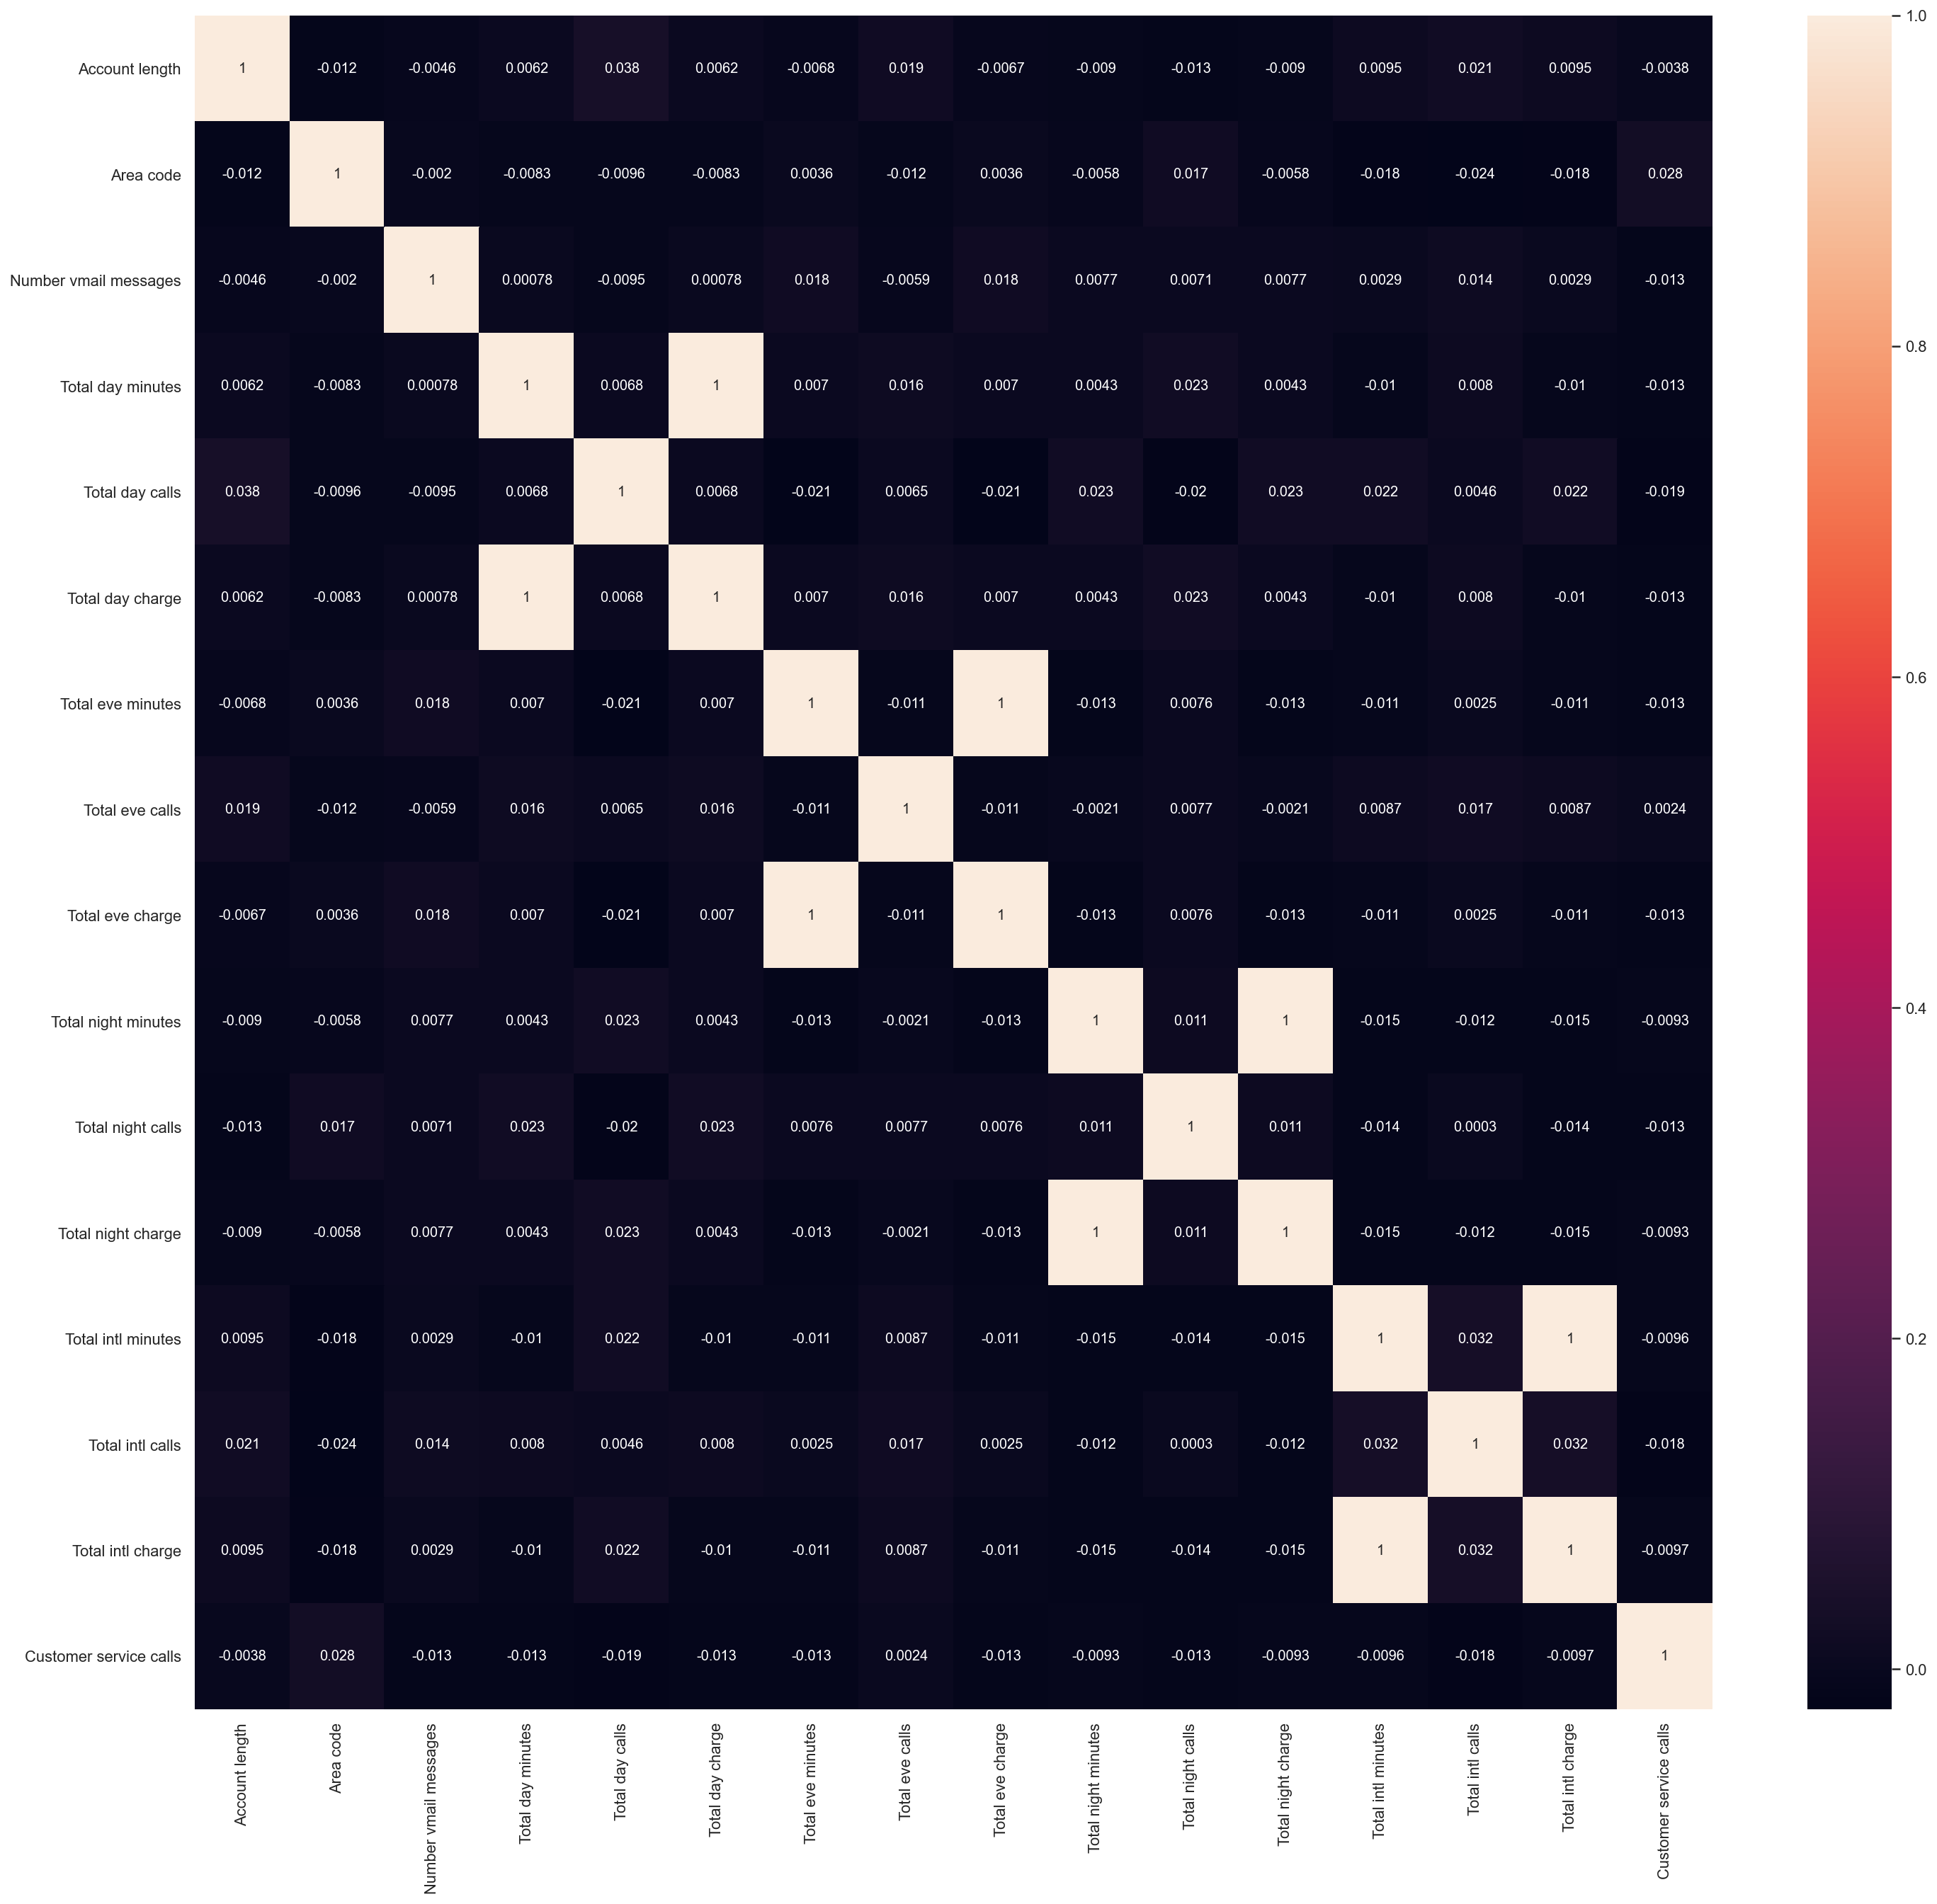

In [32]:
fig, ax = plt.subplots(figsize=(24, 22))
sns.heatmap(tel.corr(),annot=True,  ax=ax)
plt.show()

In [83]:
# defining 'tel_total_summed' for a better analysis of heatmap looking for correlations. 
#This variable will not be used for the models
tel_totals_summed = tel_20.merge(tel_80, how='outer')
tel_totals_summed

State  Account length  Area code International plan Voice mail plan  \
0       LA             117        408                 No              No   
1       IN              65        415                 No              No   
2       NY             161        415                 No              No   
3       SC             111        415                 No              No   
4       HI              49        510                 No              No   
...    ...             ...        ...                ...             ...   
3328    SC              79        415                 No              No   
3329    AZ             192        415                 No             Yes   
3330    WV              68        415                 No              No   
3331    RI              28        510                 No              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                         0              184.5               97   
1                         0              129.1              137   
2                         0              332.9               67   
3                         0              110.4              103   
4                         0              119.3              117   
...                     ...                ...              ...   
3328                      0              134.7               98   
3329                     36              156.2               77   
3330                      0              231.1               57   
3331                      0              180.8              109   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                31.37              351.6               80             29.89   
1                21.95              228.5               83             19.42   
2                56.59              317.8               97             27.01   
3                18.77              137.3              102             11.67   
4                20.28              215.1              109             18.28   
...                ...                ...              ...               ...   
3328             22.90              189.7               68             16.12   
3329             26.55              215.5              126             18.32   
3330             39.29              153.4               55             13.04   
3331             30.74              288.8               58             24.55   
3332             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
0                   215.8                 90                9.71   
1                   208.8                111                9.40   
2                   160.6                128                7.23   
3                   189.6                105                8.53   
4                   178.7                 90                8.04   
...                   ...                ...                 ...   
3328                221.4                128                9.96   
3329                279.1                 83               12.56   
3330                191.3                123                8.61   
3331                191.9                 91                8.64   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
0                    8.7                 4               2.35   
1                   12.7                 6               3.43   
2                    5.4                 9               1.46   
3                    7.7                 6               2.08   
4                   11.1                 1               3.00   
...                  ...               ...                ...   
3328                11.8                 5            

In [67]:
tel_totals_summed['Total charge'] = tel_totals_summed['Total day charge'] + tel_totals_summed['Total eve charge']
+ tel_totals_summed['Total night charge'] + tel_totals_summed['Total intl charge']

0       12.06
1       12.83
2        8.69
3       10.61
4       11.04
        ...  
3328    13.15
3329    15.23
3330    11.20
3331    12.45
3332    14.56
Length: 3333, dtype: float64

In [68]:
tel_totals_summed['Total minutes'] = tel_totals_summed['Total day minutes'] + tel_totals_summed['Total eve minutes']
+ tel_totals_summed['Total night minutes'] + tel_totals_summed['Total intl minutes']

0       224.5
1       221.5
2       166.0
3       197.3
4       189.8
        ...  
3328    233.2
3329    289.0
3330    200.9
3331    206.0
3332    255.1
Length: 3333, dtype: float64

In [69]:
tel_totals_summed['Total calls'] = tel_totals_summed['Total day calls'] + tel_totals_summed['Total eve calls']
+ tel_totals_summed['Total night calls'] + tel_totals_summed['Total intl calls']

0        94
1       117
2       137
3       111
4        91
       ... 
3328    133
3329     89
3330    127
3331     97
3332     81
Length: 3333, dtype: int64

In [70]:
tel_totals_summed.head(2)

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   

   Customer service calls  Churn  Total charge  Total minutes  Total calls  
0                       1  False         61.26          536.1          177  
1                       4   True         41.37          357.6          220

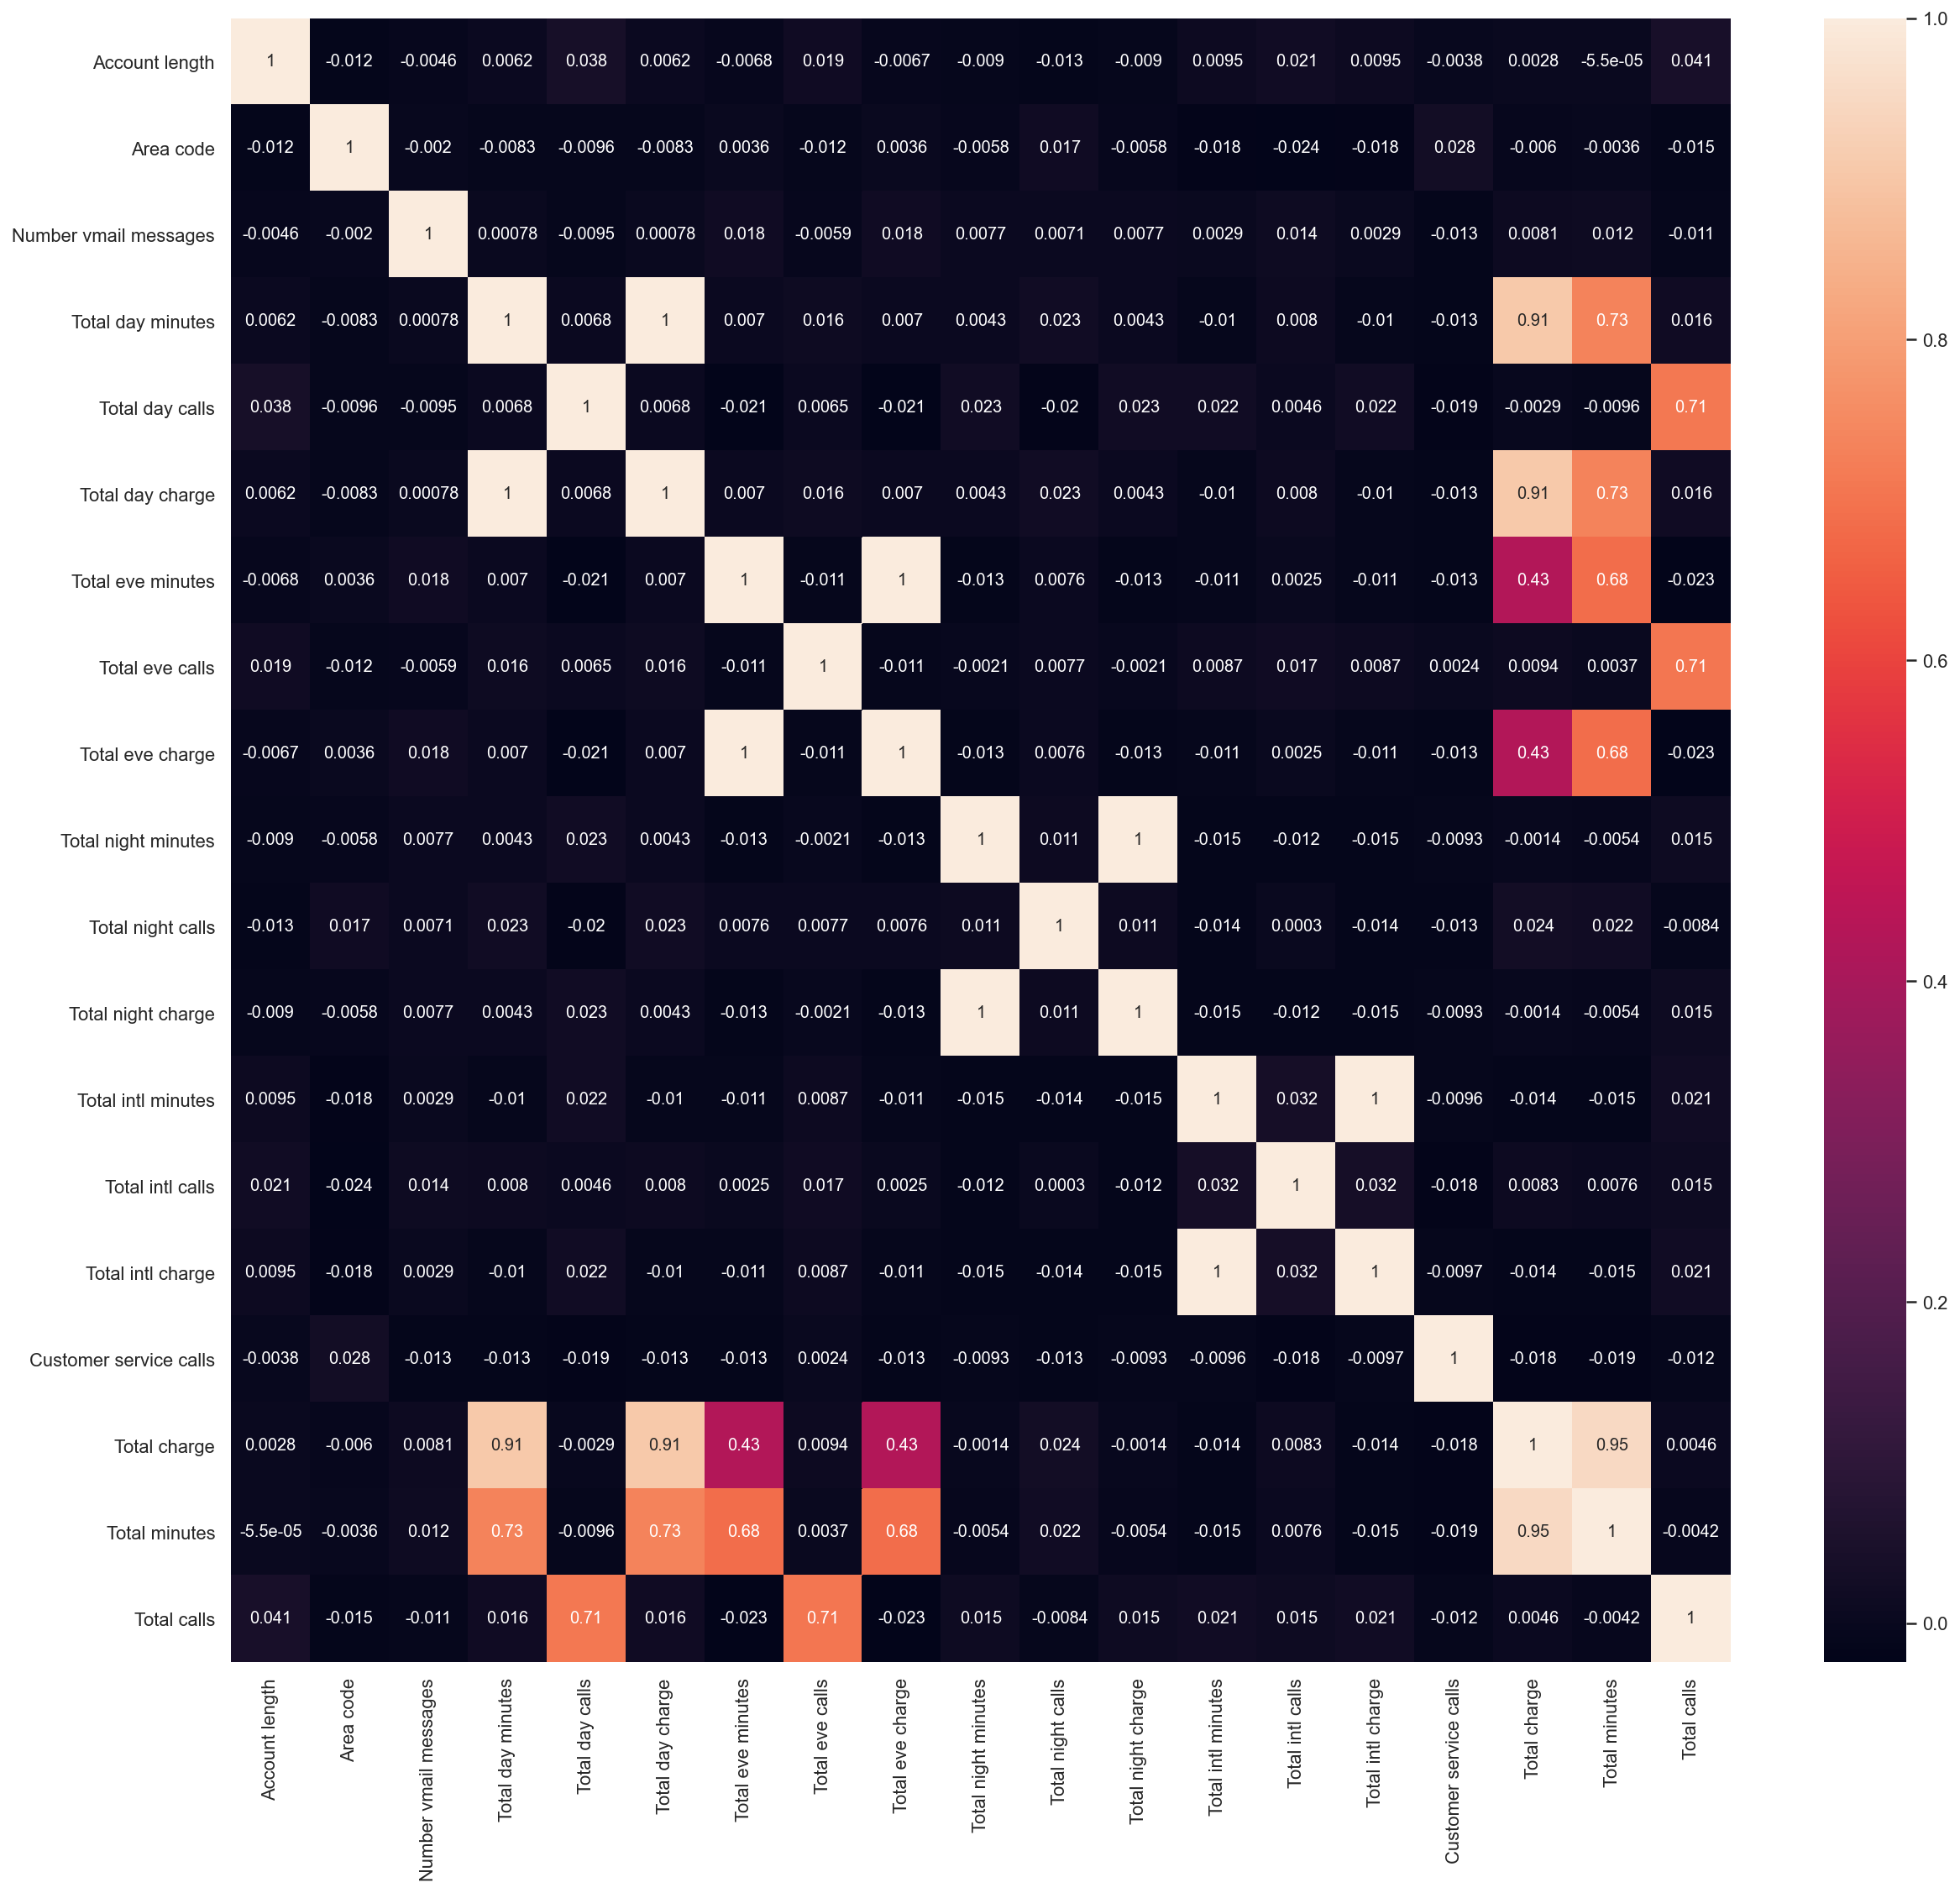

In [71]:
fig, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(tel_totals_summed.corr(),annot=True,  ax=ax)
plt.show()

In [81]:
#important variables: Customer service calls, total charge, total minutes.

In [73]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
#0 is False, meaning customer retained 
#1 is True, meaning costomer churned

In [74]:
tel.Churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: Churn, dtype: float64

In [75]:
tel['Churn'] = tel['Churn'].astype(int)

In [76]:
tel.head(2)

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   

   Customer service calls  Churn  
0                       1      0  
1                       4      1

In [77]:
int_baseline = tel.Churn.value_counts(normalize=True)
int_baseline

0    0.855086
1    0.144914
Name: Churn, dtype: float64

<AxesSubplot:ylabel='Churn'>

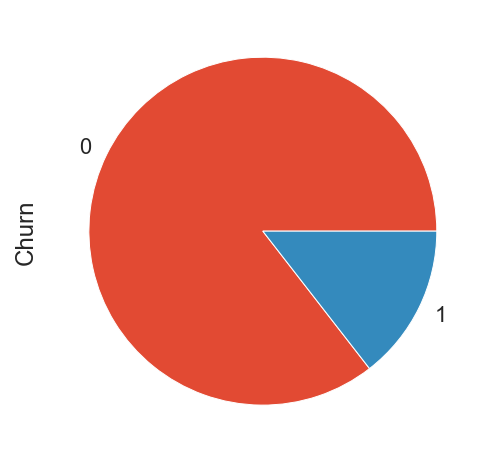

In [78]:
int_baseline.plot.pie()

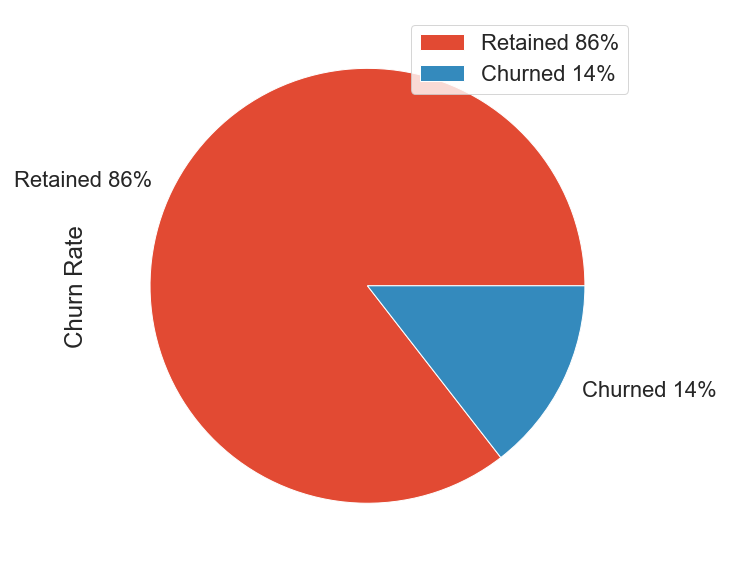

In [79]:
#pie chart in percentage
ratio_churn = pd.DataFrame({'Churn Rate': [0.855086, 0.144914],
                   'class': [0, 1]},
                  index=['Retained 86%', 'Churned 14%'])
plot = ratio_churn.plot.pie(y='Churn Rate', figsize=(5, 5))

In [80]:
tel['State'].value_counts().sort_values(ascending=False)

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
WY     77
VA     77
CT     74
MI     73
VT     73
ID     73
TX     72
UT     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
WA     66
CO     66
NV     66
RI     65
MS     65
MA     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

<AxesSubplot:xlabel='State', ylabel='Churn'>

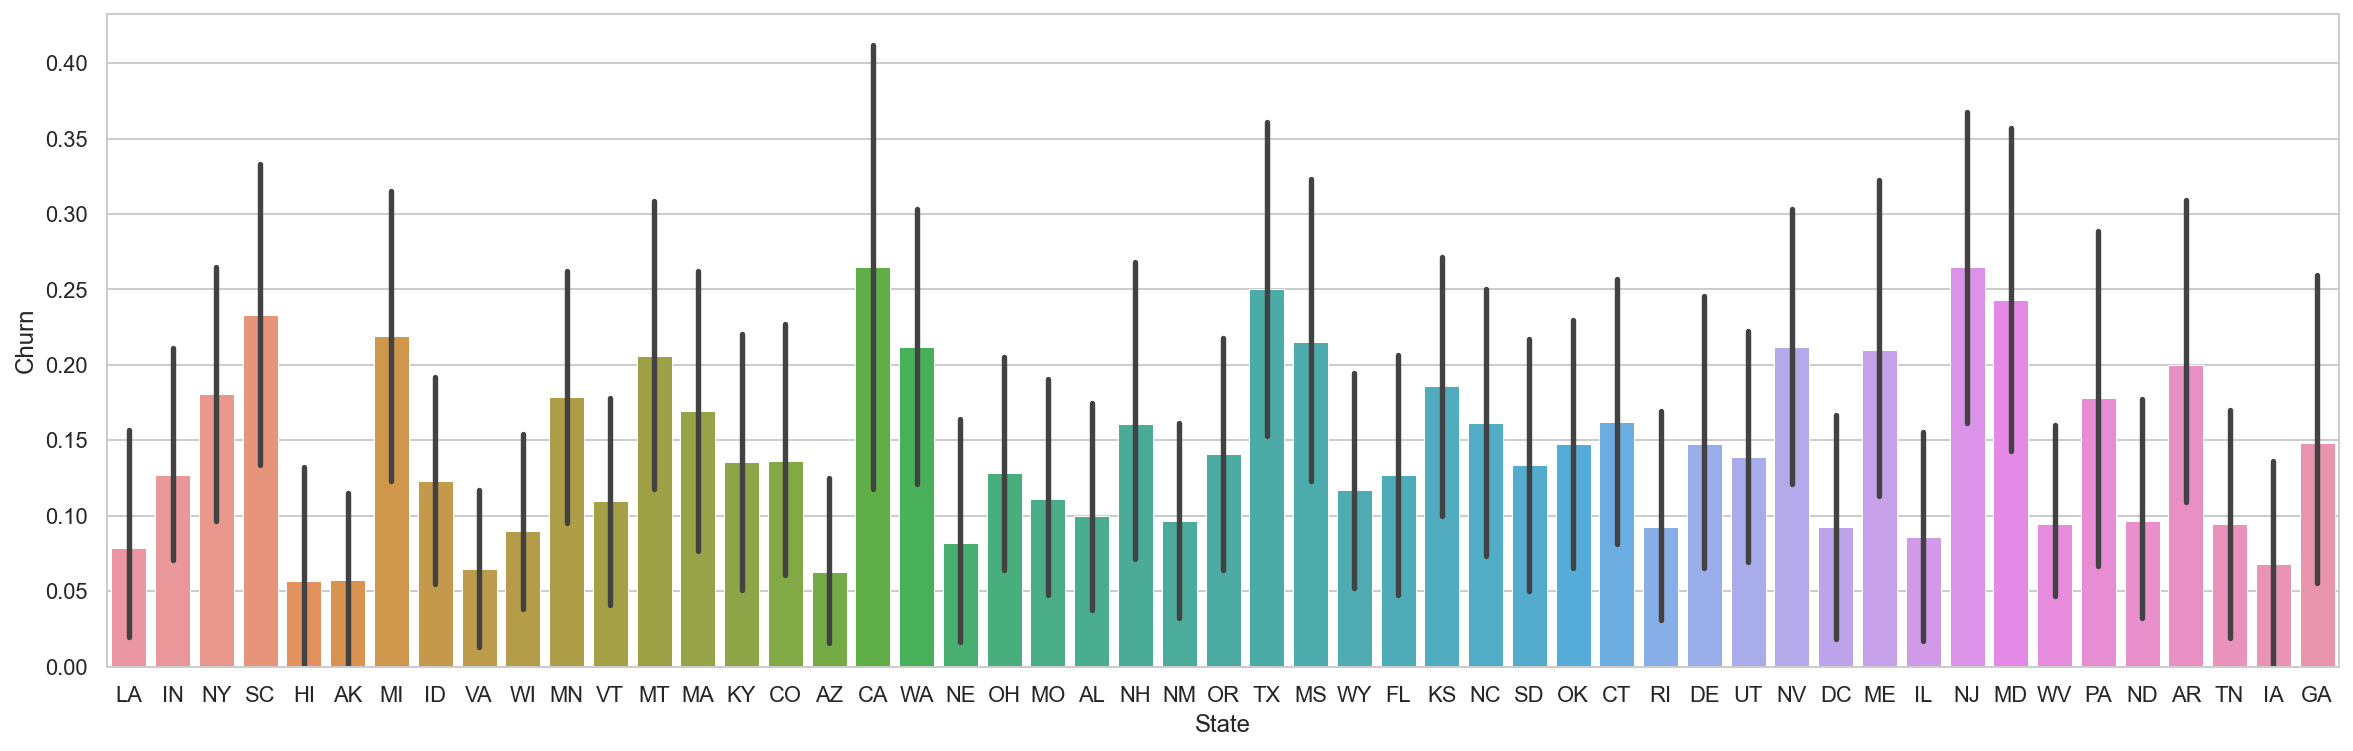

In [35]:
#plotting churn per state
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(x='State', y='Churn',data=tel)

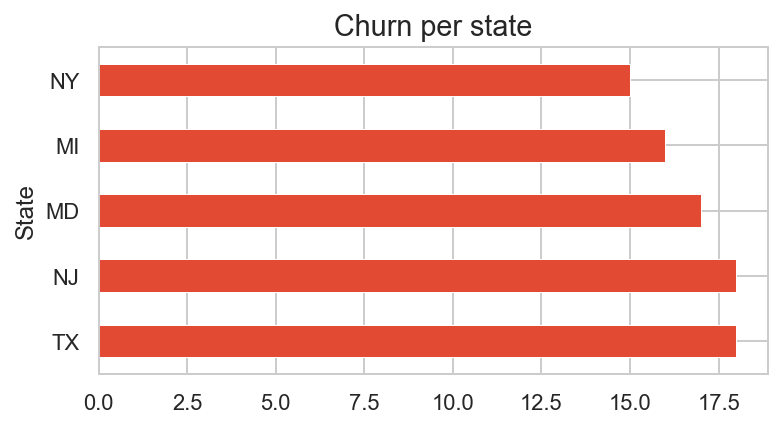

In [203]:
# top 5 highest churn rate
plt.subplots(figsize=(6, 3))
sns.set_style('whitegrid')
plt.title('Churn per state')
tel.groupby('State')['Churn'].sum().sort_values(ascending=False).head(5).plot(kind='barh')
plt.show()

<AxesSubplot:xlabel='State', ylabel='Account length'>

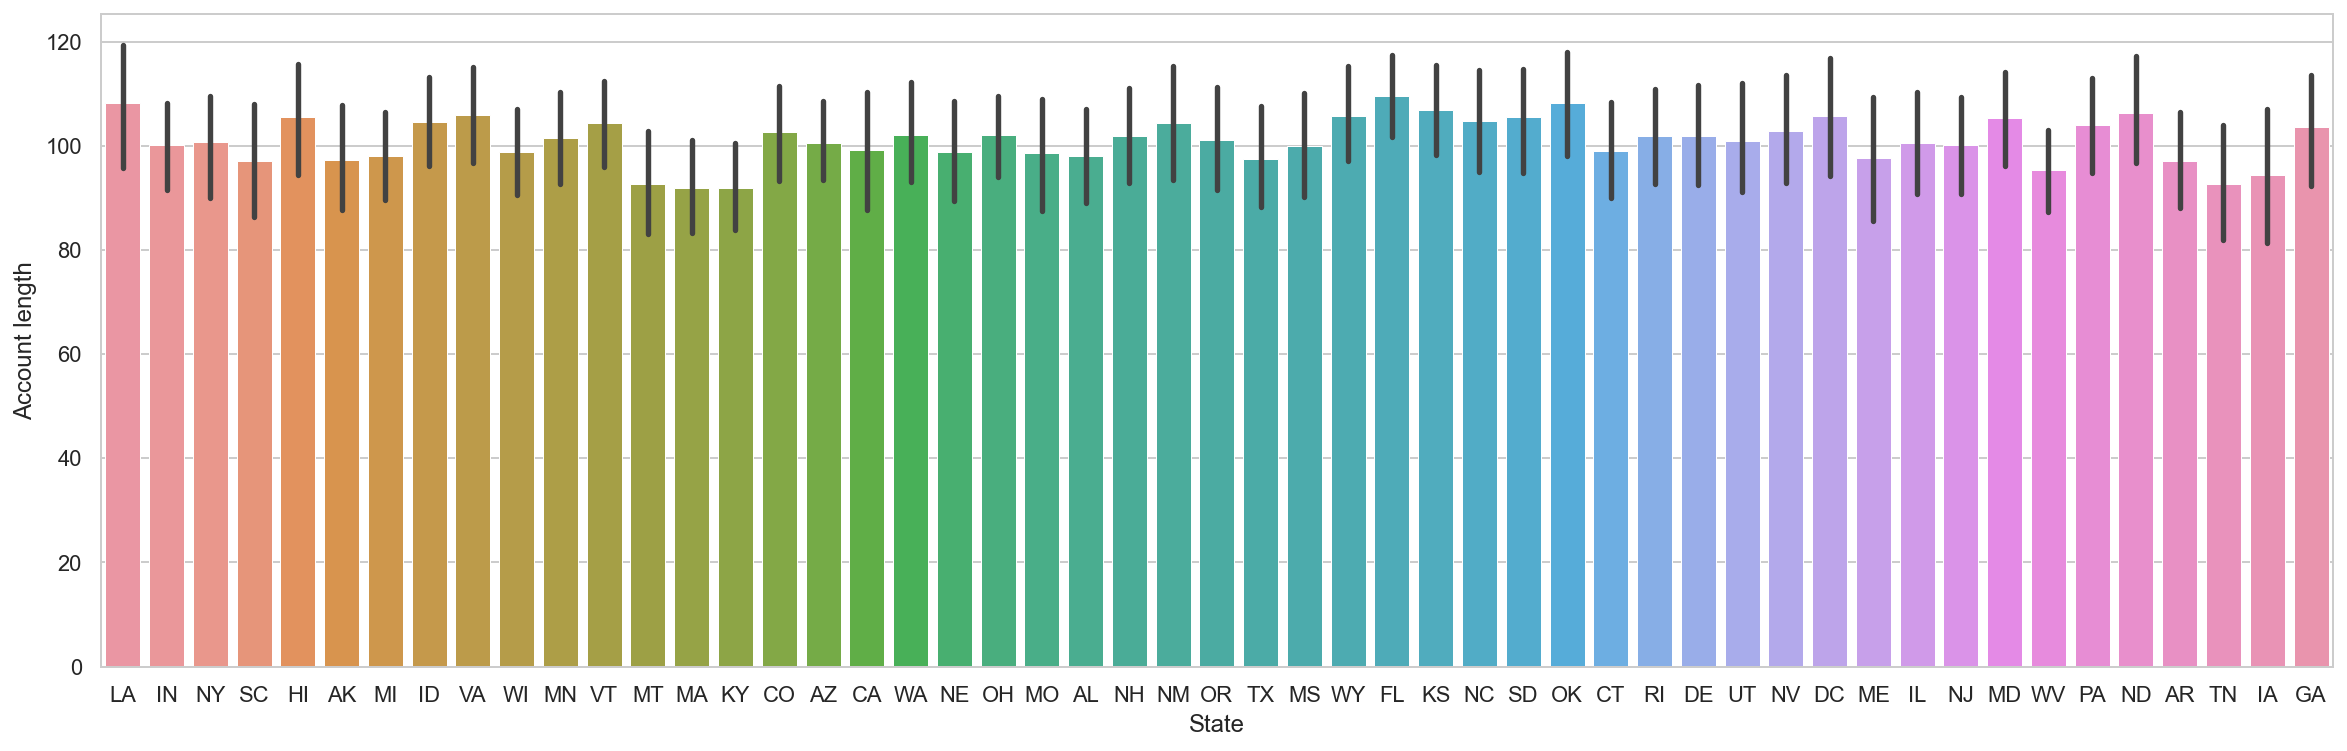

In [46]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(x='State',y='Account length', data=tel)

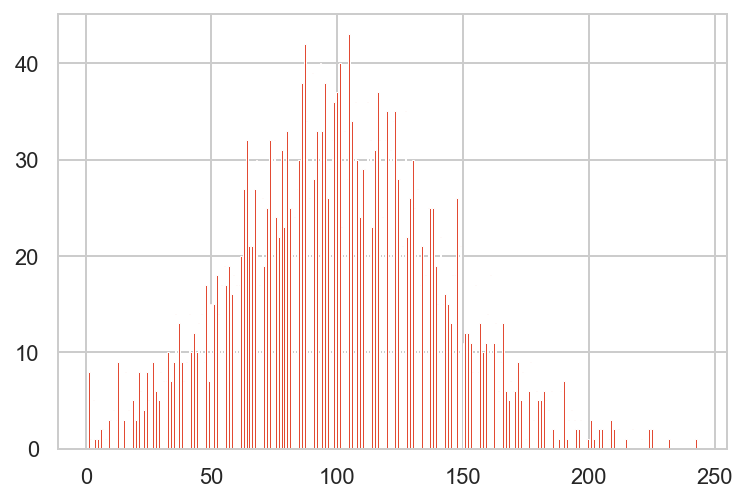

In [47]:
#account length histogram
plt.hist(tel['Account length'], bins=400)
plt.show()

In [48]:
tel['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [204]:
tel['Account length'].value_counts().sort_values(ascending=False)

105    43
87     42
93     40
101    40
90     39
       ..
243     1
26      1
4       1
8       1
2       1
Name: Account length, Length: 212, dtype: int64

KeyError: 'State'

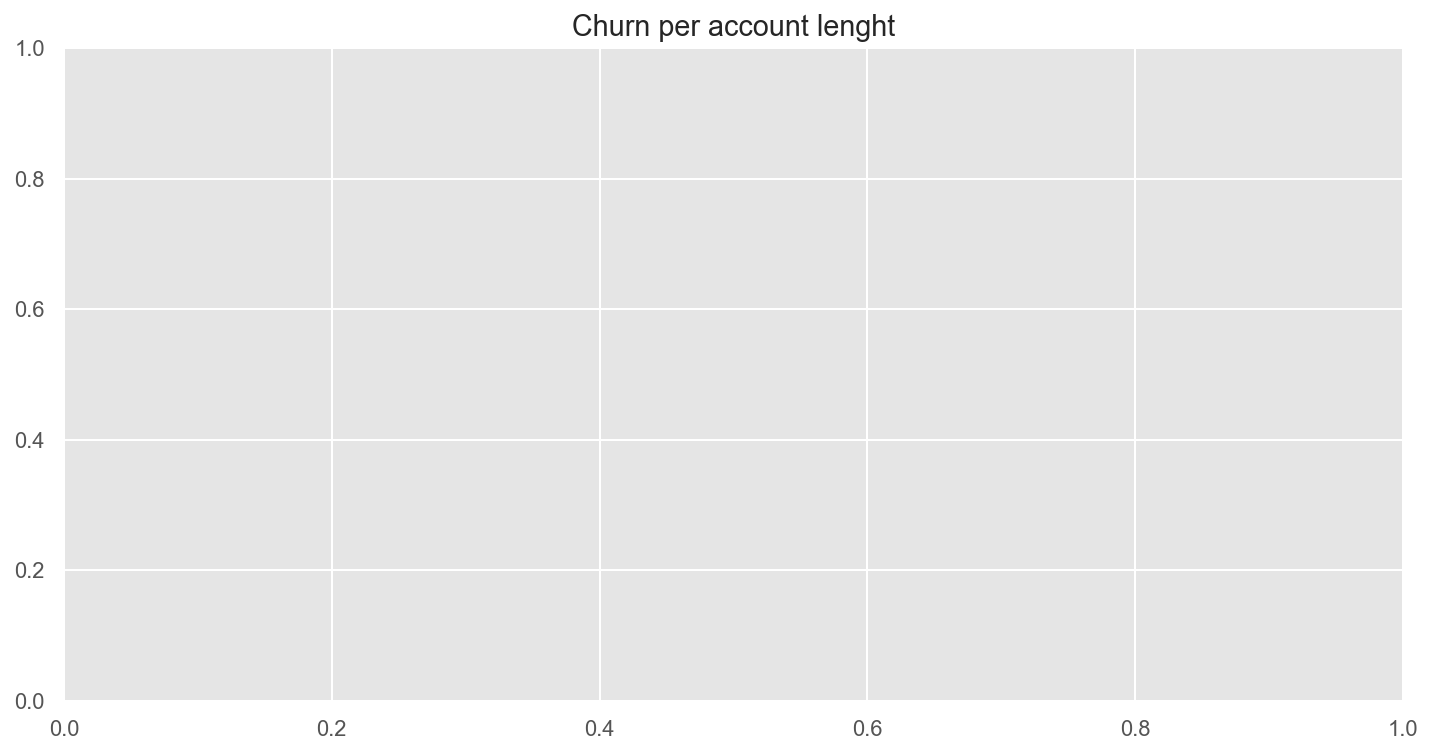

In [205]:
plt.subplots(figsize=(12, 6))
sns.set_style('whitegrid')
plt.title('Churn per account lenght')
tel.groupby('State')['Account length'].sum().sort_values(ascending=False).head(25).plot(kind='barh')
plt.show()

/Users/nayarareis/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Account length', ylabel='count'>

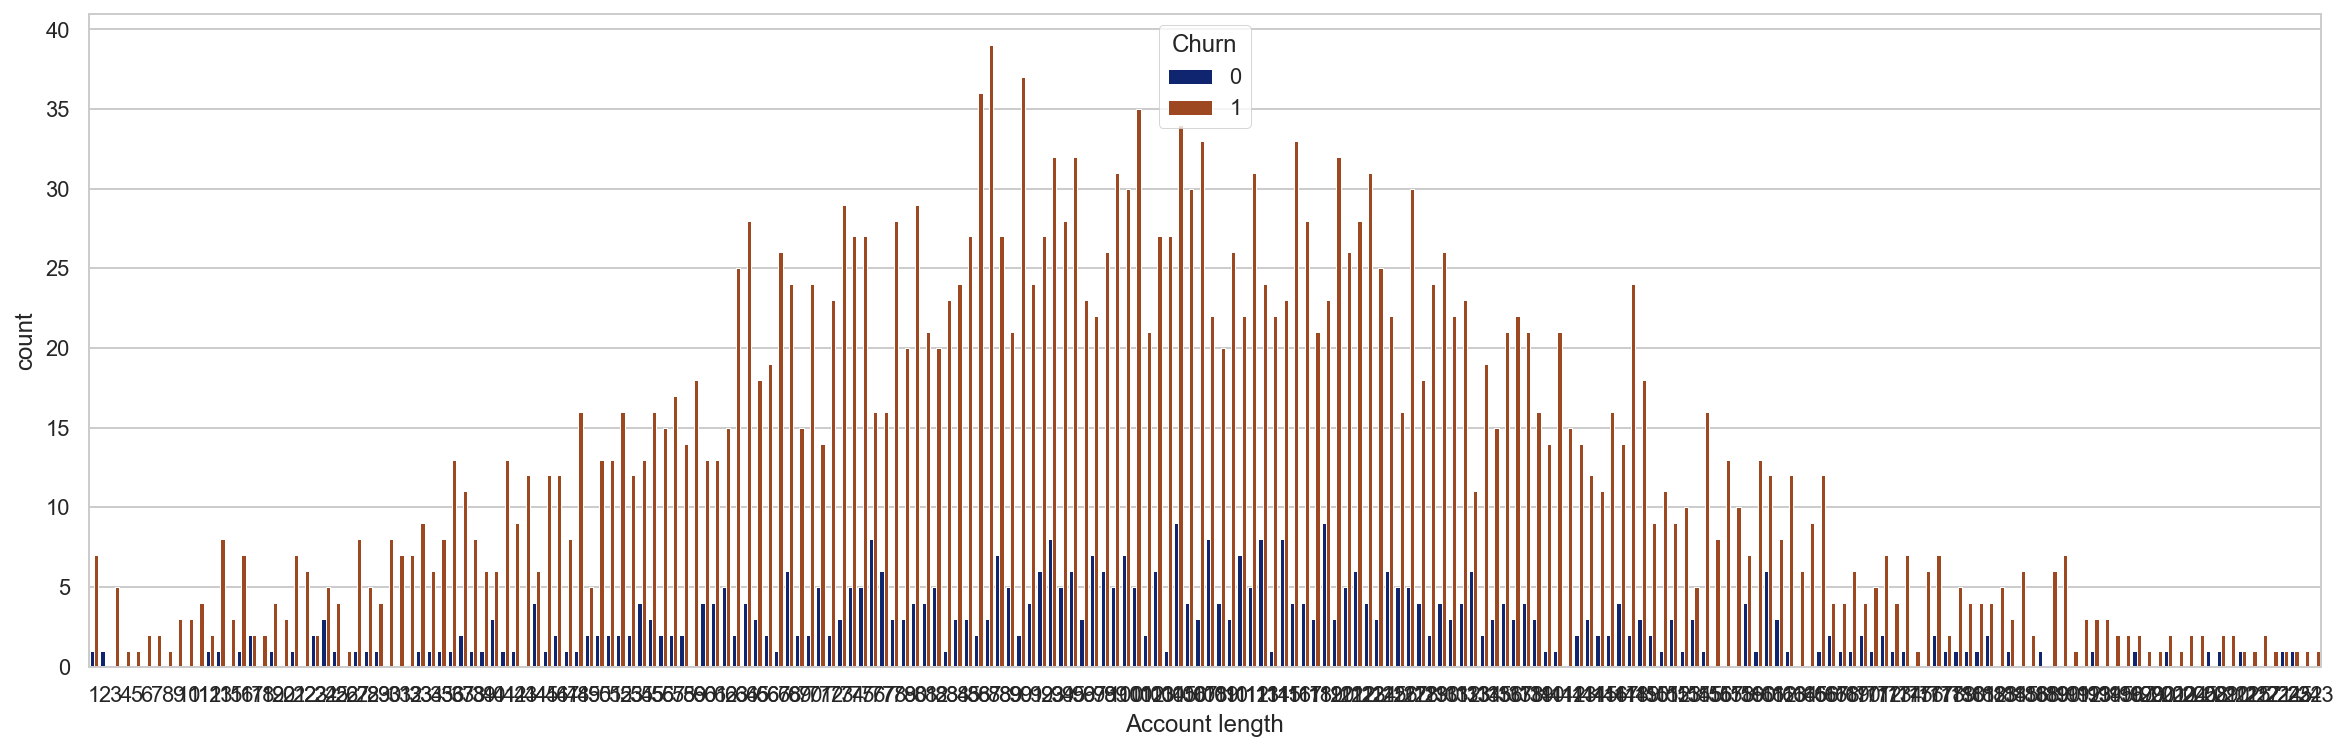

In [207]:
plt.figure(figsize=(20,6))
sns.countplot(tel2["Account length"],hue = tel2["Churn"],palette = "dark")

<AxesSubplot:xlabel='Customer service calls', ylabel='Churn'>

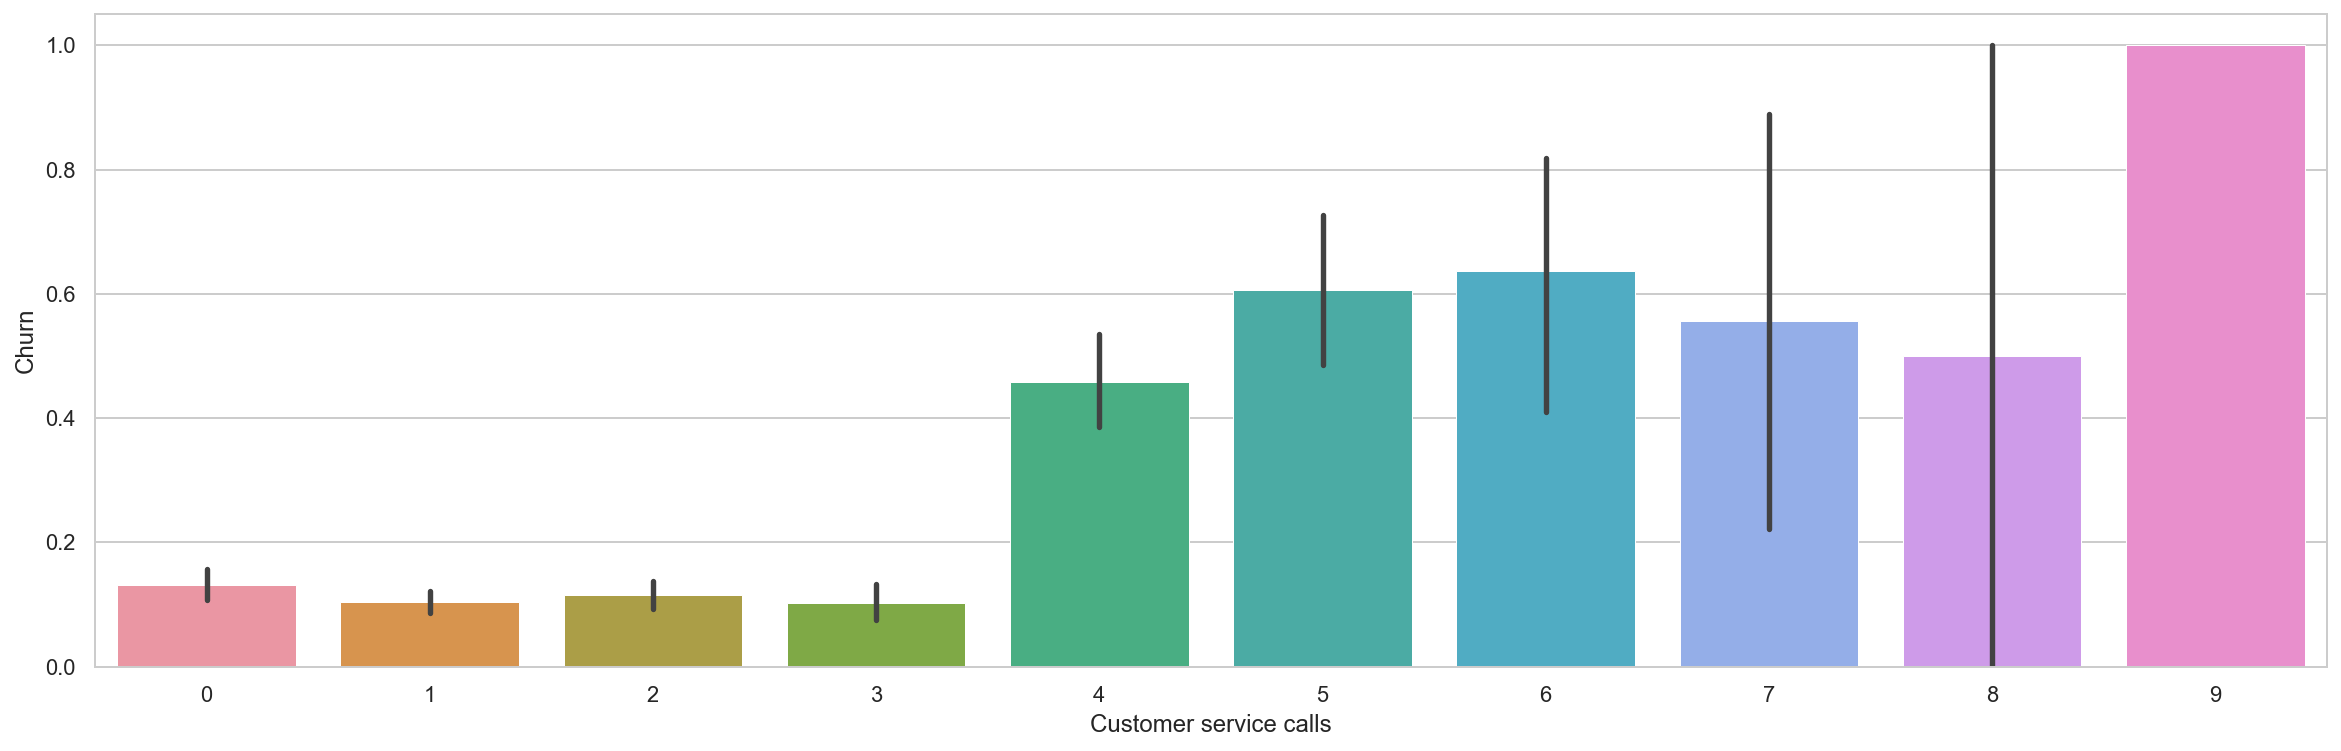

In [146]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(x='Customer service calls',y='Churn', data=tel)

<AxesSubplot:xlabel='Churn', ylabel='Customer service calls'>

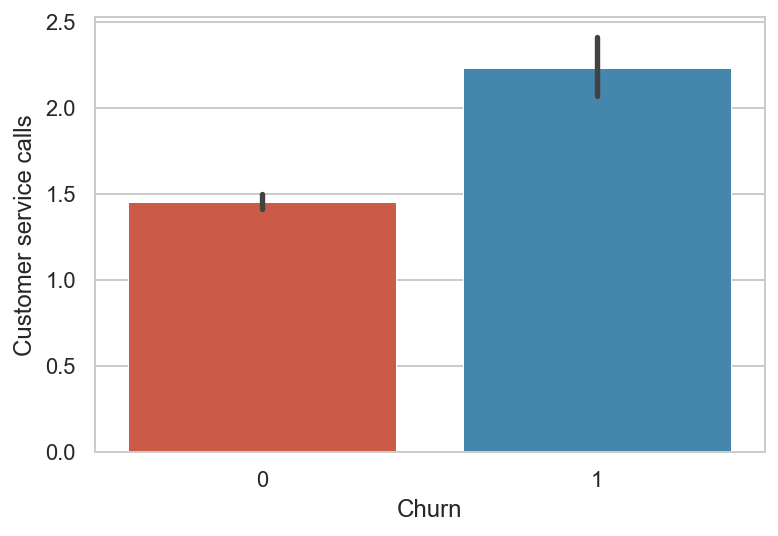

In [148]:
sns.barplot(x='Churn', y='Customer service calls',data=tel)

<AxesSubplot:xlabel='Churn', ylabel='Total charge'>

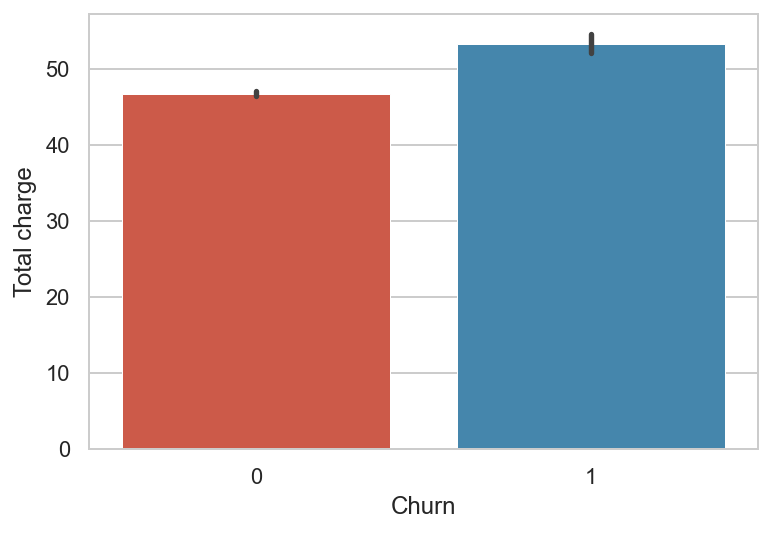

In [154]:
sns.barplot(x='Churn', y='Total charge',data=tel)

<AxesSubplot:xlabel='Churn', ylabel='Total charge'>

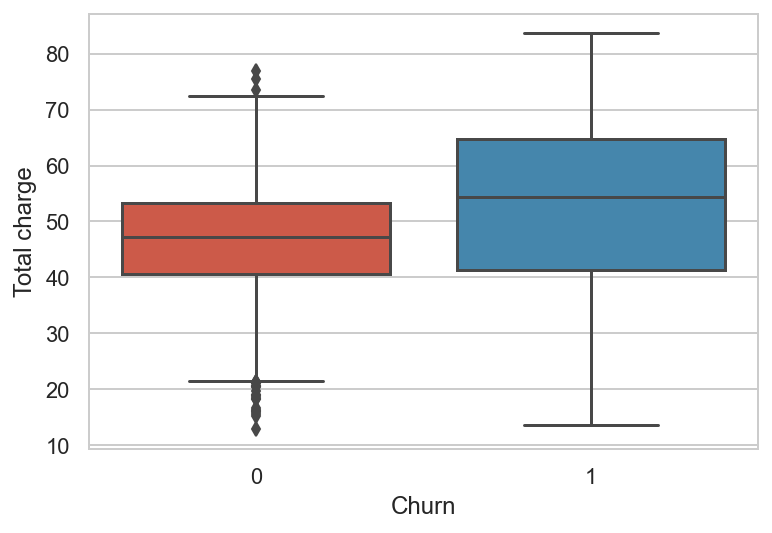

In [156]:
sns.boxplot(x='Churn',y='Total charge', data = tel)

In [ ]:
#Preparing the data for modeling

In [84]:
tel = pd.get_dummies(tel, columns=['Area code', 'International plan', 'Voice mail plan', 
            'State'], drop_first=True).copy()

In [85]:
X = tel.copy()
y = X.pop('Churn')

In [86]:
X.columns

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Area code_415', 'Area code_510', 'International plan_Yes',
       'Voice mail plan_Yes', 'State_AL', 'State_AR', 'State_AZ', 'State_CA',
       'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA',
       'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS',
       'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI',
       'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND',
       'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY',
       'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC',
       'State_SD', 'State_TN

In [87]:
print(X.head())
print(y.head())

   Account length  Number vmail messages  Total day minutes  Total day calls  \
0             117                      0              184.5               97   
1              65                      0              129.1              137   
2             161                      0              332.9               67   
3             111                      0              110.4              103   
4              49                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   
2             56.59              317.8               97             27.01   
3             18.77              137.3              102             11.67   
4             20.28              215.1              109             18.28   

   Total night minutes  Total night calls  Total night c

In [88]:
X.columns

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Area code_415', 'Area code_510', 'International plan_Yes',
       'Voice mail plan_Yes', 'State_AL', 'State_AR', 'State_AZ', 'State_CA',
       'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA',
       'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS',
       'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI',
       'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND',
       'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY',
       'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC',
       'State_SD', 'State_TN

In [89]:
y.values

array([0, 1, 1, ..., 0, 0, 0])

In [90]:
tel['Churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [91]:
print('baseline tel:', tel['Churn'].value_counts(normalize=True).max())

baseline tel: 0.8550855085508551


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        stratify=y,test_size=0.2, random_state=1)

In [93]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)

In [96]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [213]:
# modeling

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn import svm
from sklearn.neural_network import MLPClassifier

import joblib
import pickle

In [98]:
### Logistic Regression

In [150]:
# Setting up the parameters to fill dictionary
gs_paramslr = {'penalty': ['l1', 'l2'],
             'solver': ['liblinear'],
             'C': np.logspace(-4, 4, 10)}
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
# creating gridsearch object
lr_gridsearch = GridSearchCV(lr,
                             gs_paramslr,
                             n_jobs=2, 
                             cv=kf, 
                             verbose=1)

In [151]:
cross_val_score(lr, X_train, y_train, cv=kf).mean()

0.863465227564981

In [152]:
# fitting gridsearch object on training data
lr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   11.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:  6.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=2,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear'

In [153]:
# best mean cross-validated score:
lr_gridsearch.best_score_

0.8694668718510867

In [154]:
# best hyperparameters for gridsearch
lr_gridsearch.best_params_

{'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}

In [155]:
# assigning the best estimator to a variable:
best_lr = lr_gridsearch.best_estimator_

In [156]:
# scoring best estimator on the testing data:
lr_gridsearch.score(X_test, y_test)

0.8785607196401799

In [157]:
# scoring best estimator on the training data:
lr_gridsearch.score(X_train, y_train)

0.8713428357089272

In [158]:
### KNN

In [160]:
knn_params = {
    'n_neighbors': [5, 9, 15, 25, 40, 50, 60],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
knn_gridsearch = GridSearchCV(knn,
                              knn_params,
                              n_jobs=2, 
                              cv=kf, 
                              verbose=1, 
                              return_train_score=True)

knn_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   19.3s
[Parallel(n_jobs=2)]: Done 140 out of 140 | elapsed:  1.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=2,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 9, 15, 25, 40, 50, 60],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

In [161]:
# best mean cross-validated accuracy from the gridsearch
knn_gridsearch.best_score_

0.8578402231731912

In [162]:
knn_gridsearch.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [163]:
# best hyperparameters
knn_gridsearch.best_params_

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}

In [164]:
knn_gridsearch.cv_results_

{'mean_fit_time': array([0.02889924, 0.02103887, 0.0231873 , 0.02402263, 0.02407603,
        0.02246017, 0.02260404, 0.02137766, 0.02501192, 0.02344189,
        0.03157182, 0.0248724 , 0.01932974, 0.05173278, 0.02329702,
        0.02828593, 0.01892729, 0.03628192, 0.03027539, 0.04965653,
        0.02199984, 0.02352748, 0.02696695, 0.03263068, 0.02387309,
        0.02930546, 0.02676525, 0.02293115]),
 'std_fit_time': array([0.00989596, 0.00424666, 0.00134813, 0.00332208, 0.0082486 ,
        0.00401768, 0.00319553, 0.00246238, 0.00554095, 0.0017308 ,
        0.01087441, 0.00600307, 0.00221661, 0.02808854, 0.00294675,
        0.00603834, 0.00152345, 0.01007613, 0.0063475 , 0.01932061,
        0.00220611, 0.00337244, 0.00519351, 0.00866673, 0.00344283,
        0.00548522, 0.00600126, 0.00264327]),
 'mean_score_time': array([0.20572762, 0.11969399, 0.15707531, 0.12908378, 0.16813045,
        0.14604158, 0.19336076, 0.16304064, 0.22278447, 0.24830179,
        0.29503884, 0.31867223, 0.278494

In [165]:
pd.DataFrame(knn_gridsearch.cv_results_).sort_values(by=['mean_test_score', 'std_test_score'], ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
0        0.028899      0.009896         0.205728        0.083780    euclidean   
1        0.021039      0.004247         0.119694        0.011542    euclidean   
15       0.028286      0.006038         0.215481        0.070072    manhattan   
2        0.023187      0.001348         0.157075        0.021839    euclidean   
3        0.024023      0.003322         0.129084        0.007962    euclidean   
14       0.023297      0.002947         0.184878        0.008664    manhattan   
17       0.036282      0.010076         0.283788        0.057322    manhattan   
16       0.018927      0.001523         0.205614        0.025268    manhattan   
4        0.024076      0.008249         0.168130        0.012405    euclidean   
5        0.022460      0.004018         0.146042        0.005803    euclidean   
6        0.022604      0.003196         0.193361        0.007541    euclidean   
7        0.021378      0.002462         0.163041        0.004409    euclidean   
8        0.025012      0.005541         0.222784        0.013411    euclidean   
9        0.023442      0.001731         0.248302        0.045976    euclidean   
10       0.031572      0.010874         0.295039        0.048031    euclidean   
11       0.024872      0.006003         0.318672        0.117061    euclidean   
12       0.019330      0.002217         0.278495        0.058228    euclidean   
13       0.051733      0.028089         0.298442        0.072155    euclidean   
18       0.030275      0.006348         0.465334        0.014538    manhattan   
19       0.049657      0.019321         0.356977        0.048161    manhattan   
20       0.022000      0.002206         0.225567        0.015041    manhattan   
21       0.023527      0.003372         0.176489        0.007352    manhattan   
22       0.026967      0.005194         0.230608        0.041635    manhattan   
23       0.032631      0.008667         0.239739        0.041105    manhattan   
24       0.023873      0.003443         0.246743        0.021377    manhattan   
25       0.029305      0.005485         0.222683        0.039913    manhattan   
26       0.026765      0.006001         0.236889        0.021127    manhattan   
27       0.022931      0.002643         0.185858        0.013068    manhattan   

   param_n_neighbors param_weights  \
0                  5       uniform   
1                  5      distance   
15                 5      distance   
2                  9       uniform   
3                  9      distance   
14                 5       uniform   
17                 9      distance   
16                 9       uniform   
4                 15       uniform   
5                 15      distance   
6                 25       uniform   
7                 25      distance   
8                 40       uniform   
9                 40      distance   
10                50       uniform   
11                50      distance   
12                60       uniform   
13                60      distance   
18                15       uniform   
19                15      distance   
20                25       uniform   
21                25      distance   
22                40       uniform   
23                40      distance   
24                50       uniform   
25                50      distance   
26                60       uniform   
27                60      distance   

                                               params  split0_test_score  \
0   {'metric': 'euclidean', 'n_neighbors': 5, 'wei...           0.855805   
1   {'metric': 'euclidean', 'n_neighbors': 5, 'wei...           0.855805   
15  {'metric': 'manhattan', 'n_neighbors': 5, 'wei...           0.853933   
2   {'metric': 'euclidean', 'n_neighbors': 9, 'wei...           0.859551   
3   {'metric': 'euclidean', 'n_neighbors': 9, 'wei...           0.859551   
14  {'metric': 'manhattan', 'n_neighbors': 5, 'wei...           0.853933   
17  {'metric': 'man

In [166]:
knn_gridsearch.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [167]:
best_knn = knn_gridsearch.best_estimator_
print(best_knn.score(X_train, y_train))
print(best_knn.score(X_test, y_test))

0.8777194298574643
0.8530734632683659


In [168]:
print(knn_gridsearch.score(X_train, y_train))
print(knn_gridsearch.score(X_test, y_test))

0.8777194298574643
0.8530734632683659


In [169]:
### Decision Tree Classifier

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
dt_params = {
    'max_depth': [1, 2, 3, 8, 10, 21]}
dt = DecisionTreeClassifier(criterion ='gini', random_state=1)
dt_gridsearch = GridSearchCV(dt,
                              dt_params,
                              n_jobs=2, 
                              cv=kf, 
                              verbose=1, 
                              return_train_score=True)

dt_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=2,
             param_grid={'max_depth': [1, 2, 3, 8, 10, 21]},


In [172]:
# print out your best hyperparameters
dt_gridsearch.best_params_

{'max_depth': 8}

In [173]:
# best mean cross-validated accuracy from the gridsearch
dt_gridsearch.best_score_

0.9336066783312604

In [174]:
# assign your best_estimator_ to the variable, then use .score( ) on your testing data
best_dt = dt_gridsearch.best_estimator_

In [175]:
print(best_dt.score(X_train, y_train))
print(best_dt.score(X_test, y_test))

0.972993248312078
0.9370314842578711


In [208]:
# Random Forest Classifier

In [214]:
rf_params = {
    'n_estimators': [50, 100, 200, 300],
             'max_features': [1.0, 0.9, 0.8, 0.7],
             'max_depth': [None]+list(range(1,50,5))}
rf = RandomForestClassifier(random_state=1)
rf_gridsearch = GridSearchCV(rf,
                              rf_params,
                              n_jobs=2, 
                              cv=kf, 
                              verbose=3)

rf_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 176 candidates, totalling 880 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   40.3s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  2.4min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  5.0min
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed: 10.4min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 18.7min
[Parallel(n_jobs=2)]: Done 880 out of 880 | elapsed: 20.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                             

In [210]:
# best hyperparameters
rf_gridsearch.best_params_

{'max_depth': 11, 'max_features': 0.7, 'n_estimators': 200}

In [211]:
# best mean cross-validated accuracy from the gridsearch
rf_gridsearch.best_score_

0.9527359093815658

In [212]:
# assigning best_estimator_ to the variable
best_rf = rf_gridsearch.best_estimator_

In [213]:
print(best_rf.score(X_train, y_train))
print(best_rf.score(X_test, y_test))

0.9816204051012754
0.9565217391304348


In [301]:
## Saving and reloading the model with joblib

In [311]:
joblib.dump(knn_gridsearch, 'knn_gridsearch.jlib')

['knn_gridsearch.jlib']

In [312]:
joblib.dump(dt_gridsearch, 'dt_gridsearch.jlib')

['dt_gridsearch.jlib']

In [302]:
joblib.dump(lr_gridsearch, 'lr_gridsearch.jlib')

['lr_gridsearch.jlib']

In [313]:
joblib.dump(rf_gridsearch, 'rf_gridsearch.jlib')

['rf_gridsearch.jlib']

In [226]:
#realoding the model
rf_gridsearch_reloaded = joblib.load('lr_gridsearch.jlib')
rf_gridsearch_reloaded

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=2,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear'

In [227]:
rf_gridsearch = rf_gridsearch_reloaded

In [4]:
#realoding the model
lr_gridsearch_reloaded = joblib.load('lr_gridsearch.jlib')

In [5]:
lr_gridsearch_reloaded

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=2,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear'

In [8]:
#realoading coeficents
lr_gridsearch_reloaded.best_estimator_.coef_

array([[ 6.46189314e-04, -6.54774531e-03,  1.67481113e-02,
         2.06065436e-03,  1.67482111e-02,  7.32066113e-03,
        -1.57619447e-04,  7.31976270e-03,  3.61336187e-03,
         1.71936572e-03,  3.61401938e-03,  7.49358440e-03,
        -2.71986781e-03,  7.49947190e-03,  1.85601219e-02,
        -2.05984520e-03,  5.40268398e-04,  2.22267338e-02,
        -7.64173387e-03, -1.53119161e-03, -1.04623706e-03,
        -2.07222210e-03,  1.14899777e-03, -3.35284452e-04,
         2.03752978e-03, -1.14339009e-03, -1.13447680e-03,
        -9.74528685e-04,  5.07089664e-04, -2.30102857e-03,
        -2.31505859e-03, -2.37600622e-04, -9.44624581e-04,
        -6.67433908e-04,  7.98629246e-04, -9.12707556e-04,
        -1.09389731e-03,  6.21787072e-04,  4.17082989e-03,
         1.74825037e-03,  3.64230078e-03,  1.00837812e-03,
        -2.06415737e-04,  3.04171150e-03,  2.28600200e-03,
        -5.90235343e-05, -9.86918082e-04, -2.18386642e-03,
        -3.86266112e-04,  3.87860172e-03, -8.15210796e-0

In [ ]:
#Trying different random forest rf2 with socring='recall'

In [215]:
rf2_params = {
    'n_estimators': [50, 100, 200, 300],
             'max_features': [1.0, 0.9, 0.8, 0.7],
             'max_depth': [None]+list(range(1,50,8))}
rf2 = RandomForestClassifier(random_state=1, class_weight='balanced')
rf2_gridsearch = GridSearchCV(rf2,
                              rf2_params,
                              n_jobs=2, 
                              cv=kf, 
                              verbose=3, 
                             scoring='recall')

rf2_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   35.8s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  4.6min
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed: 10.2min
[Parallel(n_jobs=2)]: Done 640 out of 640 | elapsed: 14.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                       

In [216]:
# best hyperparameters
rf2_gridsearch.best_params_

{'max_depth': 9, 'max_features': 1.0, 'n_estimators': 300}

In [217]:
# best mean cross-validated accuracy from the gridsearch
rf2_gridsearch.best_score_

0.7824175824175825

In [218]:
# assigning best_estimator_ to the variable
best_rf2 = rf2_gridsearch.best_estimator_

In [219]:
print(best_rf2.score(X_train, y_train))
print(best_rf2.score(X_test, y_test))

0.9774943735933983
0.9400299850074962


In [ ]:
#Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot as skplt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

cmap = ListedColormap(sns.color_palette("husl", 3))

In [358]:
#rf2 model evaluation
rf2_fitted = rf2_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   34.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  4.3min
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed:  9.2min
[Parallel(n_jobs=2)]: Done 640 out of 640 | elapsed: 12.2min finished


In [359]:
predictions_train2 = rf2_fitted.predict(X_train)
predictions_test2 = rf2_fitted.predict(X_test)

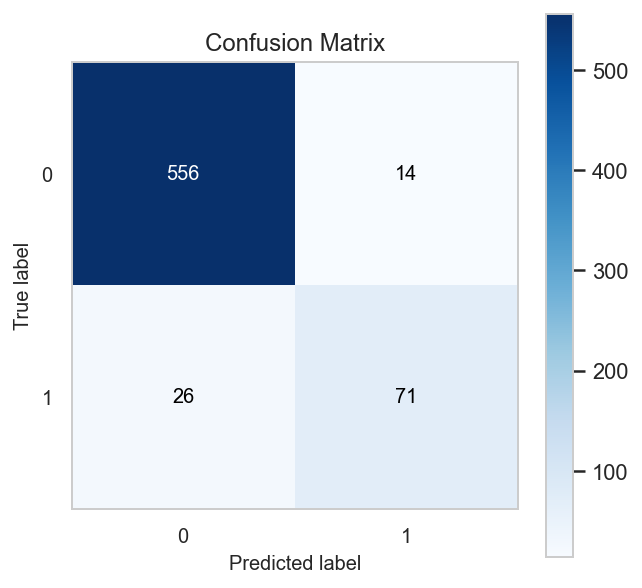

In [360]:
#Confusion matrix on the test set rf2
skplt.metrics.plot_confusion_matrix(y_test, predictions_test2, labels=[0, 1], figsize=(5,5))
plt.show()

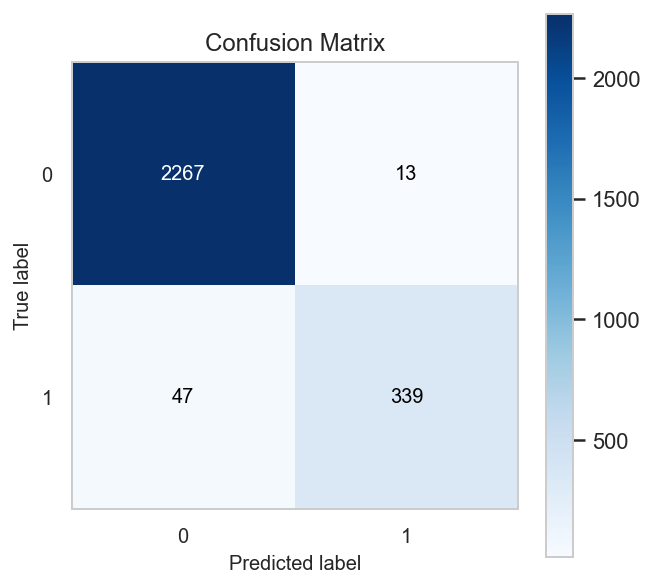

In [361]:
#Confusion matrix on the training set
skplt.metrics.plot_confusion_matrix(y_train, predictions_train2, labels=[0, 1], figsize=(5,5))
plt.show()

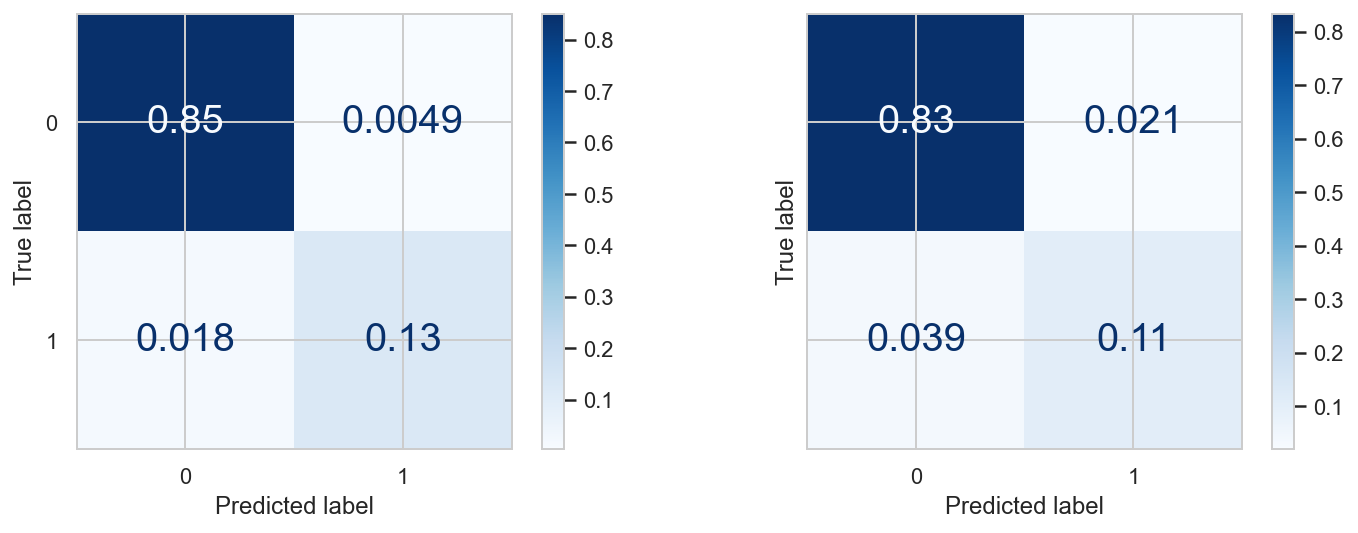

In [362]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), sharey=True)
plot_confusion_matrix(rf2_fitted, X_train, y_train, cmap='Blues', ax=ax[0], normalize='all')
plot_confusion_matrix(rf2_fitted, X_test, y_test, cmap='Blues', ax=ax[1], normalize='all')

for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(20)        

plt.show()

In [363]:
print('ROC_AUC score on train:' , (roc_auc_score(y_train, rf2_fitted.predict_proba(X_train)[:, 1])))
print('ROC_AUC score on test:' , (roc_auc_score(y_test, rf2_fitted.predict_proba(X_test)[:, 1])))

ROC_AUC score on train: 0.9977342968821017
ROC_AUC score on test: 0.903418339663592


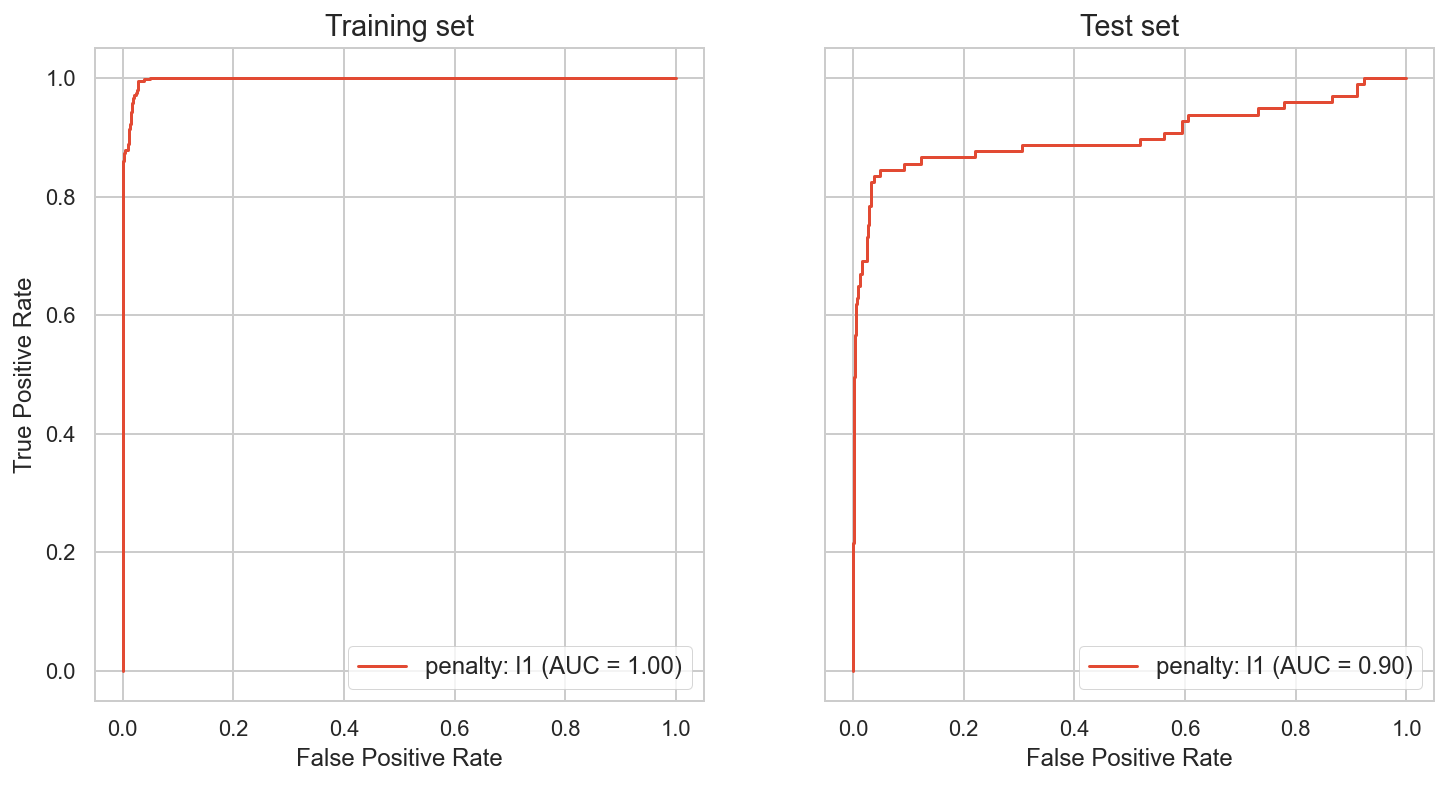

In [364]:
fig_roc, ax_roc = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plot_roc_curve(rf2_fitted, X_train, y_train, ax=ax_roc[0], name='penalty: l1')
plot_roc_curve(rf2_fitted, X_test, y_test, ax=ax_roc[1], name='penalty: l1')
ax_roc[0].legend(loc='lower right', fontsize=12)
ax_roc[1].legend(loc='lower right', fontsize=12)
ax_roc[1].set_ylabel(None)
ax_roc[0].set_title('Training set')
ax_roc[1].set_title('Test set')
plt.show()

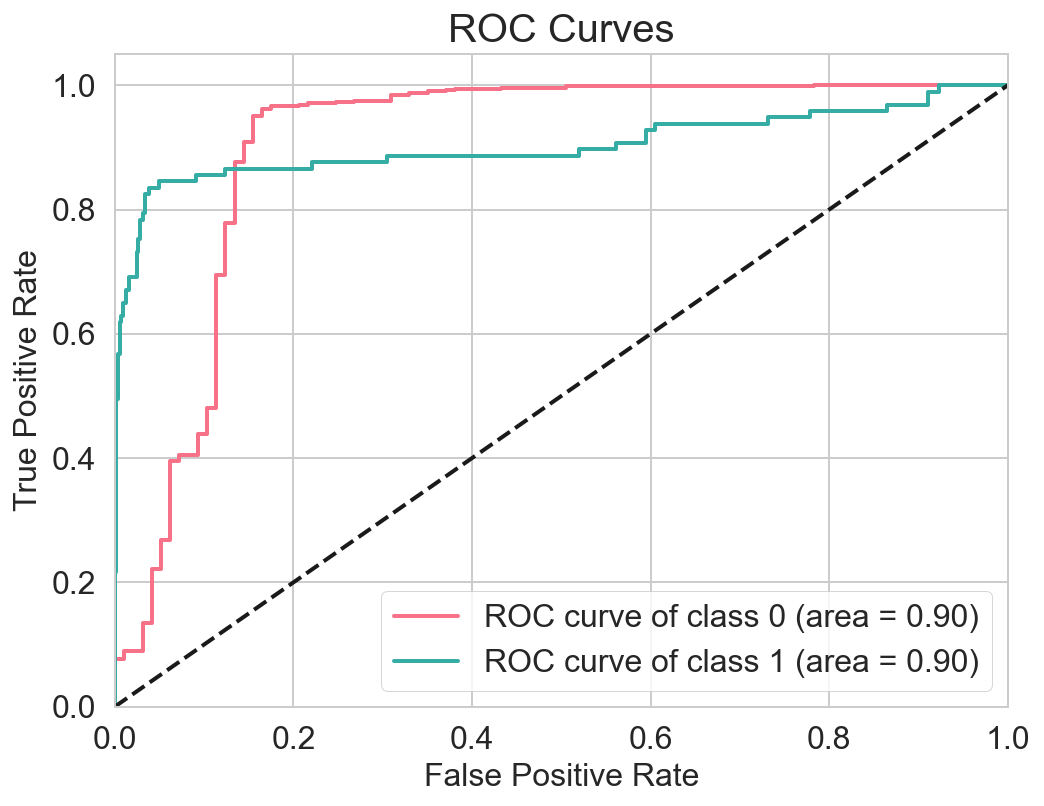

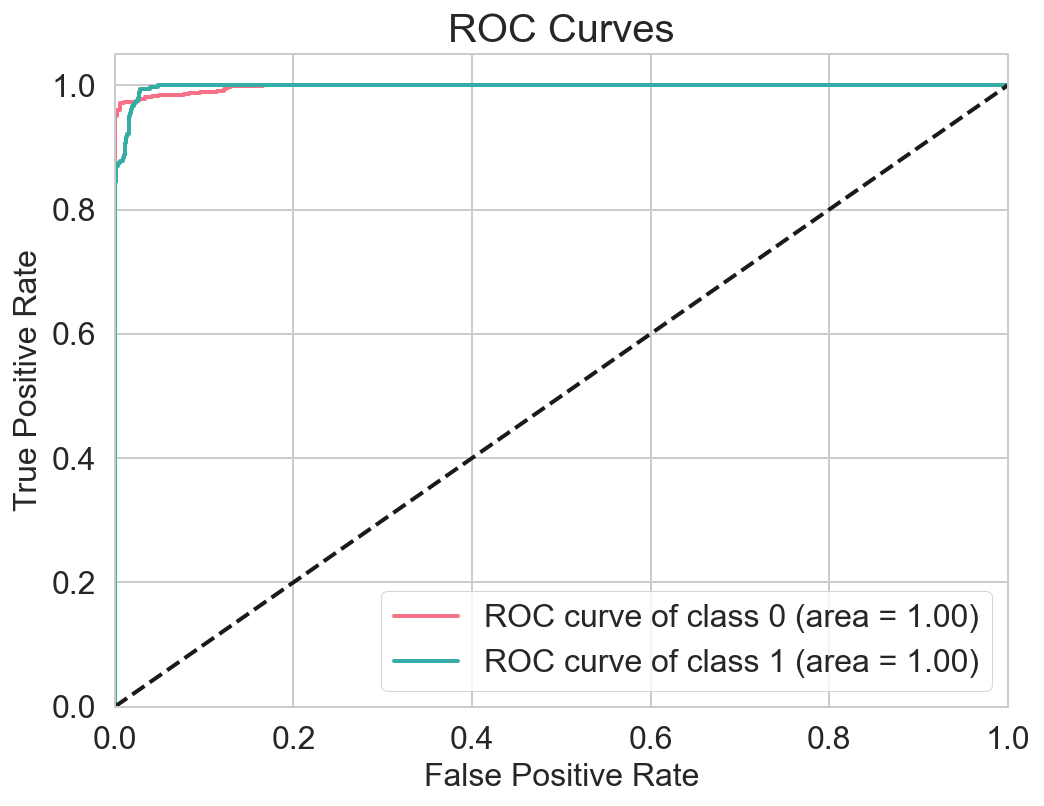

In [365]:
skplt.metrics.plot_roc(y_test, rf2_fitted.predict_proba(X_test), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

skplt.metrics.plot_roc(y_train, rf2_fitted.predict_proba(X_train), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

In [366]:
### Precision-recall curve on the training and test set

#Average precision score
print(average_precision_score(y_train, rf2_fitted.predict_proba(X_train)[ :, 1])) 
print(average_precision_score(y_test, rf2_fitted.predict_proba(X_test)[:, 1]))

0.9874546185628323
0.8373746427455588


In [367]:
#recall score
print(recall_score(y_test, predictions_test2))
print(recall_score(y_train, predictions_train2))

0.7319587628865979
0.8782383419689119


In [368]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", len(rf2_fitted.classes_)))

In [369]:
def plot_f1_lines(figsize=(8, 6), fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)

    # add lines of constant F1 scores

    for const in np.linspace(0.2, 0.9, 8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                    xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

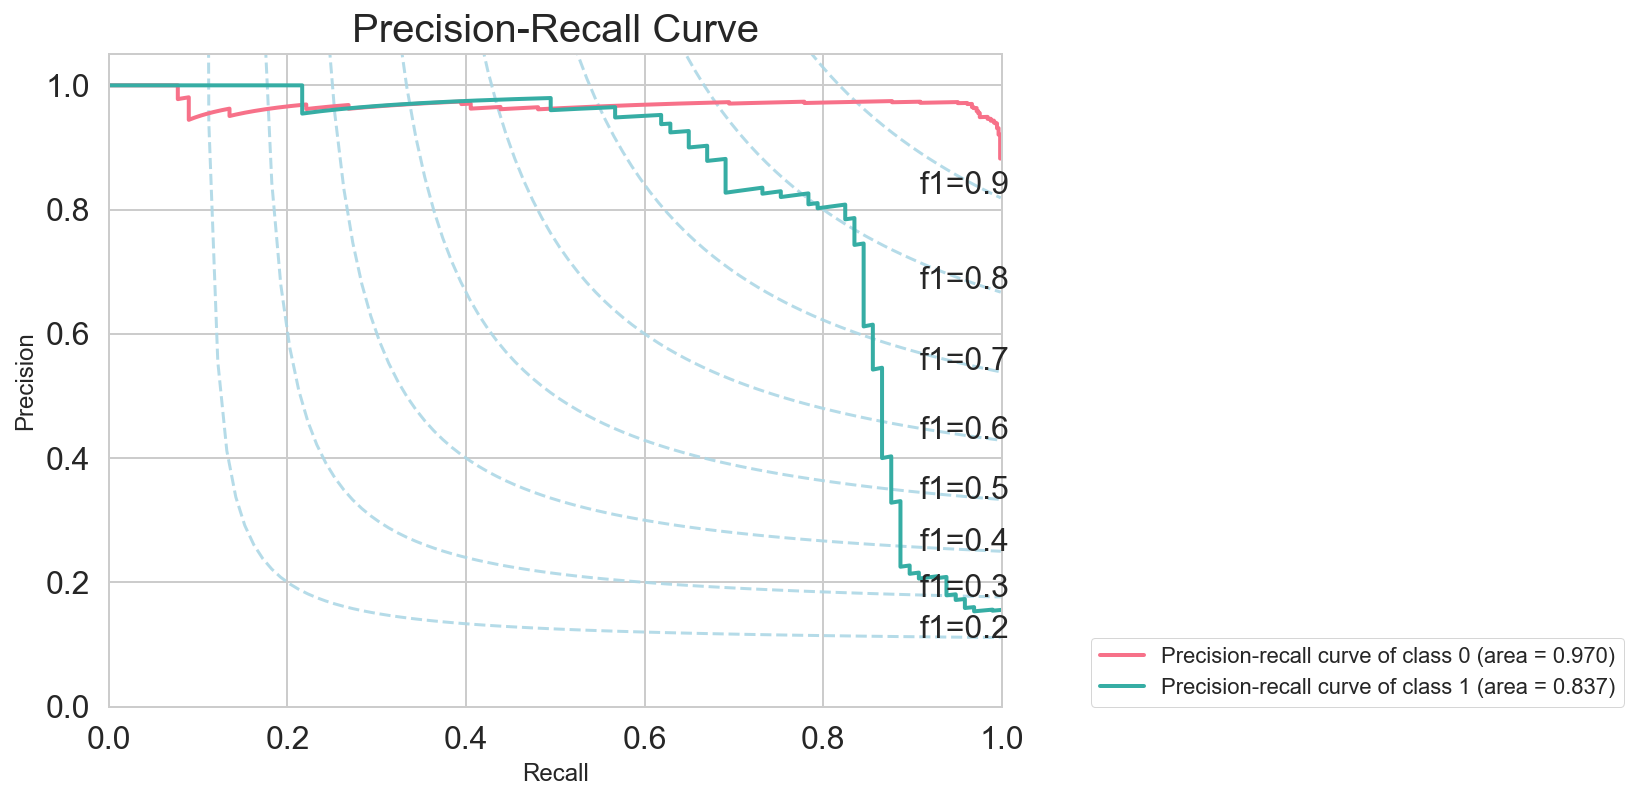

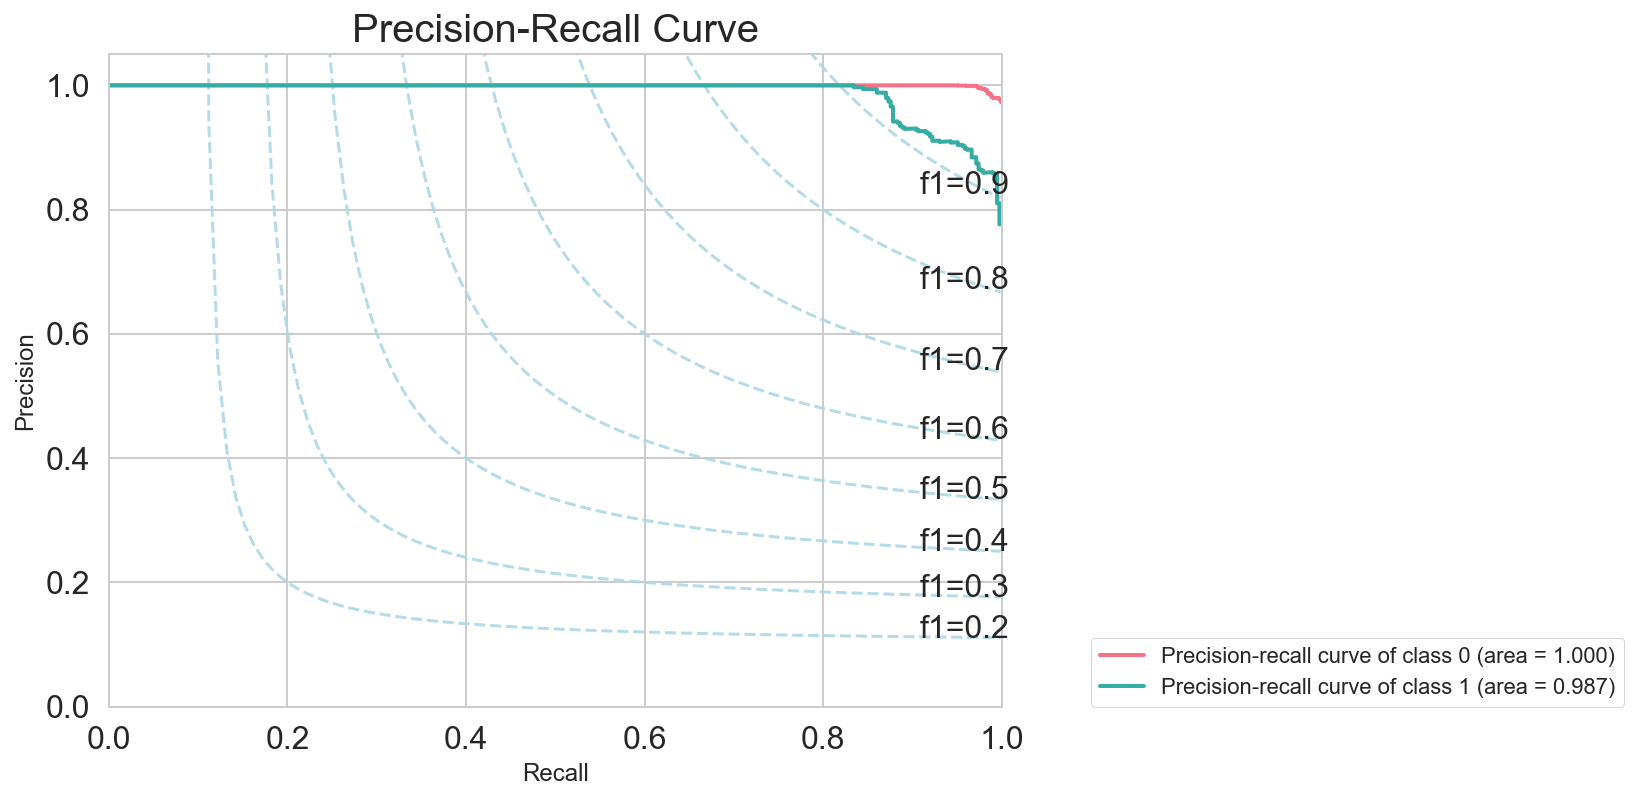

In [370]:
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, rf2_fitted.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_train, rf2_fitted.predict_proba(X_train),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

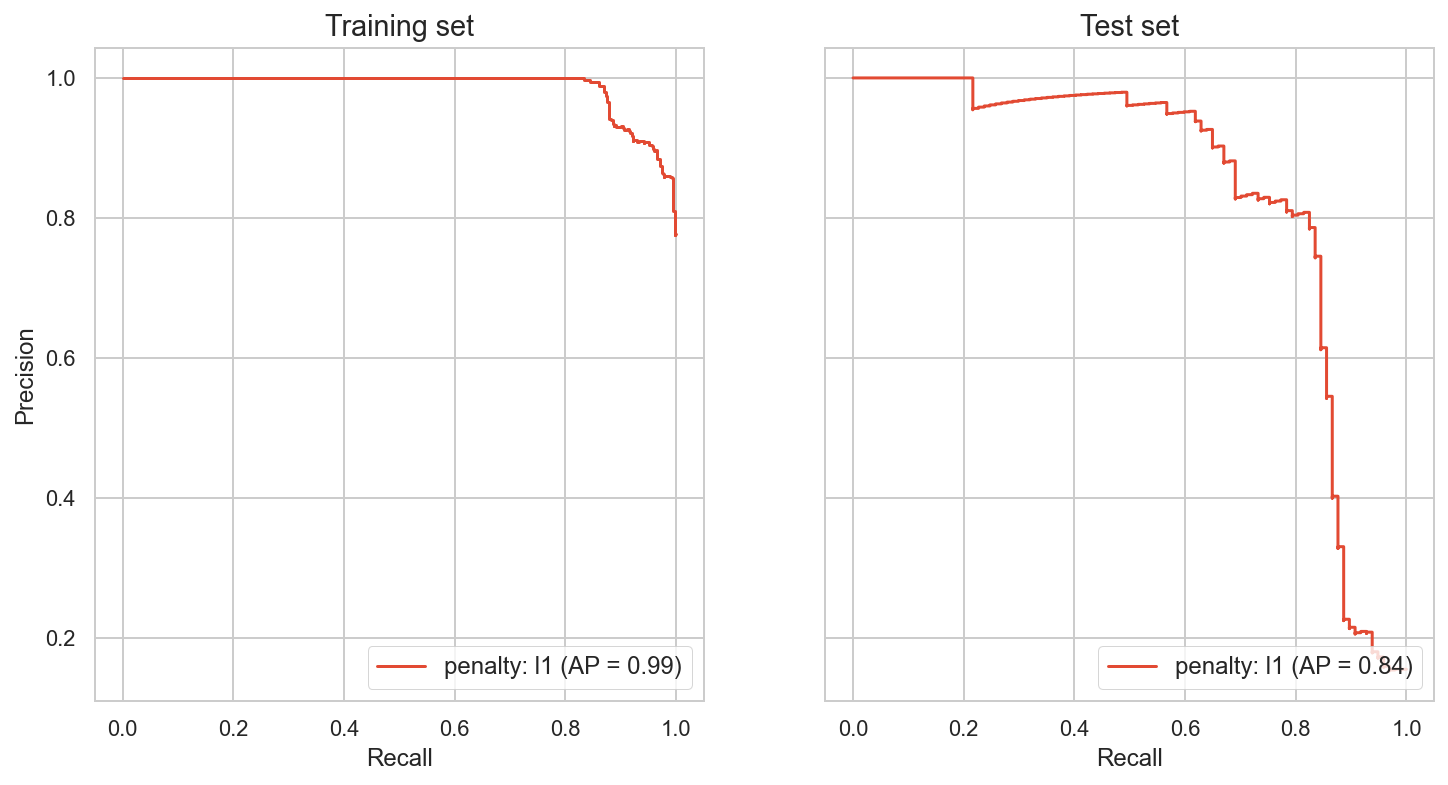

In [371]:
fig_pr, ax_pr = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plot_precision_recall_curve(rf2_fitted, X_train, y_train, ax=ax_pr[0], name='penalty: l1')
plot_precision_recall_curve(rf2_fitted, X_test, y_test, ax=ax_pr[1], name='penalty: l1')
ax_pr[0].legend(loc='lower right', fontsize=12)
ax_pr[1].legend(loc='lower right', fontsize=12)
ax_pr[1].set_ylabel(None)
ax_pr[0].set_title('Training set')
ax_pr[1].set_title('Test set')
plt.show()

In [372]:
### Accuracy  and threshold

#Accuracy score on training set
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [373]:
#Accuracy score on train set
accuracy_score(y_train, predictions_train2)

0.9774943735933983

In [374]:
#Accuracy score on test set
accuracy_score(y_test, predictions_test2)

0.9400299850074962

Threshold: 0.01 false positives: 0.8170914542728636
Threshold: 0.02 false positives: 0.808095952023988
Threshold: 0.03 false positives: 0.7931034482758621
Threshold: 0.04 false positives: 0.760119940029985
Threshold: 0.05 false positives: 0.6116941529235382
Threshold: 0.06 false positives: 0.5262368815592204
Threshold: 0.07 false positives: 0.4407796101949025
Threshold: 0.08 false positives: 0.3748125937031484
Threshold: 0.09 false positives: 0.3073463268365817
Threshold: 0.1 false positives: 0.24887556221889057
Threshold: 0.11 false positives: 0.20689655172413793
Threshold: 0.12 false positives: 0.17391304347826086
Threshold: 0.13 false positives: 0.15292353823088456
Threshold: 0.14 false positives: 0.13343328335832083
Threshold: 0.15 false positives: 0.11694152923538231
Threshold: 0.16 false positives: 0.10494752623688156
Threshold: 0.17 false positives: 0.095952023988006
Threshold: 0.18 false positives: 0.08245877061469266
Threshold: 0.19 false positives: 0.07646176911544228
Thresho

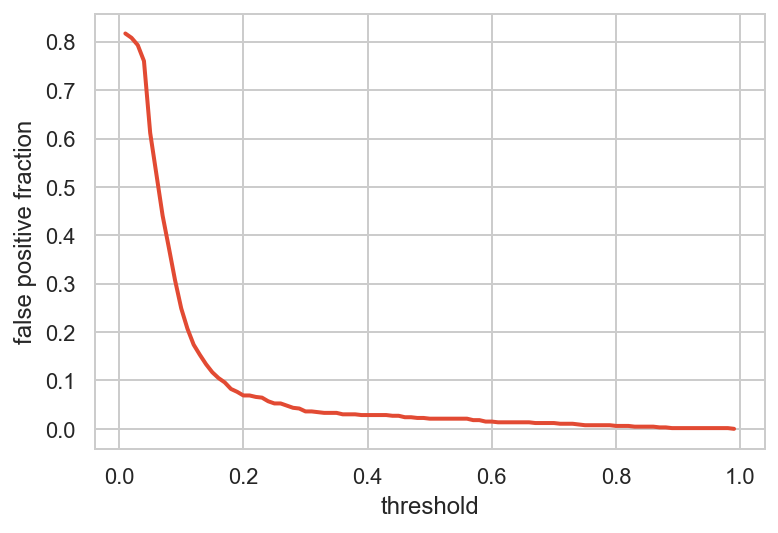

In [375]:
#false positive count as changing threshold for predicting label 1

false_positives = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in rf2_fitted.predict_proba(X_test)[:, 1]])
    fp = np.mean((y_test == 0) & (labeled_1 == 1))
    false_positives.append((thresh, fp))
    print('Threshold:', thresh, 'false positives:', fp)
false_positives = np.array(false_positives)

plt.plot(*false_positives.T, lw=2)
plt.xlabel('threshold')
plt.ylabel('false positive fraction')
plt.show()

Threshold: 0.01 Correct predictions: 0.18290854572713644
Threshold: 0.02 Correct predictions: 0.191904047976012
Threshold: 0.03 Correct predictions: 0.20689655172413793
Threshold: 0.04 Correct predictions: 0.2353823088455772
Threshold: 0.05 Correct predictions: 0.3793103448275862
Threshold: 0.06 Correct predictions: 0.46476761619190404
Threshold: 0.07 Correct predictions: 0.5427286356821589
Threshold: 0.08 Correct predictions: 0.6086956521739131
Threshold: 0.09 Correct predictions: 0.6761619190404797
Threshold: 0.1 Correct predictions: 0.7331334332833583
Threshold: 0.11 Correct predictions: 0.775112443778111
Threshold: 0.12 Correct predictions: 0.8065967016491754
Threshold: 0.13 Correct predictions: 0.8275862068965517
Threshold: 0.14 Correct predictions: 0.8470764617691154
Threshold: 0.15 Correct predictions: 0.863568215892054
Threshold: 0.16 Correct predictions: 0.8755622188905547
Threshold: 0.17 Correct predictions: 0.8830584707646177
Threshold: 0.18 Correct predictions: 0.8965517241

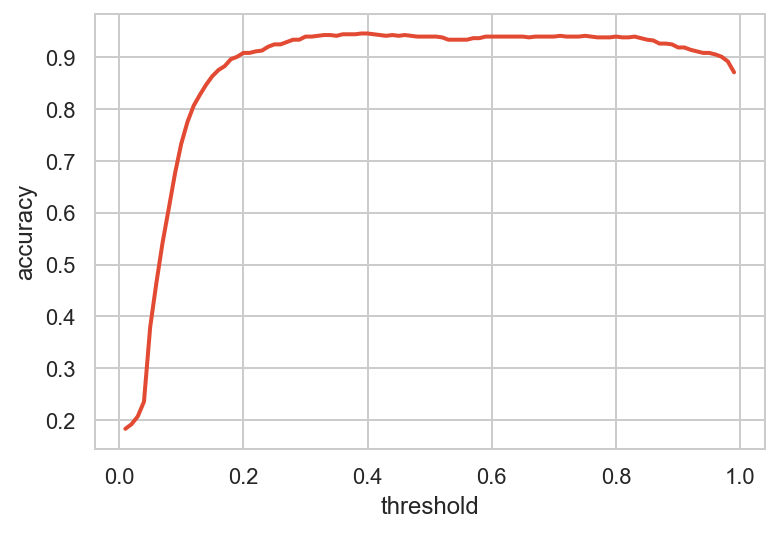

In [376]:
#Accuracy as changing your threshold for predicting label 1

accuracies = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in rf2_fitted.predict_proba(X_test)[:, 1]])
    acc = np.mean(y_test==labeled_1)
    accuracies.append((thresh, acc))
    print('Threshold:', thresh, 'Correct predictions:', acc)
accuracies = np.array(accuracies)

plt.plot(*accuracies.T, lw=2)
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.show()

In [377]:
# fraction of 1s predicted at threshold=0.5
rf2_fitted.predict(X).mean()

0.6642664266426642

In [378]:
### Classification report for train and test set

print(classification_report(y_train, predictions_train2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2280
           1       0.96      0.88      0.92       386

    accuracy                           0.98      2666
   macro avg       0.97      0.94      0.95      2666
weighted avg       0.98      0.98      0.98      2666



In [379]:
print(classification_report(y_test, predictions_test2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       570
           1       0.84      0.73      0.78        97

    accuracy                           0.94       667
   macro avg       0.90      0.85      0.87       667
weighted avg       0.94      0.94      0.94       667



In [ ]:
#trying new models

In [177]:
#MLP Classifier

In [210]:
mlpcl = MLPClassifier(hidden_layer_sizes= (300, 150, 75), batch_size=50, max_iter=500)
mlpcl.fit(X_train, y_train)
scores_mlpcl = cross_val_score(mlpcl, X_train, y_train, cv=kf, n_jobs=-2)
scores_mlpcl.mean()

0.8874696966502942

In [298]:
mlpcl_params = {'solver': ['lbfgs'], 
                'max_iter': [700, 300, 150, 75], 
                'alpha': 10.0 ** -np.arange(1, 10), 
                'hidden_layer_sizes':np.arange(10, 15), 
                'random_state':[1]}
mlpcl_gridsearch = GridSearchCV(mlpcl,
                                mlpcl_params,
                                cv=kf,
                                n_jobs=-2)

mlpcl_gridsearch.fit(X_train, y_train)

/Users/nayarareis/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size=50, beta_1=0.9, beta_2=0.999,
                                     early_stopping=False, epsilon=1e-08,
                                     hidden_layer_sizes=(300, 150, 75),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=500, momentum=0.9,
                                     n_iter_no_ch...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes'

In [289]:
# best hyperparameters
gbcl_gridsearch.best_params_

{'n_estimators': 300}

In [290]:
# best mean cross-validated accuracy from the gridsearch
gbcl_gridsearch.best_score_

0.9471102023034058

In [291]:
# assigning best_estimator_ to the variable
best_gbcl = gbcl_gridsearch.best_estimator_

In [292]:
print(best_gbcl.score(X_train, y_train))
print(best_gbcl.score(X_test, y_test))

0.9891222805701425
0.9475262368815592


In [77]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn import svm

In [ ]:
###GradientBoosterClassifier

In [206]:
gbcl = GradientBoostingClassifier(
    n_estimators=300,
    random_state=1)

In [207]:
gbcl.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [212]:
print(gbcl.score(X_train, y_train))
print(cross_val_score(gbcl, X_train, y_train, cv=kf).mean())
print(gbcl.score(X_test, y_test))

0.9891222805701425
0.9471102023034058
0.9475262368815592


In [285]:
gbcl_params = {'n_estimators': [100, 200, 300]}
gbcl_gridsearch = GridSearchCV(gbcl,
                               gbcl_params,
                               n_jobs=2,
                               cv=kf)

gbcl_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=300,
             

In [280]:
# best hyperparameters
gbcl_gridsearch.best_params_

{'n_estimators': 300}

In [281]:
# best mean cross-validated accuracy from the gridsearch
gbcl_gridsearch.best_score_

0.9471102023034058

In [282]:
# assigning best_estimator_ to the variable
best_gbcl = gbcl_gridsearch.best_estimator_

In [283]:
print(best_gbcl.score(X_train, y_train))
print(best_gbcl.score(X_test, y_test))

0.9891222805701425
0.9475262368815592


In [99]:
# SVM

In [100]:
svm = svm.SVC(C=1)
print(cross_val_score(svm, X_train, y_train, cv=kf, scoring='accuracy').mean())

0.8634638221922408


In [101]:
gamma_range = np.logspace(-5, 2, 20)
svm_params = dict(gamma=gamma_range)

svm_gridsearch = GridSearchCV(svm, svm_params, cv=kf, scoring='accuracy',
                    verbose=1, n_jobs=8)
svm_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   22.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=8,
             para...05, 1.27427499e-04,
       2.97635144e-04, 6.95192796e-04, 1.62377674e-03, 3.79269019e-03,
       8.85866790e-03, 2.06913808e-02, 4.83293024e-02, 1.12883789e-01,
       2.63665090e-01, 6.15848211e-01, 1.43844989e+00, 3.35981829e+00,
       7.84759970e+00, 1.83298071e+01, 4.28133240e+01, 1.00000000e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [102]:
svm_gridsearch_results = pd.DataFrame(svm_gridsearch.cv_results_)
svm_gridsearch_results['gamma'] = [x['gamma'] for x in svm_gridsearch_results.params.values]
svm_gridsearch_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_gamma  \
0       0.505403      0.030115         0.161920        0.025046        1e-05   
1       0.518982      0.035642         0.153085        0.056344  2.33572e-05   
2       0.554661      0.040545         0.126841        0.031383  5.45559e-05   
3       0.663554      0.039502         0.114291        0.023917  0.000127427   
4       0.705655      0.052366         0.110386        0.017136  0.000297635   

                              params  split0_test_score  split1_test_score  \
0                   {'gamma': 1e-05}           0.853933           0.855535   
1  {'gamma': 2.3357214690901213e-05}           0.853933           0.855535   
2  {'gamma': 5.4555947811685143e-05}           0.853933           0.855535   
3  {'gamma': 0.00012742749857031334}           0.853933           0.855535   
4  {'gamma': 0.00029763514416313193}           0.853933           0.855535   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.855535           0.855535           0.855535         0.855214   
1           0.855535           0.855535           0.855535         0.855214   
2           0.855535           0.855535           0.855535         0.855214   
3           0.855535           0.855535           0.855535         0.855214   
4           0.855535           0.855535           0.855535         0.855214   

   std_test_score  rank_test_score     gamma  
0        0.000641                5  0.000010  
1        0.000641                5  0.000023  
2        0.000641                5  0.000055  
3        0.000641                5  0.000127  
4        0.000641                5  0.000298

In [103]:
# best hyperparameters
svm_gridsearch.best_params_

{'gamma': 0.02069138081114788}

In [104]:
# best mean cross-validated accuracy from the gridsearch
svm_gridsearch.best_score_

0.8634645248786109

In [105]:
# assigning best_estimator_ to the variable
best_svm = svm_gridsearch.best_estimator_

In [106]:
print(best_svm.score(X_train, y_train))
print(best_svm.score(X_test, y_test))

0.9081020255063766
0.863568215892054


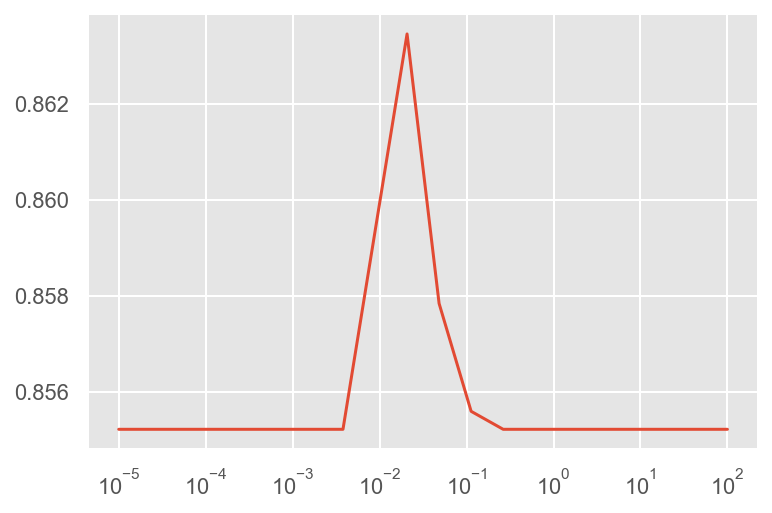

In [107]:
# plot the results
plt.plot(svm_gridsearch_results.param_gamma, svm_gridsearch_results.mean_test_score)
plt.xscale('log')
plt.show()

In [ ]:
#Saving the new models 

In [314]:
joblib.dump(mlpcl_gridsearch, 'mlpcl_gridsearch.jlib')

['mlpcl_gridsearch.jlib']

In [315]:
joblib.dump(gbcl_gridsearch, 'gbcl_gridsearch.jlib')

['gbcl_gridsearch.jlib']

In [316]:
joblib.dump(svm_gridsearch, 'svm_gridsearch.jlib')

['svm_gridsearch.jlib']

In [322]:
#rf model evaluation
### Confusion Matrix

In [303]:
rf_fitted = rf_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 176 candidates, totalling 880 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   44.1s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  2.4min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  4.6min
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed: 10.0min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 17.3min
[Parallel(n_jobs=2)]: Done 880 out of 880 | elapsed: 19.5min finished


In [304]:
joblib.dump(rf_fitted, 'rf_fitted')

['rf_fitted']

In [305]:
predictions_train = rf_fitted.predict(X_train)
predictions_test = rf_fitted.predict(X_test)

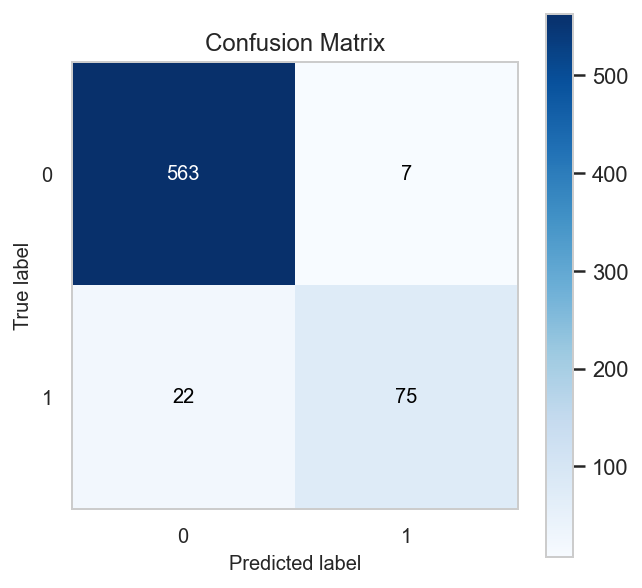

In [306]:
#Confusion matrix on the test set
skplt.metrics.plot_confusion_matrix(y_test, predictions_test, labels=[0, 1], figsize=(5,5))
plt.show()

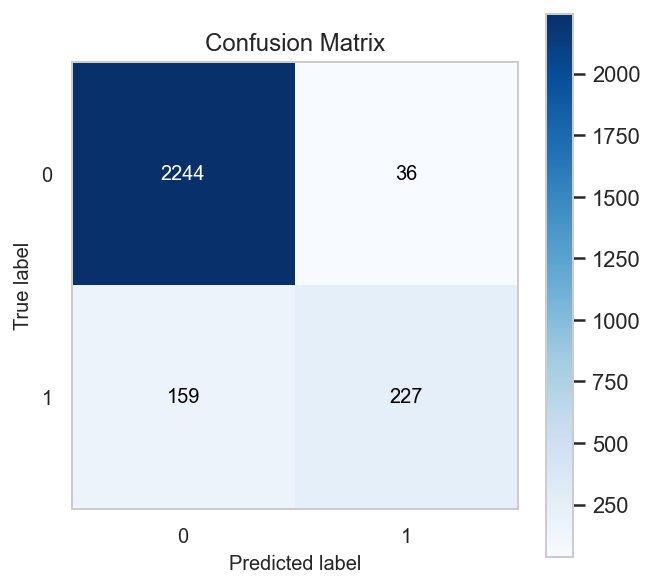

In [268]:
#Confusion matrix on the training set
skplt.metrics.plot_confusion_matrix(y_train, predictions_train, labels=[0, 1], figsize=(5,5))
plt.show()

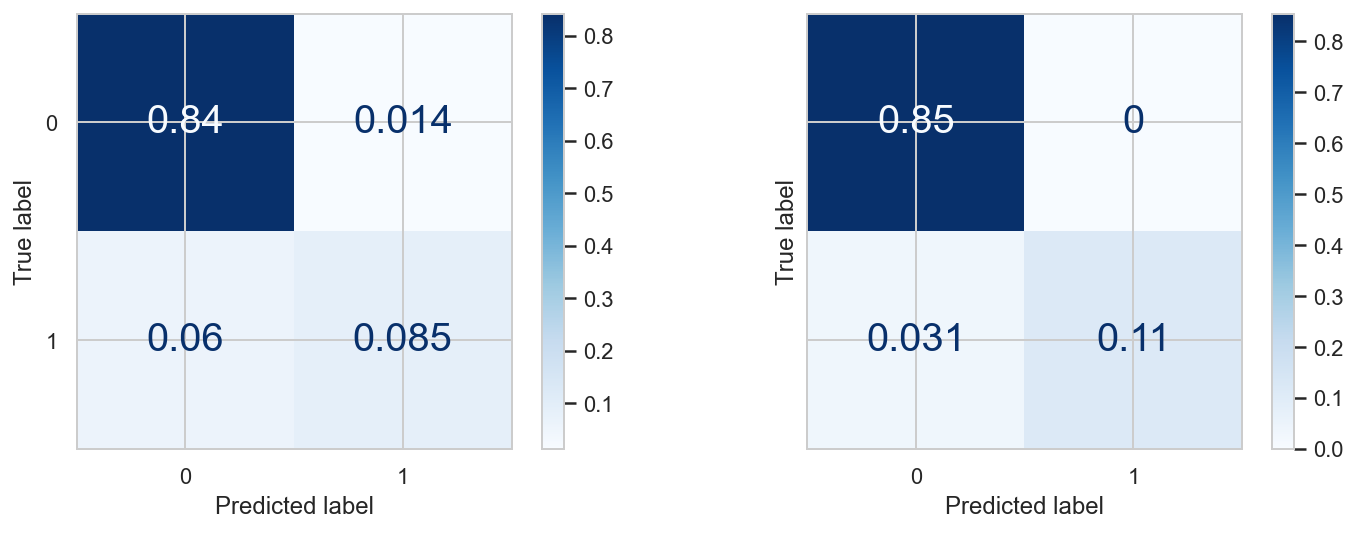

In [269]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), sharey=True)
plot_confusion_matrix(rf_fitted, X_train, y_train, cmap='Blues', ax=ax[0], normalize='all')
plot_confusion_matrix(rf_fitted, X_test, y_test, cmap='Blues', ax=ax[1], normalize='all')

for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(20)        

plt.show()

In [270]:
### ROC curve on the training and test set

In [271]:
print('ROC_AUC score on train:' , (roc_auc_score(y_train, rf_fitted.predict_proba(X_train)[:, 1])))
print('ROC_AUC score on test:' , (roc_auc_score(y_test, rf_fitted.predict_proba(X_test)[:, 1])))

ROC_AUC score on train: 0.9065158849195527
ROC_AUC score on test: 0.9894917706637729


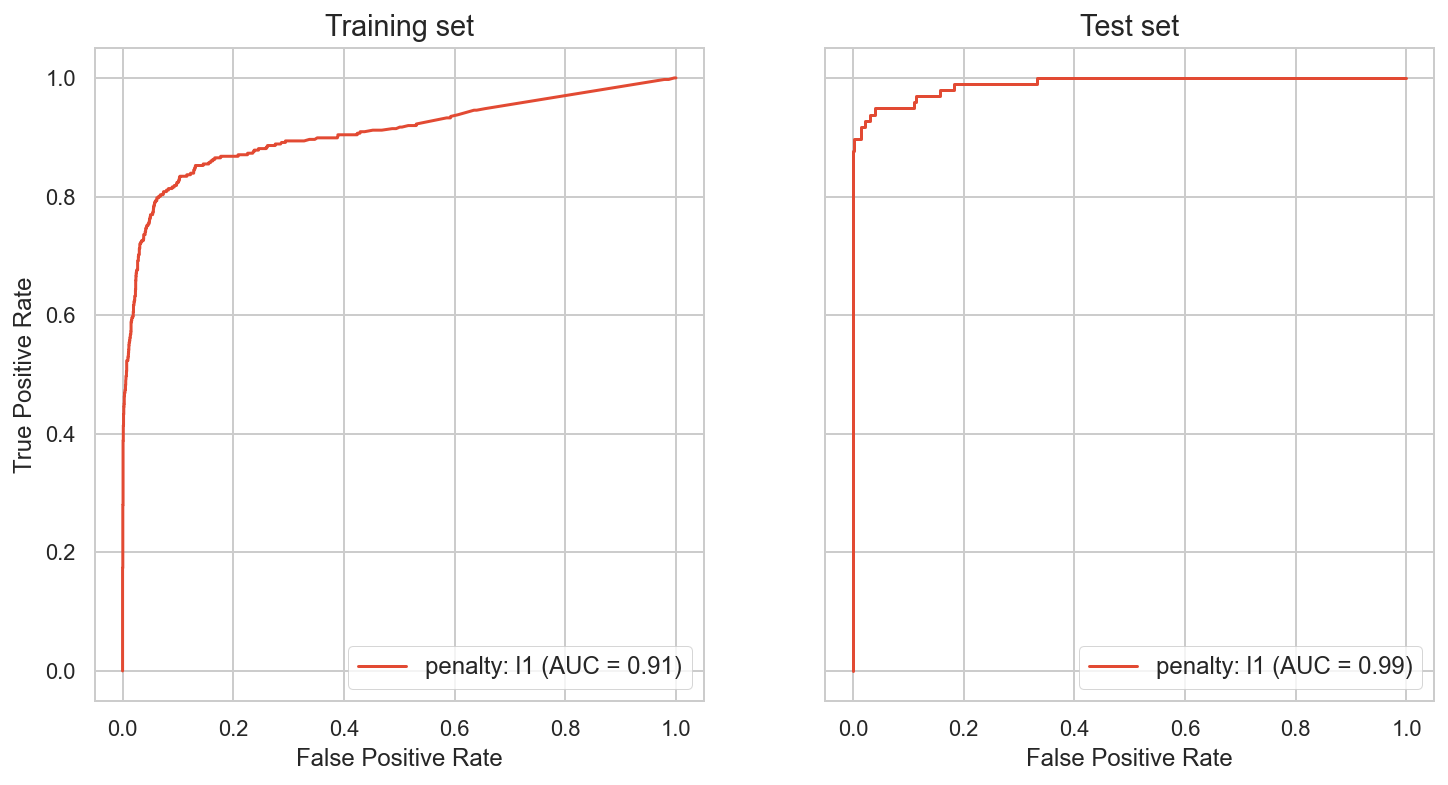

In [272]:
fig_roc, ax_roc = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plot_roc_curve(rf_fitted, X_train, y_train, ax=ax_roc[0], name='penalty: l1')
plot_roc_curve(rf_fitted, X_test, y_test, ax=ax_roc[1], name='penalty: l1')
ax_roc[0].legend(loc='lower right', fontsize=12)
ax_roc[1].legend(loc='lower right', fontsize=12)
ax_roc[1].set_ylabel(None)
ax_roc[0].set_title('Training set')
ax_roc[1].set_title('Test set')
plt.show()

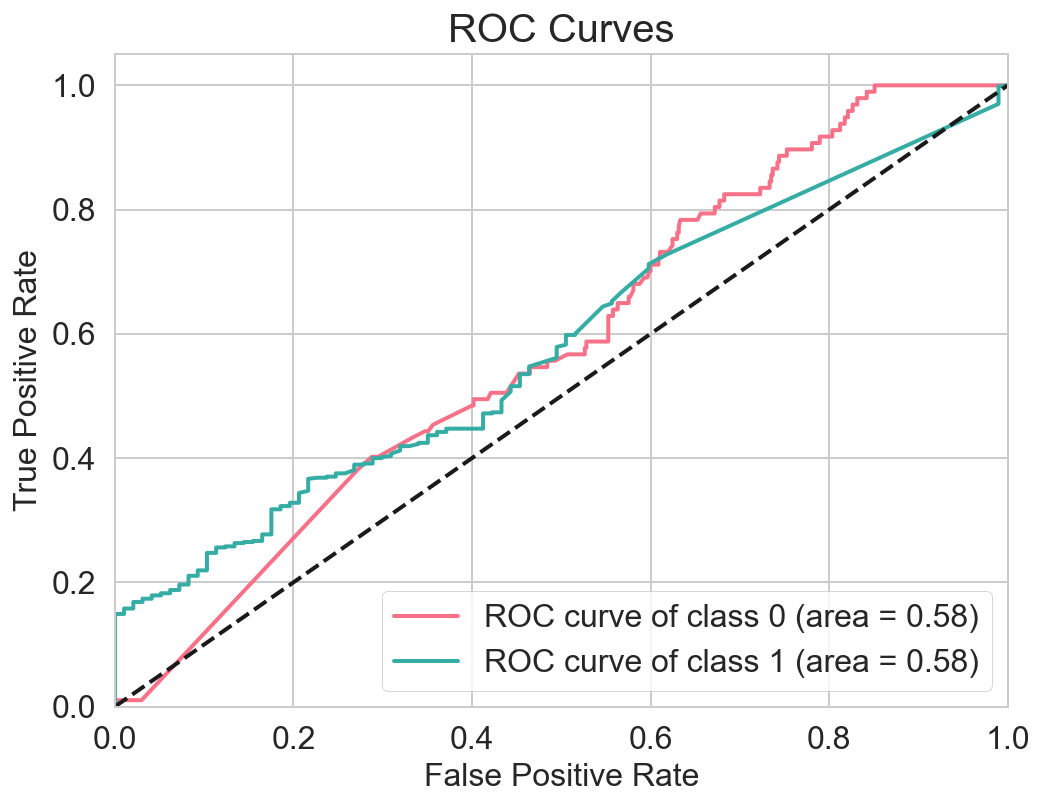

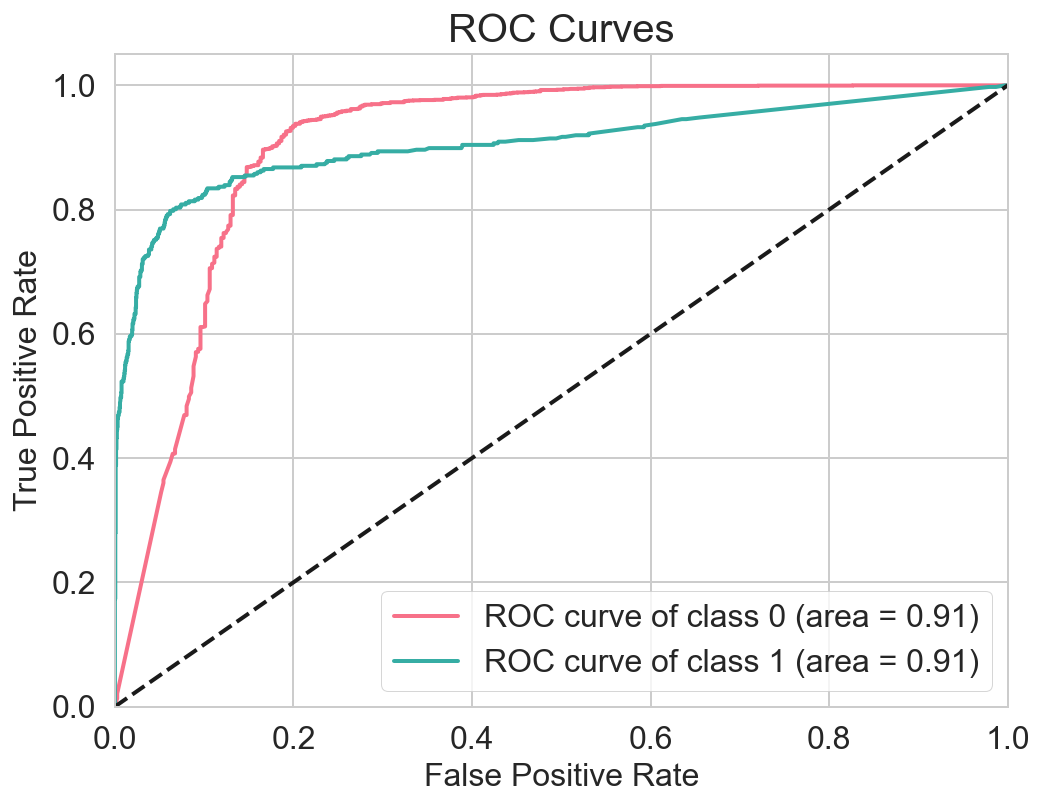

In [273]:
skplt.metrics.plot_roc(y2_test, rf_fitted.predict_proba(X_test), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

skplt.metrics.plot_roc(y_train, rf_fitted.predict_proba(X_train), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

In [274]:
### Precision-recall curve on the training and test set

#Average precision score
print(average_precision_score(y_train, rf_fitted.predict_proba(X_train)[ :, 1])) 
print(average_precision_score(y_test, rf_fitted.predict_proba(X_test)[:, 1]))

0.8063821508517636
0.9675907551729489


In [275]:
#recall score
print(recall_score(y_test, predictions_test))
print(recall_score(y_train, predictions_train))

0.7835051546391752
0.5880829015544041


In [276]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", len(rf_fitted.classes_)))

In [277]:
def plot_f1_lines(figsize=(8, 6), fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)

    # add lines of constant F1 scores

    for const in np.linspace(0.2, 0.9, 8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                    xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

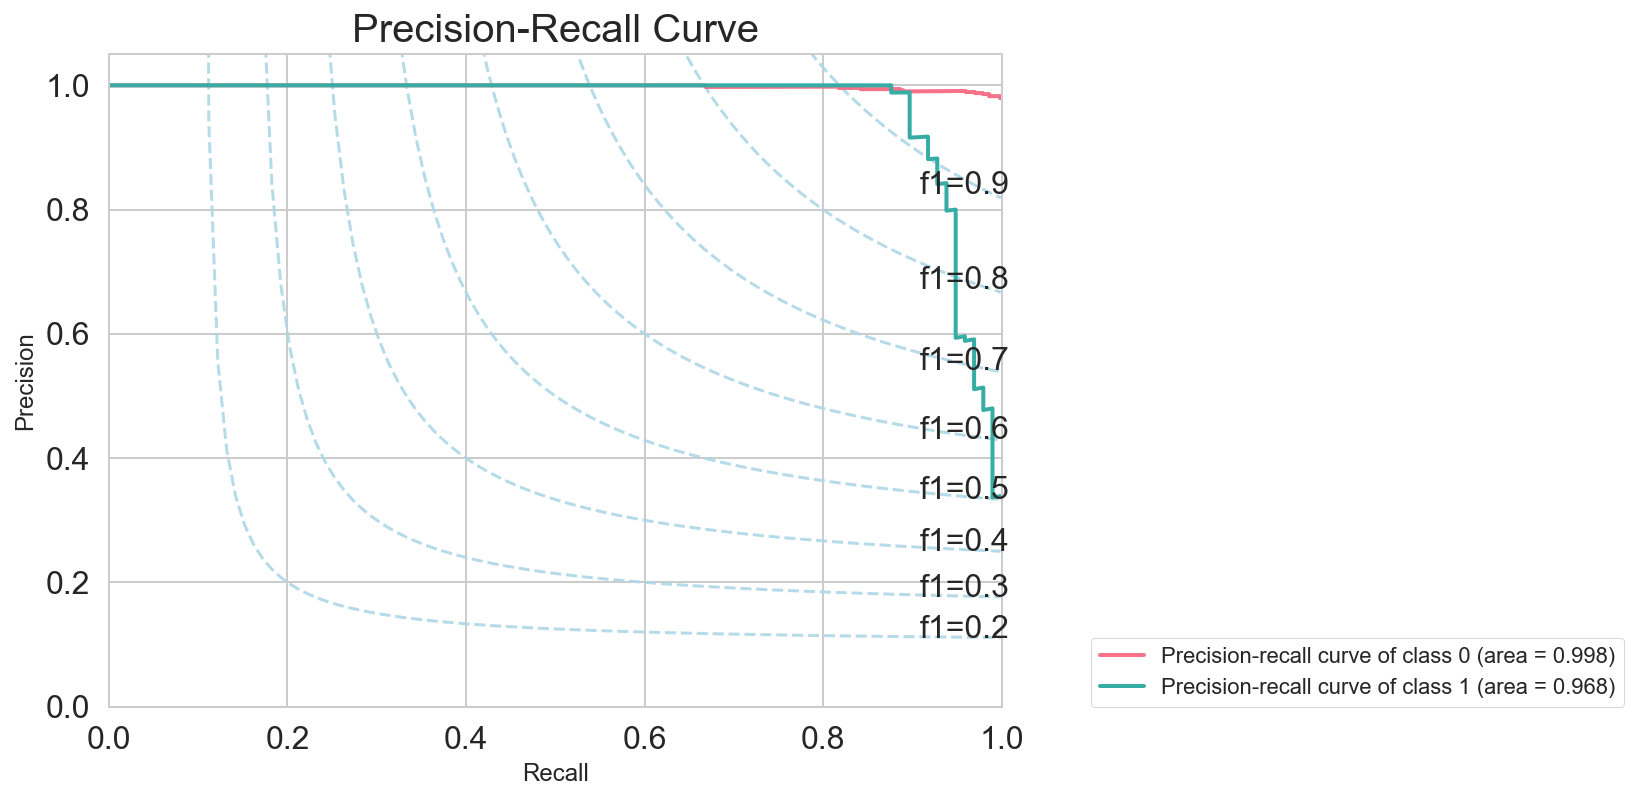

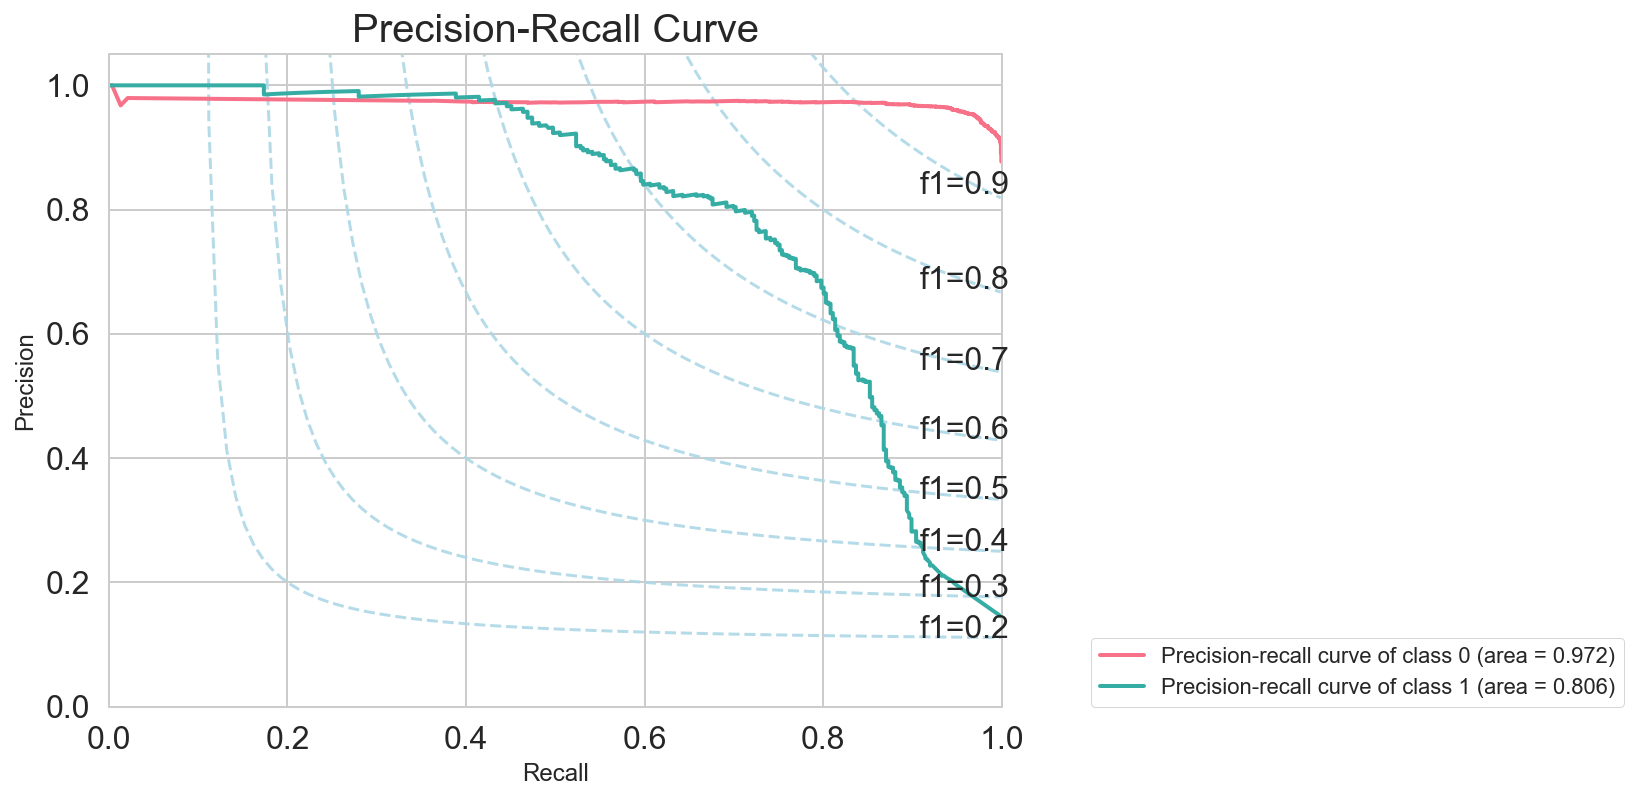

In [278]:
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, rf_fitted.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_train, rf_fitted.predict_proba(X_train),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

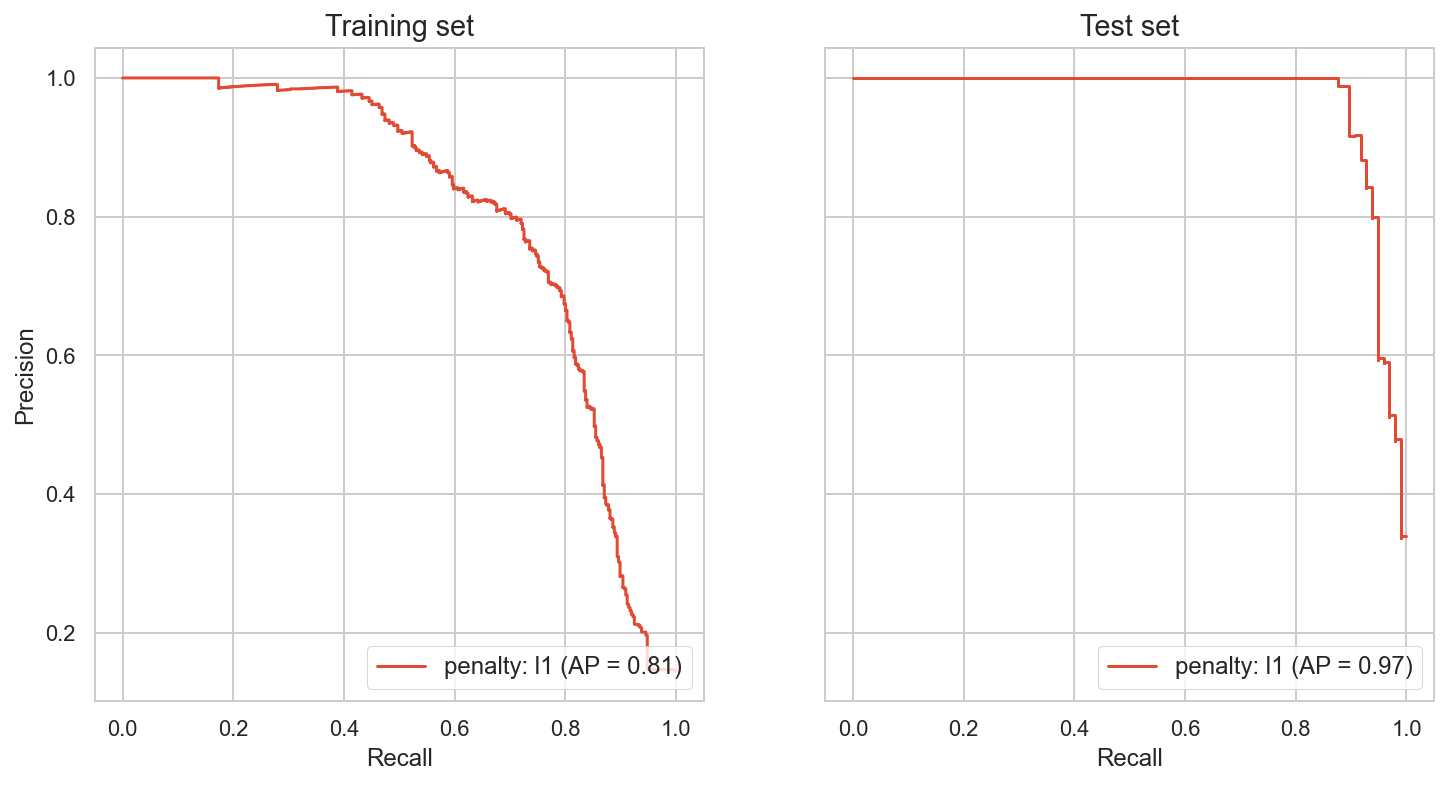

In [279]:
fig_pr, ax_pr = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plot_precision_recall_curve(rf_fitted, X_train, y_train, ax=ax_pr[0], name='penalty: l1')
plot_precision_recall_curve(rf_fitted, X_test, y_test, ax=ax_pr[1], name='penalty: l1')
ax_pr[0].legend(loc='lower right', fontsize=12)
ax_pr[1].legend(loc='lower right', fontsize=12)
ax_pr[1].set_ylabel(None)
ax_pr[0].set_title('Training set')
ax_pr[1].set_title('Test set')
plt.show()

In [280]:
### Accuracy  and threshold

In [281]:
#Accuracy score on training set
accuracy_score(y_train, predictions_train)

0.9268567141785446

In [282]:
#Accuracy score on test set
accuracy_score(y_test, predictions_test)

0.9685157421289355

Threshold: 0.01 false positives: 0.8515742128935532
Threshold: 0.02 false positives: 0.4257871064467766
Threshold: 0.03 false positives: 0.2848575712143928
Threshold: 0.04 false positives: 0.2368815592203898
Threshold: 0.05 false positives: 0.16941529235382308
Threshold: 0.06 false positives: 0.12293853073463268
Threshold: 0.07 false positives: 0.09895052473763119
Threshold: 0.08 false positives: 0.08545727136431784
Threshold: 0.09 false positives: 0.07796101949025487
Threshold: 0.1 false positives: 0.05697151424287856
Threshold: 0.11 false positives: 0.05247376311844078
Threshold: 0.12 false positives: 0.049475262368815595
Threshold: 0.13 false positives: 0.04047976011994003
Threshold: 0.14 false positives: 0.034482758620689655
Threshold: 0.15 false positives: 0.034482758620689655
Threshold: 0.16 false positives: 0.026986506746626688
Threshold: 0.17 false positives: 0.019490254872563718
Threshold: 0.18 false positives: 0.01649175412293853
Threshold: 0.19 false positives: 0.01499250374

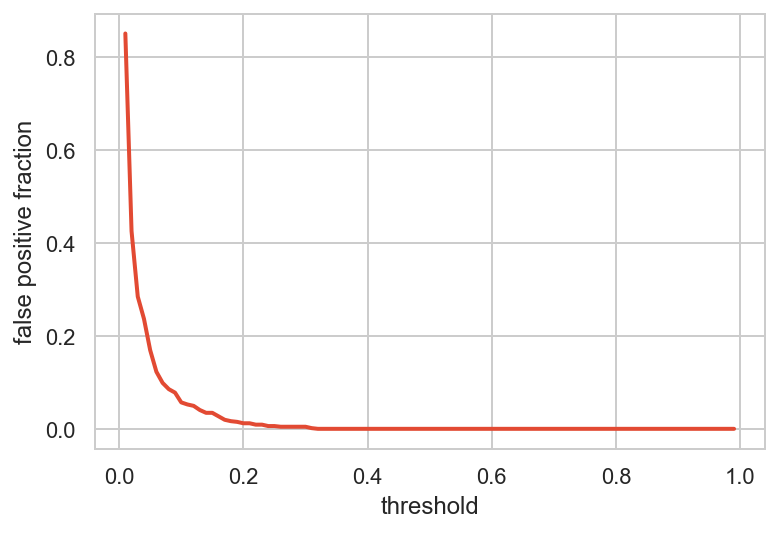

In [283]:
#false positive count as changing threshold for predicting label 1

false_positives = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in rf_fitted.predict_proba(X_test)[:, 1]])
    fp = np.mean((y_test == 0) & (labeled_1 == 1))
    false_positives.append((thresh, fp))
    print('Threshold:', thresh, 'false positives:', fp)
false_positives = np.array(false_positives)

plt.plot(*false_positives.T, lw=2)
plt.xlabel('threshold')
plt.ylabel('false positive fraction')
plt.show()

In [284]:
#Accuracy as changing your threshold for predicting label 1

Threshold: 0.01 Correct predictions: 0.14842578710644677
Threshold: 0.02 Correct predictions: 0.5742128935532234
Threshold: 0.03 Correct predictions: 0.7151424287856072
Threshold: 0.04 Correct predictions: 0.7616191904047976
Threshold: 0.05 Correct predictions: 0.8290854572713643
Threshold: 0.06 Correct predictions: 0.8725637181409296
Threshold: 0.07 Correct predictions: 0.896551724137931
Threshold: 0.08 Correct predictions: 0.9070464767616192
Threshold: 0.09 Correct predictions: 0.9145427286356822
Threshold: 0.1 Correct predictions: 0.9355322338830585
Threshold: 0.11 Correct predictions: 0.9400299850074962
Threshold: 0.12 Correct predictions: 0.9430284857571214
Threshold: 0.13 Correct predictions: 0.952023988005997
Threshold: 0.14 Correct predictions: 0.9580209895052474
Threshold: 0.15 Correct predictions: 0.9580209895052474
Threshold: 0.16 Correct predictions: 0.9640179910044977
Threshold: 0.17 Correct predictions: 0.9700149925037481
Threshold: 0.18 Correct predictions: 0.97151424287

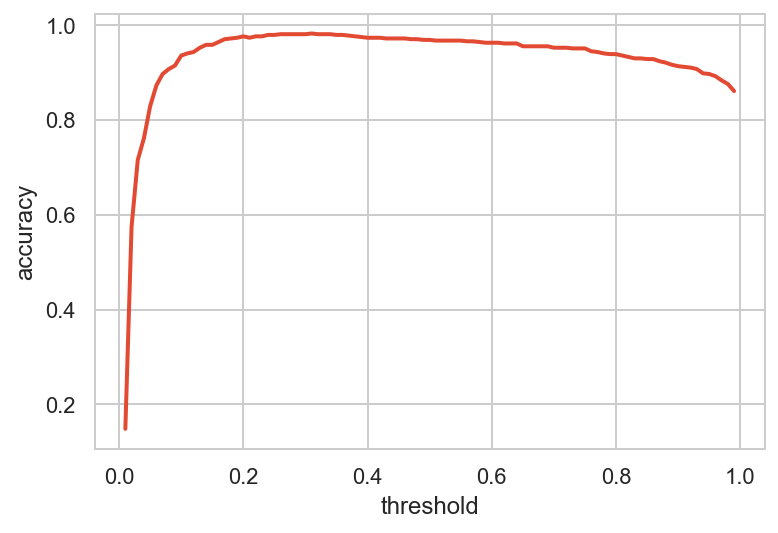

In [285]:
accuracies = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in rf_fitted.predict_proba(X_test)[:, 1]])
    acc = np.mean(y_test==labeled_1)
    accuracies.append((thresh, acc))
    print('Threshold:', thresh, 'Correct predictions:', acc)
accuracies = np.array(accuracies)

plt.plot(*accuracies.T, lw=2)
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.show()

In [286]:
# fraction of 1s predicted at threshold=0.5
rf_fitted.predict(X).mean()

0.9993999399939995

In [287]:
### Classification report for train and test set

In [288]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      2280
           1       0.86      0.59      0.70       386

    accuracy                           0.93      2666
   macro avg       0.90      0.79      0.83      2666
weighted avg       0.92      0.93      0.92      2666



In [289]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       570
           1       1.00      0.78      0.88        97

    accuracy                           0.97       667
   macro avg       0.98      0.89      0.93       667
weighted avg       0.97      0.97      0.97       667



In [290]:
# Get the predicted probabilities and explicitly name the columns:
Predicted_proba = pd.DataFrame(rf_fitted.predict_proba(X), 
             columns=['class_0_pp', 'class_1_pp'])
Predicted_proba.head()

class_0_pp  class_1_pp
0    0.092689    0.907311
1    0.141493    0.858507
2    0.141493    0.858507
3    0.131493    0.868507
4    0.092689    0.907311

In [291]:
def predict_at_threshold(x, threshold=0.5):
    if x >= threshold:
        return 1
    else:
        return 0

In [292]:
# fraction of 1s predicted at threshold=0.5
rf_fitted.predict(X).mean()

0.9993999399939995

In [293]:
Predicted_proba['pred_class_thresh'] = Predicted_proba.class_1_pp.apply(predict_at_threshold, 
                                                threshold=0.5)
Predicted_proba.head(20)

class_0_pp  class_1_pp  pred_class_thresh
0     0.092689    0.907311                  1
1     0.141493    0.858507                  1
2     0.141493    0.858507                  1
3     0.131493    0.868507                  1
4     0.092689    0.907311                  1
5     0.300000    0.700000                  1
6     0.141493    0.858507                  1
7     0.141493    0.858507                  1
8     0.131493    0.868507                  1
9     0.141493    0.858507                  1
10    0.328805    0.671195                  1
11    0.092689    0.907311                  1
12    0.131493    0.868507                  1
13    0.300000    0.700000                  1
14    0.092689    0.907311                  1
15    0.092689    0.907311                  1
16    0.131493    0.868507                  1
17    0.092689    0.907311                  1
18    0.092689    0.907311                  1
19    0.328805    0.671195                  1

In [294]:
# fraction of 1s predicted at threshold=0.1
Predicted_proba.pred_class_thresh.mean()

0.9993999399939995

In [295]:
conmat = confusion_matrix(
    y, Predicted_proba.pred_class_thresh, labels=[1, 0])

confusion = pd.DataFrame(conmat, index=['actual churn', 'actual no churn'],
                         columns=['predicted churn', 'predicted no churn'])
confusion

predicted churn  predicted no churn
actual churn                 482                   1
actual no churn             2849                   1

In [296]:
print(classification_report(y, Predicted_proba.pred_class_thresh))

              precision    recall  f1-score   support

           0       0.50      0.00      0.00      2850
           1       0.14      1.00      0.25       483

    accuracy                           0.14      3333
   macro avg       0.32      0.50      0.13      3333
weighted avg       0.45      0.14      0.04      3333



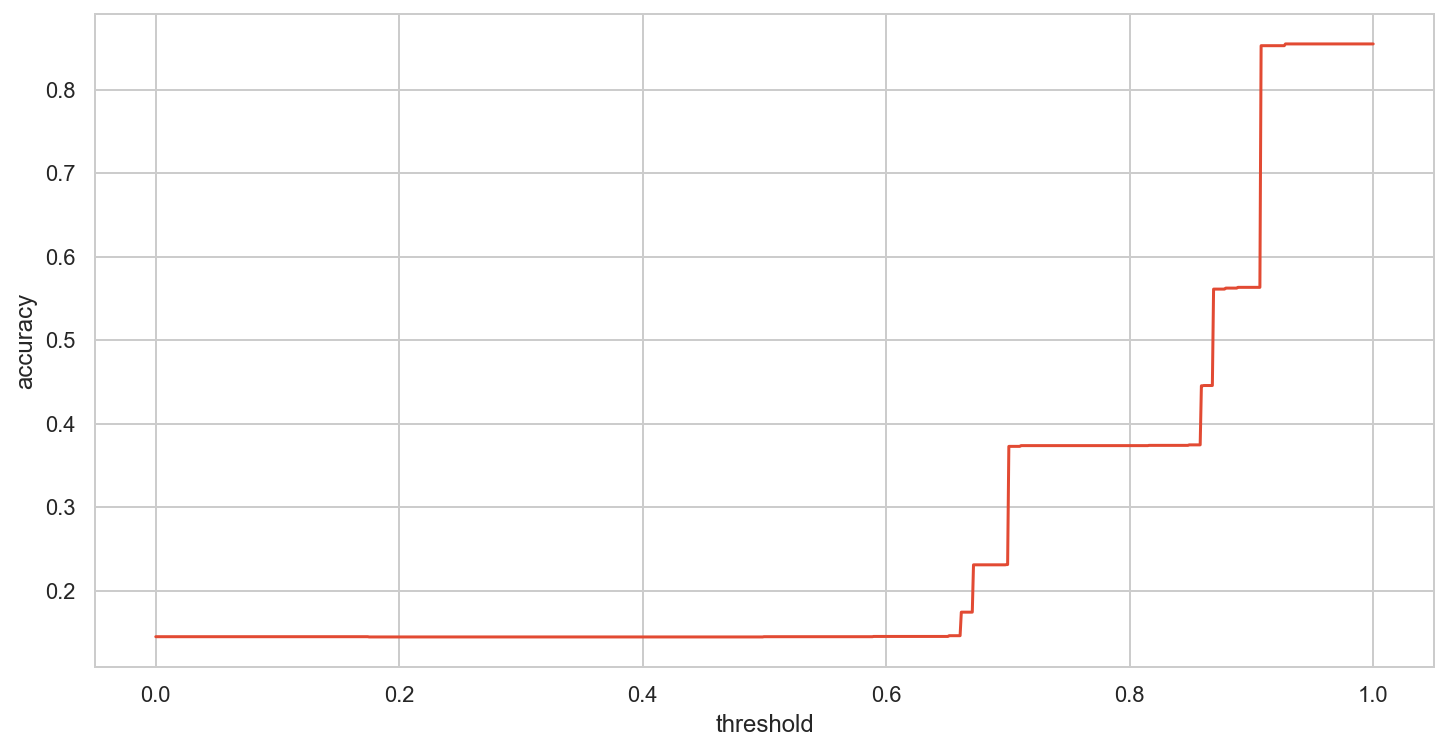

In [297]:
accuracies = np.array(
    [(i, accuracy_score(y,Predicted_proba.class_1_pp.apply(predict_at_threshold, threshold=i))) 
        for i in np.linspace(0, 1, 1000)])
plt.figure(figsize=(12, 6))
plt.plot(accuracies[:, 0], accuracies[:, 1])
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.show()

### Part 2 

In [ ]:
#Swapped labels in the "Churn" variable

In [ ]:
#Swaping labels to check if it can impact in the data:
#1 will now mean customer retained and 
#0 will mean customer churned

In [8]:
tel2 = tel_20.merge(tel_80, how='outer')
tel2.head(2)

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   

   Customer service calls  Churn  
0                       1  False  
1                       4   True

In [9]:
#count before swapping labels
tel2.Churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: Churn, dtype: float64

In [10]:
tel2.shape

(3333, 20)

In [11]:
tel2['Churn'] = tel2['Churn'].astype(int)

In [12]:
tel2.Churn.dtype

dtype('int64')

In [13]:
tel2.head(2)

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   

   Customer service calls  Churn  
0                       1      0  
1                       4      1

In [14]:
def label_swapper(row):
    if row == 1:
        return 0
    if row == 0:
        return 1

In [15]:
tel2['Churn'] = tel2['Churn'].apply(label_swapper)

In [16]:
tel2.head(2)

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   

   Customer service calls  Churn  
0                       1      1  
1                       4      0

In [19]:
#count after swapping labels
baseline = tel2.Churn.value_counts()
baseline

1    2850
0     483
Name: Churn, dtype: int64

In [110]:
tel2 = pd.get_dummies(tel2, columns=['Area code', 'International plan', 'Voice mail plan', 
            'State'], drop_first=True).copy()

In [111]:
X2 = tel2.copy()
y2 = X2.pop('Churn')

In [112]:
X2.columns

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Total charge', 'Area code_415', 'Area code_510',
       'International plan_Yes', 'Voice mail plan_Yes', 'State_AL', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
       'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD',
       'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT',
       'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM',
       'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA',
       'State_RI', 'State_SC', 'Stat

In [113]:
print(X2.head(2))
print(y2.head(2))

   Account length  Number vmail messages  Total day minutes  Total day calls  \
0             117                      0              184.5               97   
1              65                      0              129.1              137   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   

   Customer service calls  Total charge  Area code_415  Area code_510  \
0                       1         61.26              0              0  

In [114]:
y2.values

array([1, 0, 0, ..., 1, 1, 1])

In [115]:
tel2['Churn'].value_counts(normalize=True)

1    0.855086
0    0.144914
Name: Churn, dtype: float64

In [116]:
print('baseline tel 2:', tel2['Churn'].value_counts(normalize=True).max())

baseline tel 2: 0.8550855085508551


In [117]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,
                        stratify=y2,test_size=0.2, random_state=1)

In [118]:
scaler = StandardScaler()
X2_train = pd.DataFrame(scaler.fit_transform(X2_train), columns = X2_train.columns)
X2_test = pd.DataFrame(scaler.transform(X2_test), columns= X2_test.columns)

In [120]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
#rf4
#Analysis RF4 Swaped label
#with 1 = customer retained and 0 = churn
#and Gridsearch with scoring='f1'

In [137]:
#rf4
#another ramdom forest model with scoring='f1' and class_weight='balanced' on gridsearch parameters
rf4_params = {
    'n_estimators': [50, 100, 200, 300],
             'max_features': [1.0, 0.9, 0.8, 0.7],
             'max_depth': [None]+list(range(1,50,8))}
rf4 = RandomForestClassifier(random_state=1, class_weight='balanced')
rf4_gridsearch = GridSearchCV(rf4,
                              rf4_params,
                              n_jobs=2, 
                              cv=kf, 
                              verbose=3, 
                             scoring='f1')

rf4_gridsearch.fit(X2_train, y2_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   40.5s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  6.1min
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed: 12.6min
[Parallel(n_jobs=2)]: Done 640 out of 640 | elapsed: 16.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                       

In [138]:
# best hyperparameters
rf4_gridsearch.best_params_

{'max_depth': 17, 'max_features': 1.0, 'n_estimators': 100}

In [139]:
# best mean cross-validated accuracy from the gridsearch
rf4_gridsearch.best_score_

0.9768450979075138

In [140]:
# assigning best_estimator_ to the variable
best_rf4 = rf4_gridsearch.best_estimator_

In [141]:
print(best_rf4.score(X2_train, y2_train))
print(best_rf4.score(X2_test, y2_test))

1.0
0.9565217391304348


In [142]:
joblib.dump(rf4_gridsearch, 'rf4_gridsearch.jlib')

['rf4_gridsearch.jlib']

In [352]:
rf4_fitted = rf4_gridsearch.fit(X2_train, y2_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   47.3s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  5.2min
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed: 10.1min
[Parallel(n_jobs=2)]: Done 640 out of 640 | elapsed: 13.1min finished


In [353]:
joblib.dump(rf4_fitted, 'rf4_fitted.jlib')

['rf4_fitted.jlib']

In [354]:
#realoding the model
#rf4_gridsearch_reloaded = joblib.load('rf4_gridsearch.jlib')
#rf4_fitted = rf4_gridsearch_reloaded

In [355]:
predictions_train4 = rf4_fitted.predict(X2_train)
predictions_test4 = rf4_fitted.predict(X2_test)

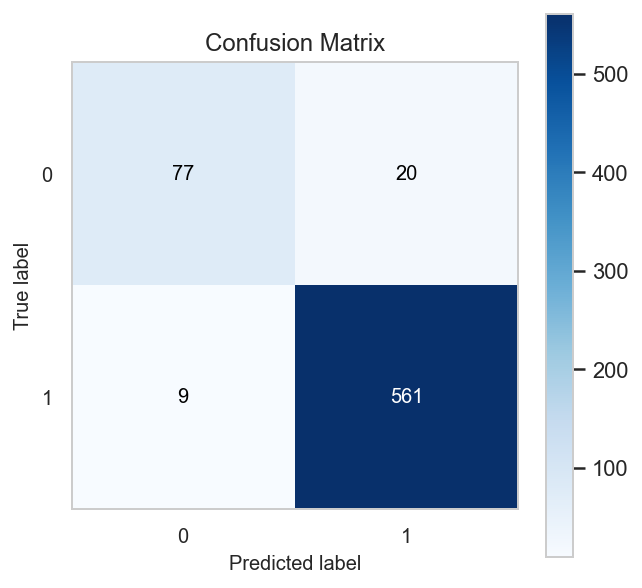

In [356]:
# Confusion matrix rf4
skplt.metrics.plot_confusion_matrix(y2_test, predictions_test4, labels=[0, 1], figsize=(5,5))
plt.show()

In [357]:
tp_rf4 = np.sum((y2_test == 0) & (predictions_test4 == 0))
fp_rf4 = np.sum((y2_test == 1) & (predictions_test4 == 0))
tn_rf4 = np.sum((y2_test == 1) & (predictions_test4 == 1))
fn_rf4 = np.sum((y2_test == 0) & (predictions_test4 == 1))
print("tp:", tp_rf4)
print("fp:", fp_rf4)
print("tn:", tn_rf4)
print("fn:", fn_rf4)
print("Number of correct classifications:", tp_rf4+tn_rf4)
print("Number of classification errors:", fp_rf4+fn_rf4)

tp: 77
fp: 9
tn: 561
fn: 20
Number of correct classifications: 638
Number of classification errors: 29


In [121]:
# another ramdom forest model with scoring='recall' and class_weight='balanced' on gridsearch parameters
#rf3
rf3_params = {
    'n_estimators': [50, 100, 200, 300],
             'max_features': [1.0, 0.9, 0.8, 0.7],
             'max_depth': [None]+list(range(1,50,8))}
rf3 = RandomForestClassifier(random_state=1, class_weight='balanced')
rf3_gridsearch = GridSearchCV(rf3,
                              rf3_params,
                              n_jobs=2, 
                              cv=kf, 
                              verbose=3, 
                             scoring='recall')

rf3_gridsearch.fit(X2_train, y2_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   53.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  2.7min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  5.7min
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed: 12.6min
[Parallel(n_jobs=2)]: Done 640 out of 640 | elapsed: 16.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                       

In [122]:
# best hyperparameters
rf3_gridsearch.best_params_

{'max_depth': None, 'max_features': 0.7, 'n_estimators': 100}

In [123]:
# best mean cross-validated accuracy from the gridsearch
rf3_gridsearch.best_score_

0.9903508771929825

In [124]:
# assigning best_estimator_ to the variable
best_rf3 = rf3_gridsearch.best_estimator_

In [125]:
print(best_rf3.score(X2_train, y2_train))
print(best_rf3.score(X2_test, y2_test))

1.0
0.9565217391304348


In [307]:
rf3_fitted = rf3_gridsearch.fit(X2_train, y2_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   48.6s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  5.3min
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed: 10.4min
[Parallel(n_jobs=2)]: Done 640 out of 640 | elapsed: 13.4min finished


In [308]:
#Saving chosen model rf3
joblib.dump(rf3_fitted, 'rf3_fitted.jlib')

['rf3_fitted.jlib']

In [130]:
#realoding the model
rf3_gridsearch_reloaded = joblib.load('rf3_fitted.jlib')
rf3_gridsearch_reloaded

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                       

In [ ]:
#r3_fitted = rf3_gridsearch_reloaded

In [309]:
predictions_train3 = rf3_fitted.predict(X2_train)
predictions_test3 = rf3_fitted.predict(X2_test)

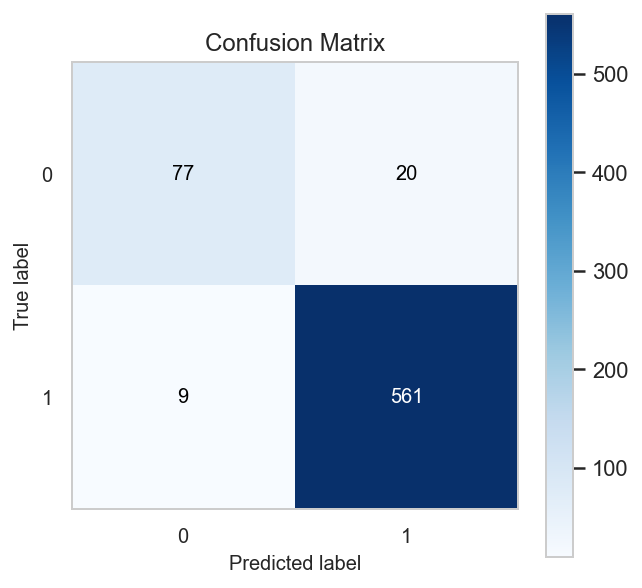

In [310]:
#Confusion matrix rf3, 
skplt.metrics.plot_confusion_matrix(y2_test, predictions_test3, labels=[0, 1], figsize=(5,5))
plt.show()

In [311]:
#Analysis RF3
tp_rf3 = np.sum((y2_test == 0) & (predictions_test3 == 0))
fp_rf3 = np.sum((y2_test == 1) & (predictions_test3 == 0))
tn_rf3 = np.sum((y2_test == 1) & (predictions_test3 == 1))
fn_rf3 = np.sum((y2_test == 0) & (predictions_test3 == 1))
print("tp:", tp_rf3)
print("fp:", fp_rf3)
print("tn:", tn_rf3)
print("fn:", fn_rf3)
print("Number of correct classifications:", tp_rf3+tn_rf3)
print("Number of classification errors:", fp_rf3+fn_rf3)

tp: 77
fp: 9
tn: 561
fn: 20
Number of correct classifications: 638
Number of classification errors: 29


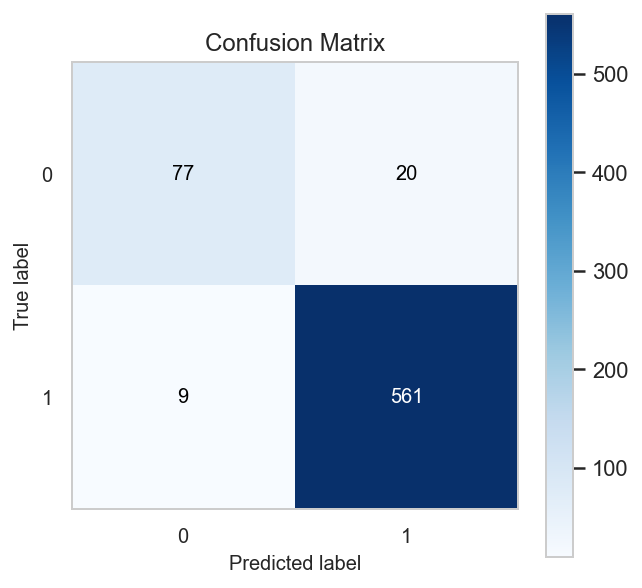

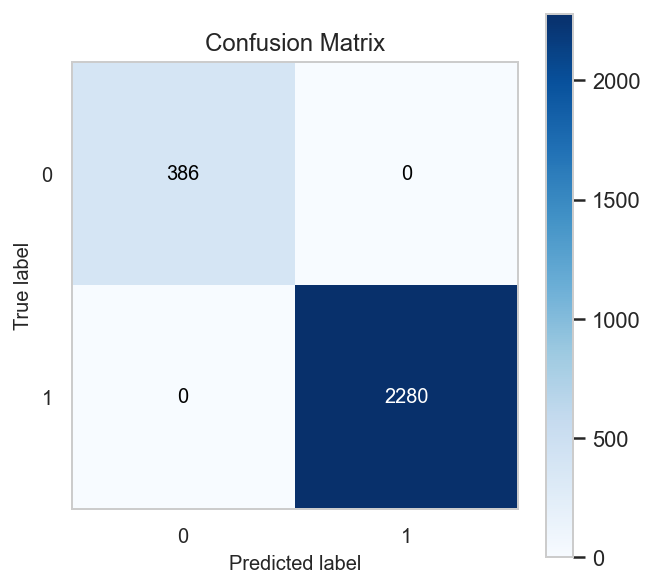

In [312]:
# Confusion matrix RF3 train and test set
skplt.metrics.plot_confusion_matrix(y2_test, predictions_test3, labels=[0, 1], figsize=(5,5))
plt.show()
skplt.metrics.plot_confusion_matrix(y2_train, predictions_train3, labels=[0, 1], figsize=(5,5))
plt.show()

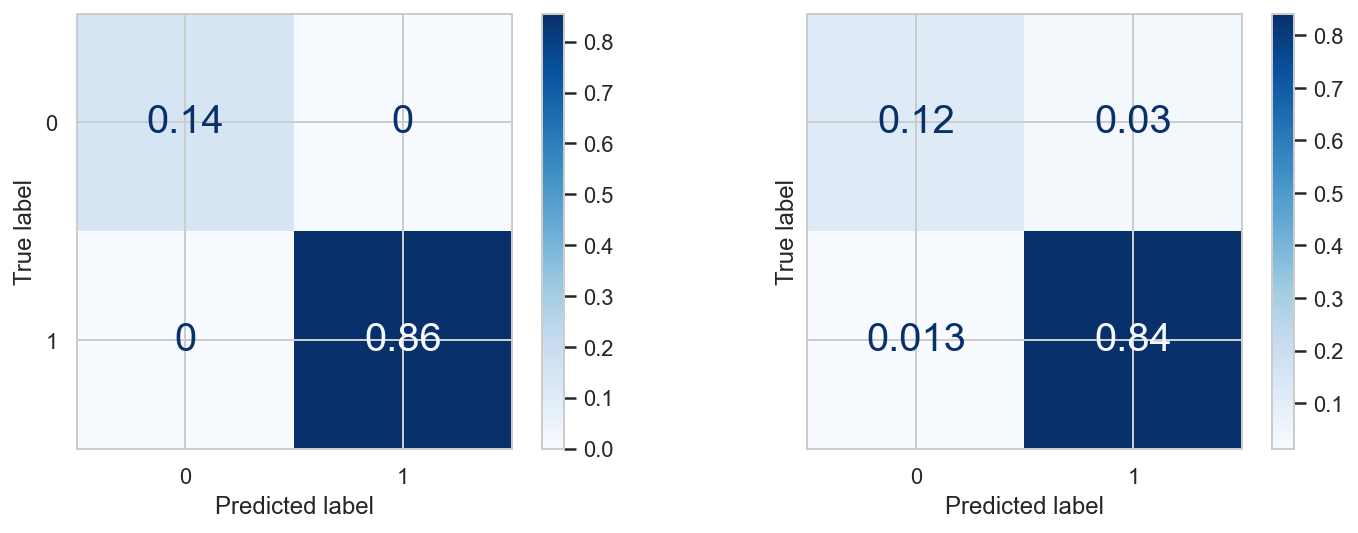

In [313]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), sharey=True)
plot_confusion_matrix(rf3_fitted, X2_train, y2_train, cmap='Blues', ax=ax[0], normalize='all')
plot_confusion_matrix(rf3_fitted, X2_test, y2_test, cmap='Blues', ax=ax[1], normalize='all')

for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(20)        

plt.show()

In [314]:
print('ROC_AUC score on train:' , (roc_auc_score(y2_train, rf3_fitted.predict_proba(X2_train)[:, 1])))
print('ROC_AUC score on test:' , (roc_auc_score(y2_test, rf3_fitted.predict_proba(X2_test)[:, 1])))

ROC_AUC score on train: 1.0
ROC_AUC score on test: 0.9056339301862905


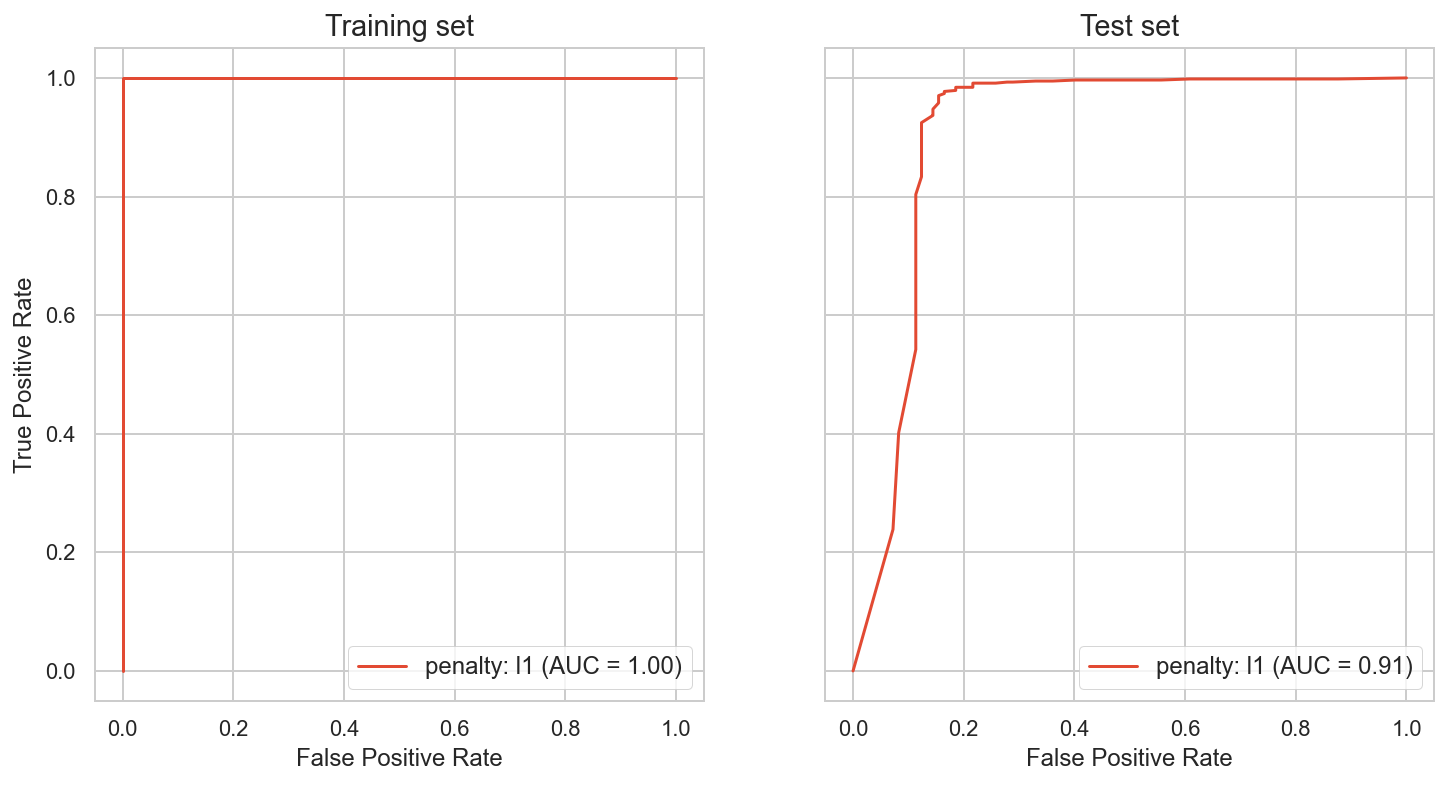

In [315]:
fig_roc, ax_roc = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plot_roc_curve(rf3_fitted, X2_train, y2_train, ax=ax_roc[0], name='penalty: l1')
plot_roc_curve(rf3_fitted, X2_test, y2_test, ax=ax_roc[1], name='penalty: l1')
ax_roc[0].legend(loc='lower right', fontsize=12)
ax_roc[1].legend(loc='lower right', fontsize=12)
ax_roc[1].set_ylabel(None)
ax_roc[0].set_title('Training set')
ax_roc[1].set_title('Test set')
plt.show()

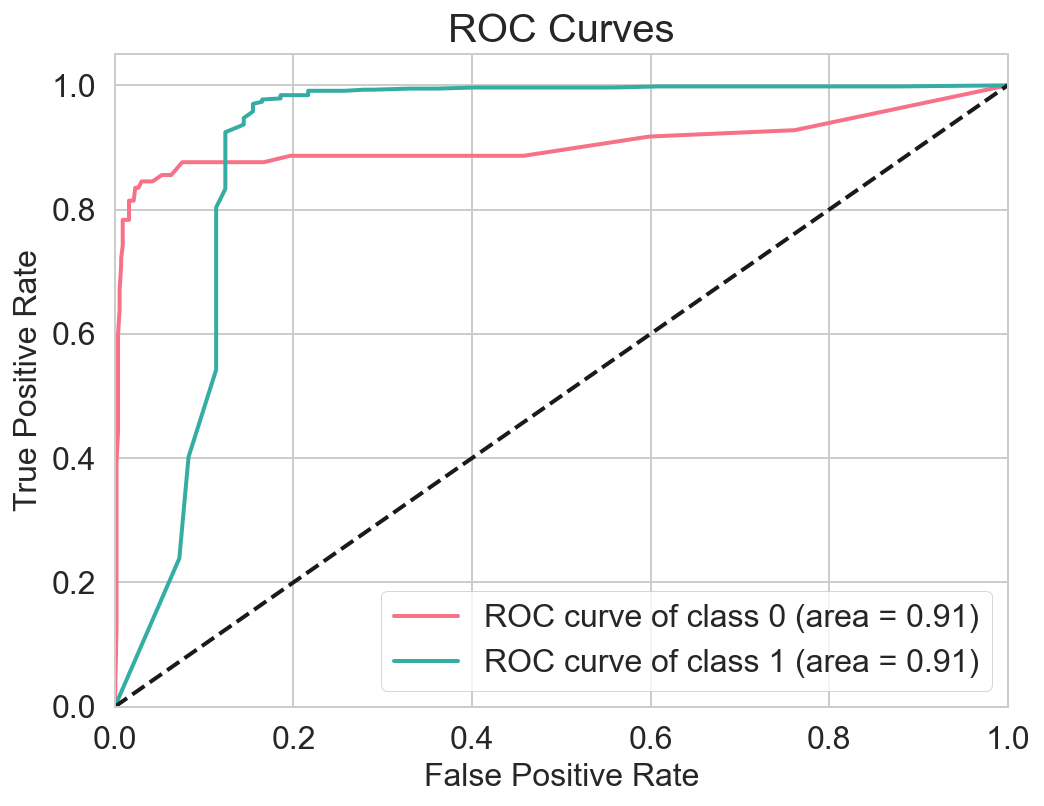

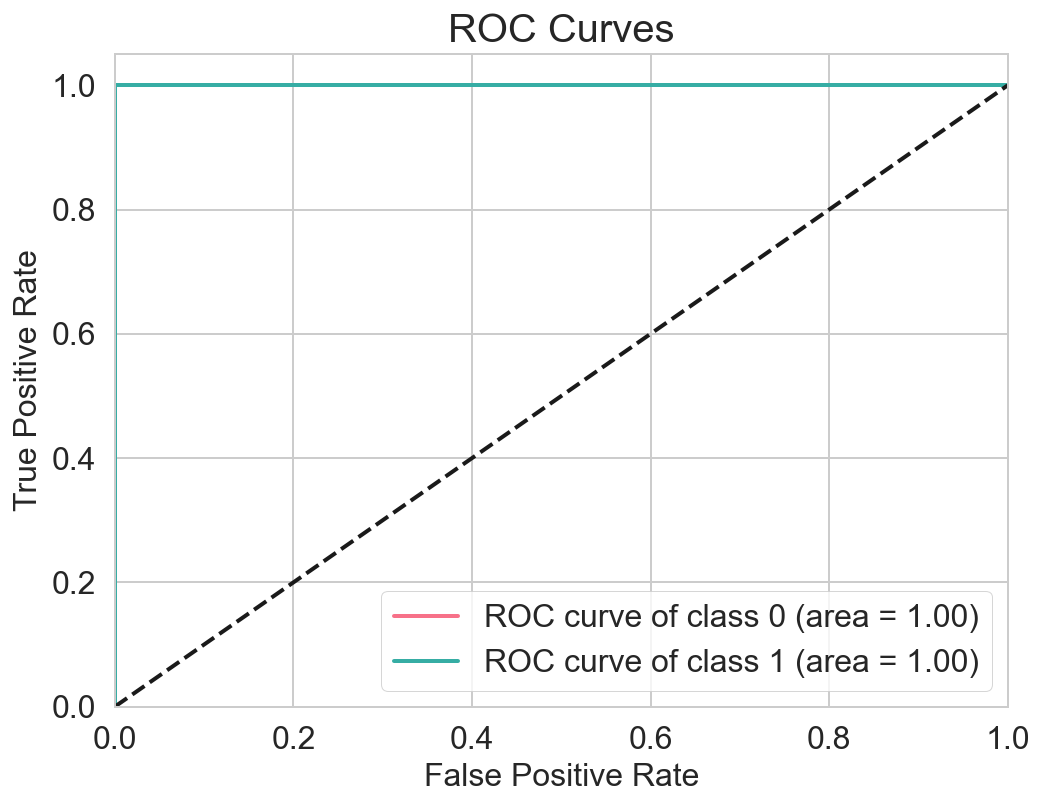

In [316]:
skplt.metrics.plot_roc(y2_test, rf3_fitted.predict_proba(X2_test), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

skplt.metrics.plot_roc(y2_train, rf3_fitted.predict_proba(X2_train), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

In [317]:
### Precision-recall curve on the training and test set rf3

In [318]:
#Average precision score
print(average_precision_score(y2_train, rf3_fitted.predict_proba(X2_train)[ :, 1])) 
print(average_precision_score(y2_test, rf3_fitted.predict_proba(X2_test)[:, 1]))

1.0
0.9655748410342769


In [319]:
#recall score
print(recall_score(y2_test, predictions_test3))
print(recall_score(y2_train, predictions_train3))

0.9842105263157894
1.0


In [320]:
from matplotlib.colors import ListedColormap

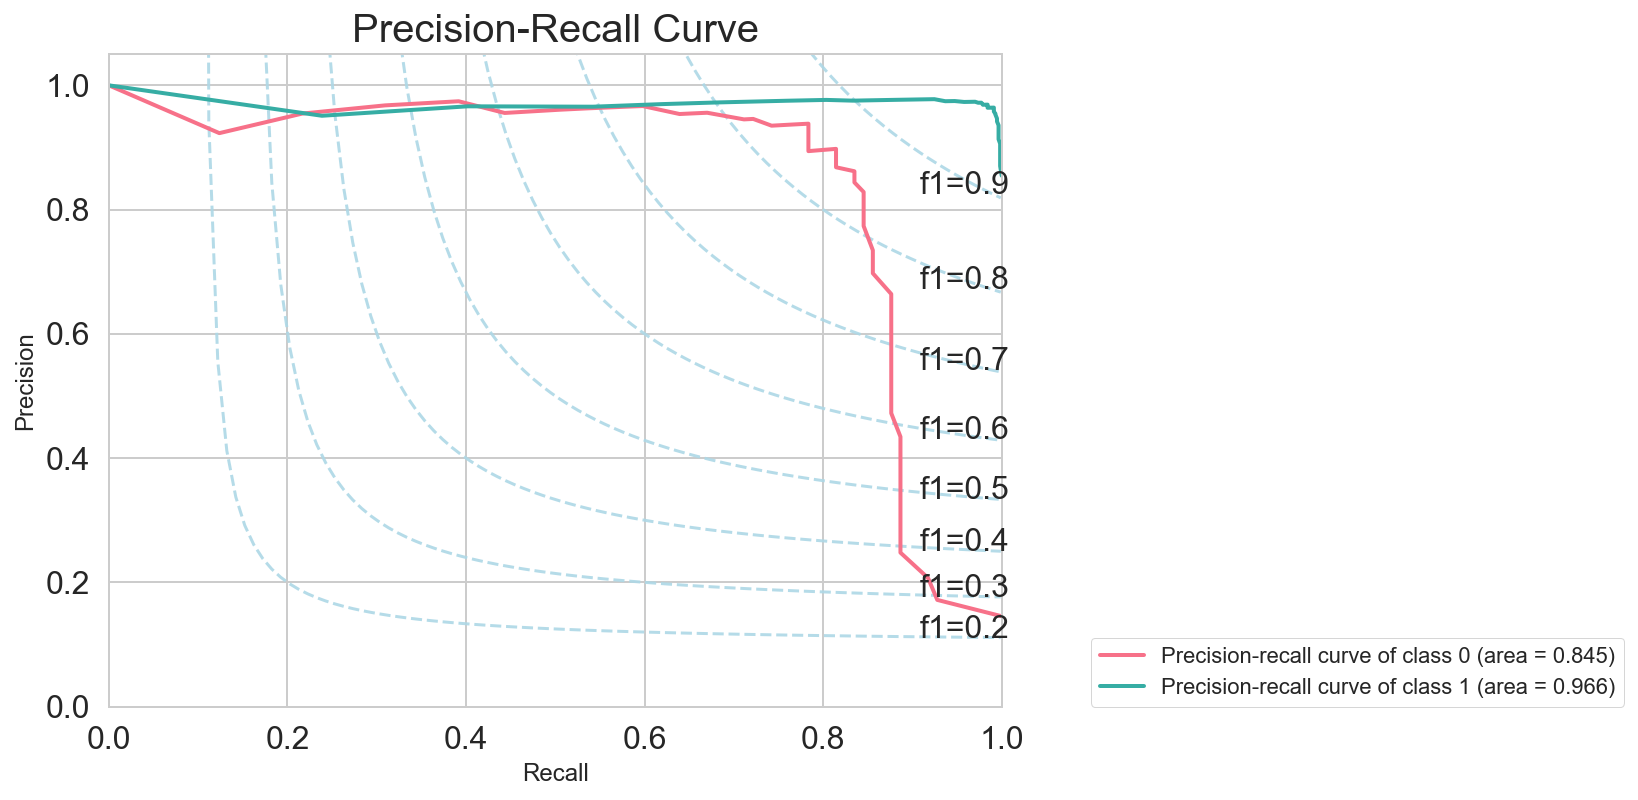

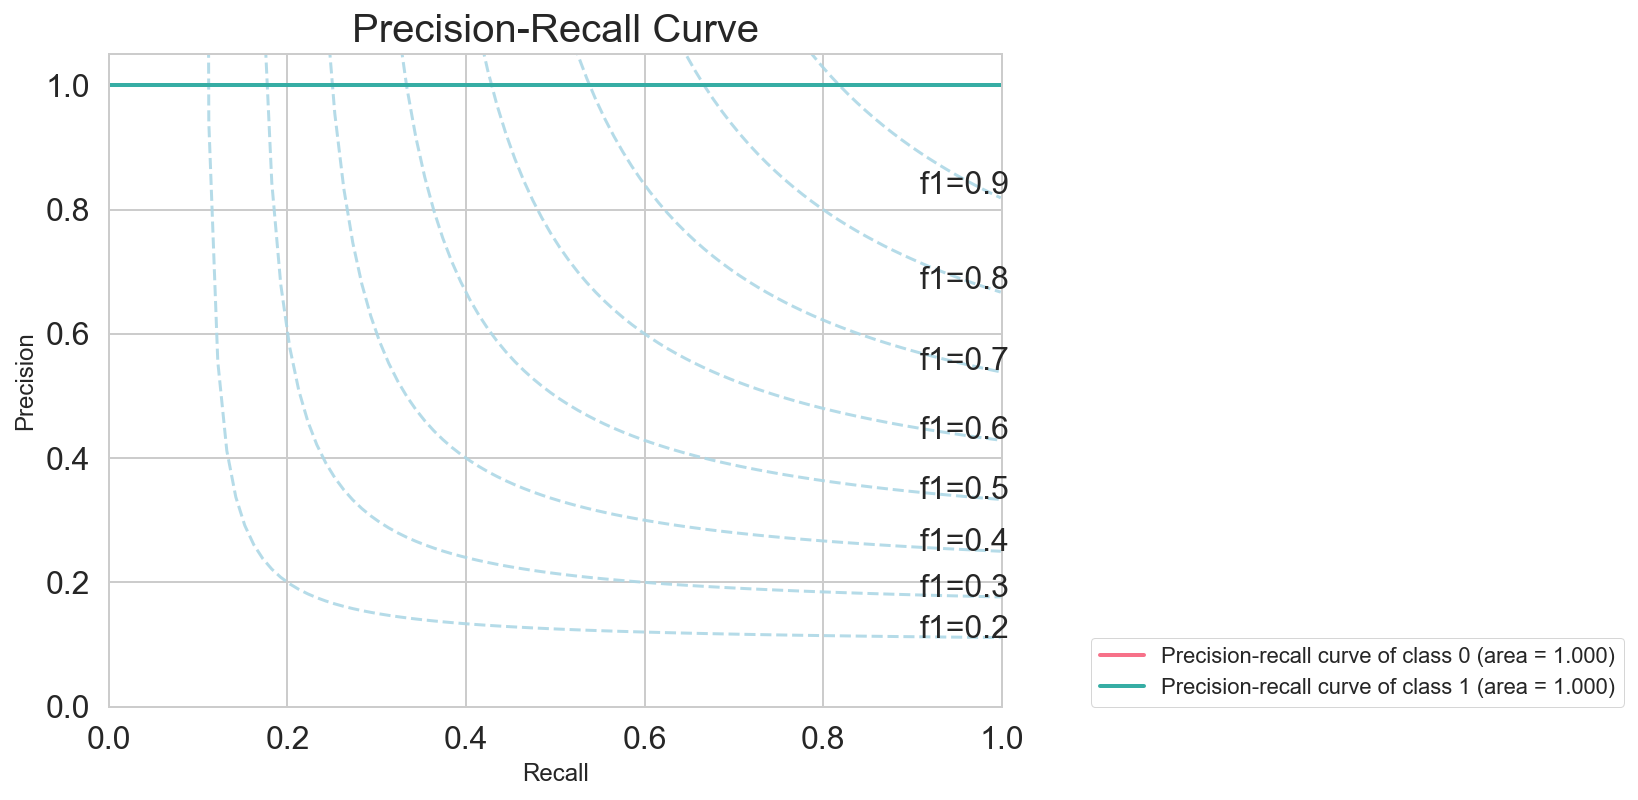

In [321]:
cmap = ListedColormap(sns.color_palette("husl", len(rf3_fitted.classes_)))

def plot_f1_lines(figsize=(8, 6), fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)

    # add lines of constant F1 scores

    for const in np.linspace(0.2, 0.9, 8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                    xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y2_test, rf3_fitted.predict_proba(X2_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y2_train, rf3_fitted.predict_proba(X2_train),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

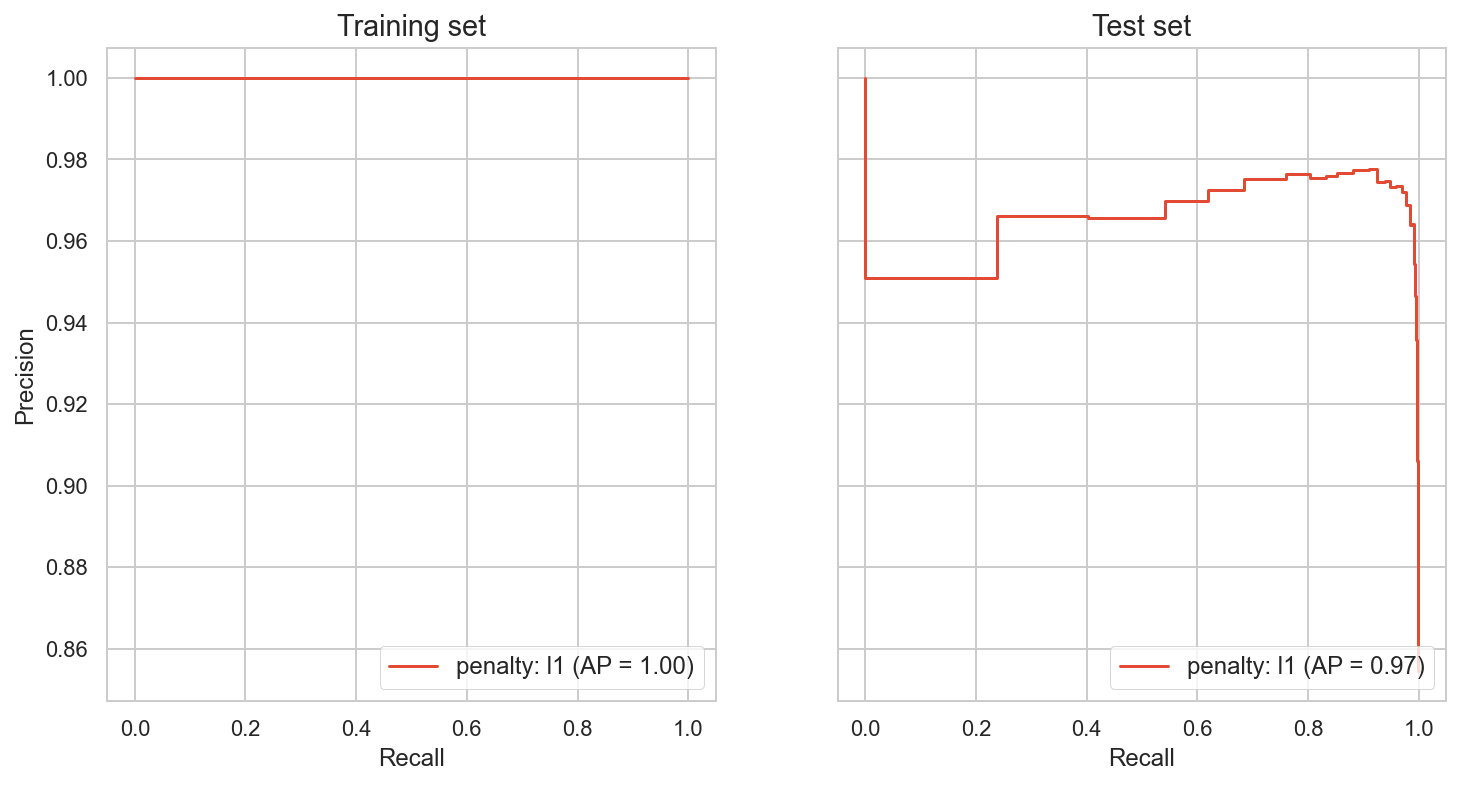

In [322]:
fig_pr, ax_pr = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plot_precision_recall_curve(rf3_fitted, X2_train, y2_train, ax=ax_pr[0], name='penalty: l1')
plot_precision_recall_curve(rf3_fitted, X2_test, y2_test, ax=ax_pr[1], name='penalty: l1')
ax_pr[0].legend(loc='lower right', fontsize=12)
ax_pr[1].legend(loc='lower right', fontsize=12)
ax_pr[1].set_ylabel(None)
ax_pr[0].set_title('Training set')
ax_pr[1].set_title('Test set')
plt.show()

In [323]:
### Accuracy  and threshold

In [324]:
#Accuracy score on train set
accuracy_score(y2_train, predictions_train3)

1.0

In [325]:
#Accuracy score on test set
accuracy_score(y2_test, predictions_test3)

0.9565217391304348

In [326]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [327]:
#false negatives count as changing threshold for predicting label

false_negatives = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in rf3_fitted.predict_proba(X2_test)[:, 1]])
    fn = np.mean((y2_test == 1) & (labeled_1 == 0))
    false_negatives.append((thresh, fn))
    print('Threshold:', thresh, 'false negatives:', fn)
false_negatives = np.array(false_negatives)

Threshold: 0.01 false negatives: 0.0014992503748125937
Threshold: 0.02 false negatives: 0.0014992503748125937
Threshold: 0.03 false negatives: 0.0014992503748125937
Threshold: 0.04 false negatives: 0.0014992503748125937
Threshold: 0.05 false negatives: 0.0029985007496251873
Threshold: 0.06 false negatives: 0.0029985007496251873
Threshold: 0.07 false negatives: 0.0029985007496251873
Threshold: 0.08 false negatives: 0.0029985007496251873
Threshold: 0.09 false negatives: 0.0029985007496251873
Threshold: 0.1 false negatives: 0.0029985007496251873
Threshold: 0.11 false negatives: 0.004497751124437781
Threshold: 0.12 false negatives: 0.004497751124437781
Threshold: 0.13 false negatives: 0.004497751124437781
Threshold: 0.14 false negatives: 0.004497751124437781
Threshold: 0.15 false negatives: 0.004497751124437781
Threshold: 0.16 false negatives: 0.004497751124437781
Threshold: 0.17 false negatives: 0.005997001499250375
Threshold: 0.18 false negatives: 0.005997001499250375
Threshold: 0.19 fal

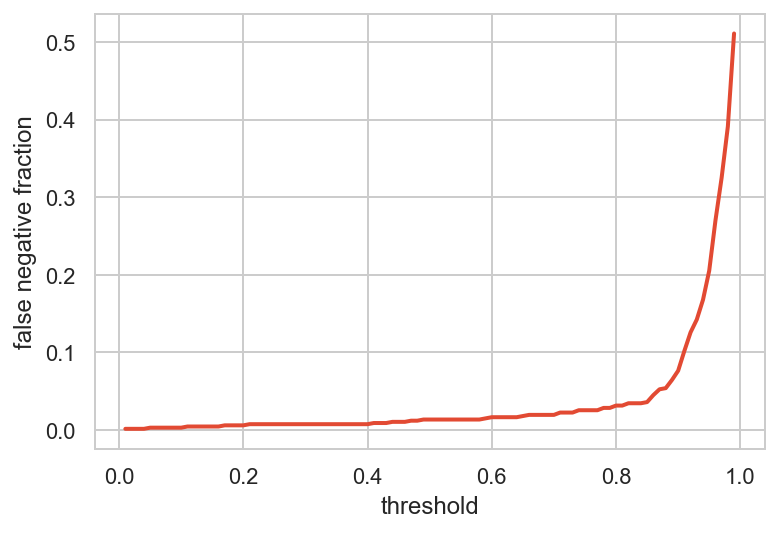

In [328]:
plt.plot(*false_negatives.T, lw=2)
plt.xlabel('threshold')
plt.ylabel('false negative fraction')
plt.show()

In [329]:
#Accuracy as changing your threshold for predicting label 1

accuracies = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in rf3_fitted.predict_proba(X2_test)[:, 1]])
    acc = np.mean(y2_test==labeled_1)
    accuracies.append((thresh, acc))
    print('Threshold:', thresh, 'Correct predictions:', acc)
accuracies = np.array(accuracies)

Threshold: 0.01 Correct predictions: 0.8710644677661169
Threshold: 0.02 Correct predictions: 0.8845577211394303
Threshold: 0.03 Correct predictions: 0.8980509745127436
Threshold: 0.04 Correct predictions: 0.9100449775112444
Threshold: 0.05 Correct predictions: 0.9160419790104948
Threshold: 0.06 Correct predictions: 0.9250374812593704
Threshold: 0.07 Correct predictions: 0.9295352323838081
Threshold: 0.08 Correct predictions: 0.9355322338830585
Threshold: 0.09 Correct predictions: 0.9385307346326837
Threshold: 0.1 Correct predictions: 0.9385307346326837
Threshold: 0.11 Correct predictions: 0.9430284857571214
Threshold: 0.12 Correct predictions: 0.9430284857571214
Threshold: 0.13 Correct predictions: 0.9445277361319341
Threshold: 0.14 Correct predictions: 0.9460269865067467
Threshold: 0.15 Correct predictions: 0.9460269865067467
Threshold: 0.16 Correct predictions: 0.9475262368815592
Threshold: 0.17 Correct predictions: 0.952023988005997
Threshold: 0.18 Correct predictions: 0.95352323838

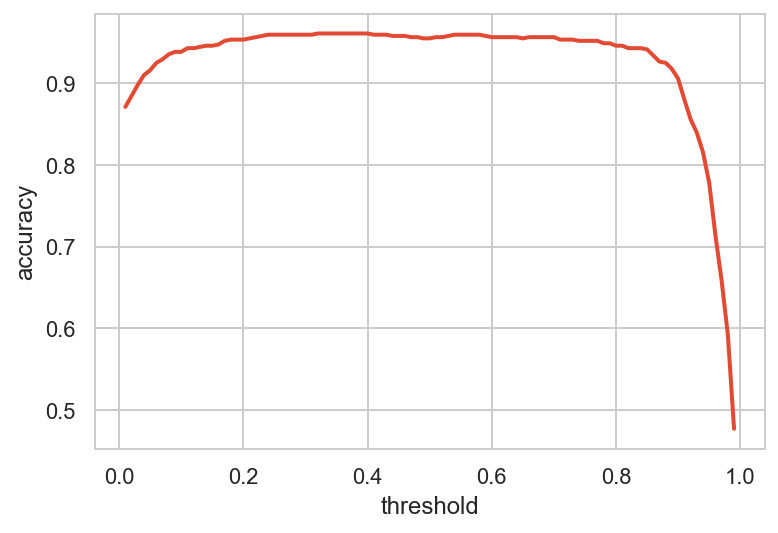

In [330]:
plt.plot(*accuracies.T, lw=2)
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.show()

In [331]:
# Get the predicted probabilities and explicitly name the columns:
Y_pp = pd.DataFrame(rf3_fitted.predict_proba(X2_test), 
             columns=['class_0_pp', 'class_1_pp'])
Y_pp.head()

class_0_pp  class_1_pp
0        0.02        0.98
1        0.03        0.97
2        0.07        0.93
3        0.02        0.98
4        0.07        0.93

In [332]:
Y_pp.shape

(667, 2)

In [333]:
y2_test

2421    1
1970    1
371     1
921     1
2631    1
       ..
758     1
2317    1
2695    1
1662    1
874     1
Name: Churn, Length: 667, dtype: int64

In [334]:
def predict_at_threshold(x, threshold=0.5):
    if x >= threshold:
        return 1
    else:
         return 0

In [335]:
# fraction of 1s predicted at threshold=0.5
rf3_fitted.predict(X2_test).mean()

0.8710644677661169

In [336]:
Y_pp['pred_class_thresh'] = Y_pp.class_1_pp.apply(predict_at_threshold, 
                                                threshold=0.4)
Y_pp.head(20)

class_0_pp  class_1_pp  pred_class_thresh
0         0.02        0.98                  1
1         0.03        0.97                  1
2         0.07        0.93                  1
3         0.02        0.98                  1
4         0.07        0.93                  1
5         0.00        1.00                  1
6         0.80        0.20                  0
7         0.03        0.97                  1
8         0.01        0.99                  1
9         0.03        0.97                  1
10        0.00        1.00                  1
11        0.03        0.97                  1
12        0.01        0.99                  1
13        0.01        0.99                  1
14        0.02        0.98                  1
15        0.01        0.99                  1
16        0.00        1.00                  1
17        0.00        1.00                  1
18        0.05        0.95                  1
19        0.01        0.99                  1

In [337]:
# fraction of 1s predicted at threshold=0.1
Y_pp.pred_class_thresh.mean()

0.8785607196401799

In [338]:
conmat_rf3 = confusion_matrix(
    y2_test, Y_pp.pred_class_thresh, labels=[1, 0])

confusionrf3 = pd.DataFrame(conmat, index=['actual retained', 'actual churn'],
                         columns=['predicted retained', 'predicted churn'])
confusionrf3

predicted retained  predicted churn
actual retained                 482                1
actual churn                   2849                1

In [339]:
#predictions_train3 = rf3_fitted.predict(X2_train)
#predictions_test3 = rf3_fitted.predict(X2_test)

In [340]:
def scores_at_thresholds(probs):
    predictions = [probs.apply(predict_at_threshold, threshold=i) 
                   for i in np.linspace(0, 1, 1000)]
    scores = np.array(
    [(threshold, 
      accuracy_score(y2_test, predictions[i]),
      precision_score(y2_test, predictions[i]),
      recall_score(y2_test, predictions[i]), 
      f1_score(y2_test, predictions[i])) 
     for i, threshold in enumerate(np.linspace(0, 1, 1000))])
    return scores

scores = scores_at_thresholds(Y_pp.class_1_pp)

scores

array([[0.        , 0.85457271, 0.85457271, 1.        , 0.92158448],
       [0.001001  , 0.87106447, 0.87003058, 0.99824561, 0.92973856],
       [0.002002  , 0.87106447, 0.87003058, 0.99824561, 0.92973856],
       ...,
       [0.997998  , 0.33883058, 0.95104895, 0.23859649, 0.38148668],
       [0.998999  , 0.33883058, 0.95104895, 0.23859649, 0.38148668],
       [1.        , 0.33883058, 0.95104895, 0.23859649, 0.38148668]])

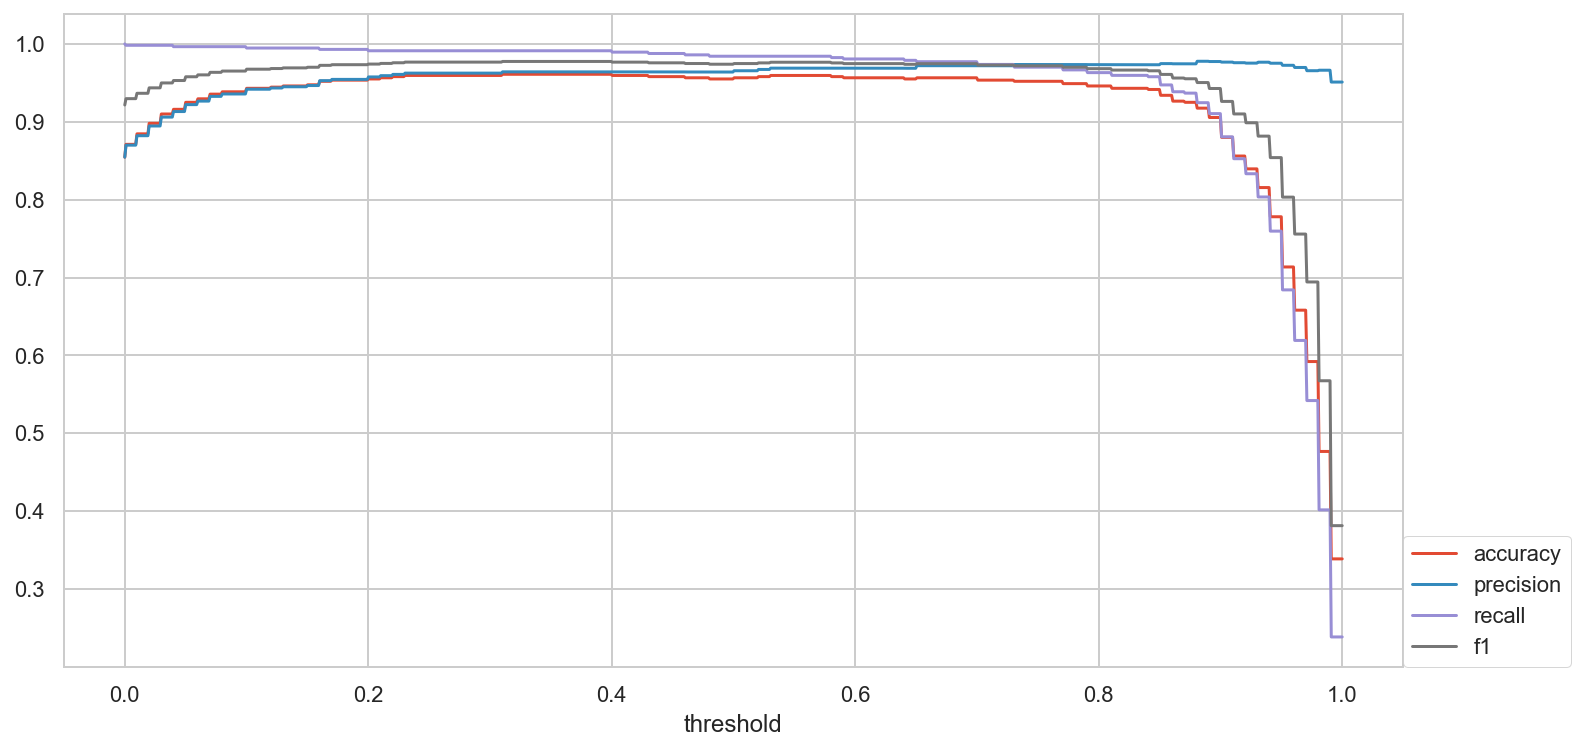

In [341]:
#Threshold plot
plt.figure(figsize=(12, 6))
plt.plot(scores[:, 0], scores[:, 1], label='accuracy')
plt.plot(scores[:, 0], scores[:, 2], label='precision')
plt.plot(scores[:, 0], scores[:, 3], label='recall')
plt.plot(scores[:, 0], scores[:, 4], label='f1')
plt.legend(loc=[1, 0])
plt.xlabel('threshold')
plt.show()

In [342]:
### Classification report on train test
print(classification_report(y2_train, predictions_train3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       386
           1       1.00      1.00      1.00      2280

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666



In [343]:
#Best model and parameters rf3 on test set
print(classification_report(y2_test, predictions_test3))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        97
           1       0.97      0.98      0.97       570

    accuracy                           0.96       667
   macro avg       0.93      0.89      0.91       667
weighted avg       0.96      0.96      0.96       667



In [344]:
print(classification_report(y2_test, Y_pp.pred_class_thresh))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        97
           1       0.96      0.99      0.98       570

    accuracy                           0.96       667
   macro avg       0.95      0.89      0.92       667
weighted avg       0.96      0.96      0.96       667



In [345]:
#Accuracy score on training set
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [346]:
#Accuracy score on train set
accuracy_score(y2_train, predictions_train3)

1.0

In [347]:
#Accuracy score on test set
accuracy_score(y2_test, predictions_test3)

0.9565217391304348

In [348]:
### Classification report for RF3 scoring
print(classification_report(y2_train, predictions_train3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       386
           1       1.00      1.00      1.00      2280

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666



In [349]:
### Classification report for RF3 scoring
print(classification_report(y2_test, predictions_test3))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        97
           1       0.97      0.98      0.97       570

    accuracy                           0.96       667
   macro avg       0.93      0.89      0.91       667
weighted avg       0.96      0.96      0.96       667



In [350]:
#Comparing all Random Forest models classification reports on test sets

In [380]:
#Original
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       570
           1       0.91      0.77      0.84        97

    accuracy                           0.96       667
   macro avg       0.94      0.88      0.91       667
weighted avg       0.96      0.96      0.95       667



In [381]:
#RF2
print(classification_report(y_test, predictions_test2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       570
           1       0.84      0.73      0.78        97

    accuracy                           0.94       667
   macro avg       0.90      0.85      0.87       667
weighted avg       0.94      0.94      0.94       667



In [382]:
#RF3 Swapped labels
print(classification_report(y2_test, predictions_test3))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        97
           1       0.97      0.98      0.97       570

    accuracy                           0.96       667
   macro avg       0.93      0.89      0.91       667
weighted avg       0.96      0.96      0.96       667



In [383]:
#RF3 Swapped labels # (first run)
print(classification_report(y2_test, predictions_test3))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        97
           1       0.97      0.98      0.97       570

    accuracy                           0.96       667
   macro avg       0.93      0.89      0.91       667
weighted avg       0.96      0.96      0.96       667



In [384]:
#RF4 Swapped labels
print(classification_report(y2_test, predictions_test4))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        97
           1       0.97      0.98      0.97       570

    accuracy                           0.96       667
   macro avg       0.93      0.89      0.91       667
weighted avg       0.96      0.96      0.96       667



#Conclusion: the best model is rf3 (Random Forest Classifier) having as parameter class_weight='balance', scoring='recall', since it presents not only the best scores but also the best classification report